# **# Bagian 1: Setup dan Import Library**


*   Tujuan: Mempersiapkan lingkungan analisis dengan mengimpor semua library yang diperlukan dan mengatur parameter visualisasi.
*   Deskripsi: Bagian ini memuat semua library Python yang diperlukan untuk analisis data (pandas, numpy), visualisasi (matplotlib, seaborn), clustering (scikit-learn), dan utilitas khusus untuk Google Colab. Juga mengatur parameter visualisasi seperti ukuran font dan gambar, serta menyiapkan random seed untuk memastikan reproducibility.





In [ ]:
# Bagian 1: Setup dan Import Library

# 1.1 Import Library Dasar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from google.colab import files
import io

# 1.2 Import Library untuk Clustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# 1.3 Import Library untuk Evaluasi dan Validasi
from sklearn.model_selection import KFold
from scipy.stats import entropy

# 1.4 Setting untuk Visualisasi
plt.style.use('default')  # Menggunakan style default di Colab
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# 1.5 Mengabaikan Warning
import warnings
warnings.filterwarnings('ignore')

# 1.6 Set Random Seed untuk Reproducibility
np.random.seed(42)

print("Setup selesai. Semua library berhasil diimpor.")

Setup selesai. Semua library berhasil diimpor.


# **# Bagian 2: Memuat dan Eksplorasi Data Awal**


In [ ]:
# Bagian 2: Memuat dan Eksplorasi Data Awal

# 2.1 Upload dan Muat Dataset
print("Silakan upload file Excel 'UW Track Record eIPO.xlsx'")
uploaded = files.upload()  # Buka dialog upload file

# Muat file yang telah diunggah
for filename in uploaded.keys():
    print(f'File yang diunggah: {filename}')
    file_content = uploaded[filename]

    # Membaca file Excel dari memory
    df = pd.read_excel(io.BytesIO(file_content))

# 2.2 Tampilkan Informasi Dataset
print("\nInformasi Dataset:")
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")
print("\nSampel Data (5 baris pertama):")
display(df.head())

# 2.3 Periksa Tipe Data
print("\nTipe Data per Kolom:")
display(df.dtypes)

# 2.4 Periksa Statistik Dasar
print("\nStatistik Dasar:")
display(df.describe())

# 2.5 Periksa Missing Values
missing_values = df.isna().sum()
print("\nJumlah Missing Values per Kolom:")
display(missing_values)

# 2.6 Periksa Nilai Unik untuk Kolom Kategori
print("\nNilai Unik untuk Kolom Kategori:")
categorial_cols = ['UW', 'Listing Board']
for col in categorial_cols:
    if col in df.columns:
        print(f"\n{col}:")
        print(df[col].value_counts().head(10))  # Tampilkan 10 nilai teratas

# 2.7 Periksa Jumlah IPO per Underwriter
if 'UW' in df.columns:
    uw_counts = df['UW'].value_counts()
    print("\nJumlah IPO per Underwriter (10 teratas):")
    display(uw_counts.head(10))

    print(f"Total Underwriter: {len(uw_counts)}")
    print(f"Min IPO per Underwriter: {uw_counts.min()}")
    print(f"Max IPO per Underwriter: {uw_counts.max()}")
    print(f"Mean IPO per Underwriter: {uw_counts.mean():.2f}")

Silakan upload file Excel 'UW Track Record eIPO.xlsx'


Saving UW Track Record - e-IPO.xlsx to UW Track Record - e-IPO.xlsx
File yang diunggah: UW Track Record - e-IPO.xlsx

Informasi Dataset:
Jumlah baris: 426
Jumlah kolom: 14

Sampel Data (5 baris pertama):


UW  Code                            Company Name  IPO Price  Return D1  \
0  AD  OBAT      PT Brigit Biofarmaka Teknologi Tbk      350.0       0.25   
1  AH  WGSH               PT Wira Global Solusi Tbk      140.0       0.10   
2  AH  SWID  PT Saraswanti Indoland Development Tbk      200.0       0.08   
3  AH  KETR             PT Ketrosden Triasmitra Tbk      300.0       0.07   
4  AH  SOUL               PT Mitra Tirta Buwana Tbk      110.0      -0.10   

   Return D2  Return D3  Return D4  Return D5  Return D6  Return D7  \
0      -0.07       0.08       0.15       0.18       0.00       0.09   
1       0.10       0.09       0.09       0.10      -0.10      -0.10   
2      -0.06      -0.07      -0.07      -0.07      -0.07      -0.07   
3      -0.07      -0.01       0.00      -0.04      -0.05      -0.07   
4      -0.09      -0.10      -0.10      -0.04      -0.10      -0.10   

  Listing Board Listing Date       Record  
0           NaN   2025-01-13       ARA 1x  
1    Akselerasi   2021-12-06       ARA 5x  
2  Pengembangan   2022-07-07  Close Hijau  
3         Utama   2022-11-10  Close Hijau  
4    Akselerasi   2023-01-06       ARB 4x


Tipe Data per Kolom:


UW                       object
Code                     object
Company Name             object
IPO Price               float64
Return D1               float64
Return D2               float64
Return D3               float64
Return D4               float64
Return D5               float64
Return D6               float64
Return D7               float64
Listing Board            object
Listing Date     datetime64[ns]
Record                   object
dtype: object


Statistik Dasar:


IPO Price   Return D1   Return D2   Return D3   Return D4  \
count   413.000000  413.000000  413.000000  413.000000  413.000000   
mean    395.384988    0.138644    0.040872    0.025714    0.013317   
min      70.000000   -0.350000   -0.330000   -0.250000   -0.290000   
25%     108.000000    0.000000   -0.060000   -0.060000   -0.060000   
50%     180.000000    0.110000   -0.010000    0.000000    0.000000   
75%     438.000000    0.250000    0.100000    0.050000    0.040000   
max    5550.000000    0.350000    0.350000    0.350000    0.340000   
std     554.948278    0.157907    0.153709    0.126692    0.101031   

        Return D5   Return D6   Return D7                   Listing Date  
count  413.000000  413.000000  413.000000                            414  
mean    -0.000460   -0.000508    0.002155  2023-01-13 16:24:20.869565184  
min     -0.250000   -0.350000   -0.350000            2021-03-08 00:00:00  
25%     -0.040000   -0.050000   -0.050000            2022-04-11 00:00:00  
50%     -0.010000   -0.010000   -0.010000            2023-01-11 00:00:00  
75%      0.030000    0.020000    0.030000            2023-08-08 00:00:00  
max      0.350000    0.320000    0.340000            2025-01-13 00:00:00  
std      0.083872    0.082211    0.076799                            NaN


Jumlah Missing Values per Kolom:


UW                0
Code              0
Company Name      0
IPO Price        13
Return D1        13
Return D2        13
Return D3        13
Return D4        13
Return D5        13
Return D6        13
Return D7        13
Listing Board    13
Listing Date     12
Record           13
dtype: int64


Nilai Unik untuk Kolom Kategori:

UW:
UW
AI    27
XA    25
HD    22
YP    20
AH    17
OD    15
CP    14
LG    14
IF    13
SF    13
Name: count, dtype: int64

Listing Board:
Listing Board
Pengembangan    193
Utama           175
Akselerasi       45
Name: count, dtype: int64

Jumlah IPO per Underwriter (10 teratas):


UW
AI    27
XA    25
HD    22
YP    20
AH    17
OD    15
CP    14
LG    14
IF    13
SF    13
Name: count, dtype: int64

Total Underwriter: 63
Min IPO per Underwriter: 1
Max IPO per Underwriter: 27
Mean IPO per Underwriter: 6.76


# **# Bagian 3: Preprocessing Data**

In [ ]:
# Bagian 3: Preprocessing Data

# 3.1 Definisikan Kolom Numerik dan Kategorikal
numeric_cols = ['IPO Price', 'Return D1', 'Return D2', 'Return D3', 'Return D4',
                'Return D5', 'Return D6', 'Return D7']
return_cols = ['Return D1', 'Return D2', 'Return D3', 'Return D4', 'Return D5', 'Return D6', 'Return D7']
categorical_cols = ['UW', 'Code', 'Company Name', 'Listing Board', 'Record']
date_cols = ['Listing Date']

# 3.2 Konversi Tipe Data
# 3.2.1 Konversi kolom numerik (ganti koma dengan titik jika perlu)
print("Konversi tipe data...")
for col in numeric_cols:
    if col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].astype(str).str.replace(',', '.').astype(float)
        else:
            df[col] = df[col].astype(float)

# 3.2.2 Konversi kolom tanggal
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# 3.3 Penanganan Missing Values
print("\nPenanganan missing values...")

# 3.3.1 Tampilkan jumlah missing values per kolom
missing_count = df.isna().sum()
print("Missing values per kolom:")
display(missing_count[missing_count > 0])

# 3.3.2 Hapus baris dengan missing values pada kolom penting
df_clean = df.dropna(subset=['UW', 'IPO Price', 'Return D1'])

# 3.4 Identifikasi dan Filter Underwriter dengan Minimal 3 IPO
print("\nFilter underwriter dengan minimal 3 IPO...")
uw_counts = df_clean['UW'].value_counts()
valid_uws = uw_counts[uw_counts >= 3].index

# Filter data hanya untuk underwriter dengan minimal 3 IPO
df_clean_filtered = df_clean[df_clean['UW'].isin(valid_uws)]

# 3.5 Hasil Preprocessing
print(f"\nHasil preprocessing:")
print(f"- Dataset awal: {df.shape[0]} baris, {df.shape[1]} kolom")
print(f"- Setelah penanganan missing values: {df_clean.shape[0]} baris")
print(f"- Setelah filter underwriter dengan ≥3 IPO: {df_clean_filtered.shape[0]} baris")
print(f"- Jumlah underwriter terfilter: {len(valid_uws)} dari {df_clean['UW'].nunique()} total")

# Simpan dataframe bersih untuk analisis selanjutnya
df_final = df_clean_filtered.copy()
print("\nDataset siap untuk analisis lebih lanjut.")

Konversi tipe data...

Penanganan missing values...
Missing values per kolom:


IPO Price        13
Return D1        13
Return D2        13
Return D3        13
Return D4        13
Return D5        13
Return D6        13
Return D7        13
Listing Board    13
Listing Date     12
Record           13
dtype: int64


Filter underwriter dengan minimal 3 IPO...

Hasil preprocessing:
- Dataset awal: 426 baris, 14 kolom
- Setelah penanganan missing values: 413 baris
- Setelah filter underwriter dengan ≥3 IPO: 388 baris
- Jumlah underwriter terfilter: 45 dari 63 total

Dataset siap untuk analisis lebih lanjut.


# **# Bagian 4: Exploratory Data Analysis (EDA)**

Statistik deskriptif untuk fitur numerik:


count        mean         std    min       25%      50%       75%  \
IPO Price  388.0  378.721649  556.558291  70.00  108.0000  172.500  388.5000   
Return D1  388.0    0.139562    0.159898  -0.35    0.0000    0.110    0.2875   
Return D2  388.0    0.041134    0.154880  -0.33   -0.0600   -0.005    0.1125   
Return D3  388.0    0.023737    0.126608  -0.25   -0.0600    0.000    0.0500   
Return D4  388.0    0.011186    0.101167  -0.29   -0.0600    0.000    0.0400   
Return D5  388.0   -0.000180    0.082789  -0.25   -0.0500   -0.010    0.0300   
Return D6  388.0    0.000412    0.082100  -0.35   -0.0425   -0.010    0.0200   
Return D7  388.0    0.001804    0.077241  -0.35   -0.0500   -0.010    0.0300   

               max  
IPO Price  5550.00  
Return D1     0.35  
Return D2     0.35  
Return D3     0.35  
Return D4     0.34  
Return D5     0.35  
Return D6     0.32  
Return D7     0.34

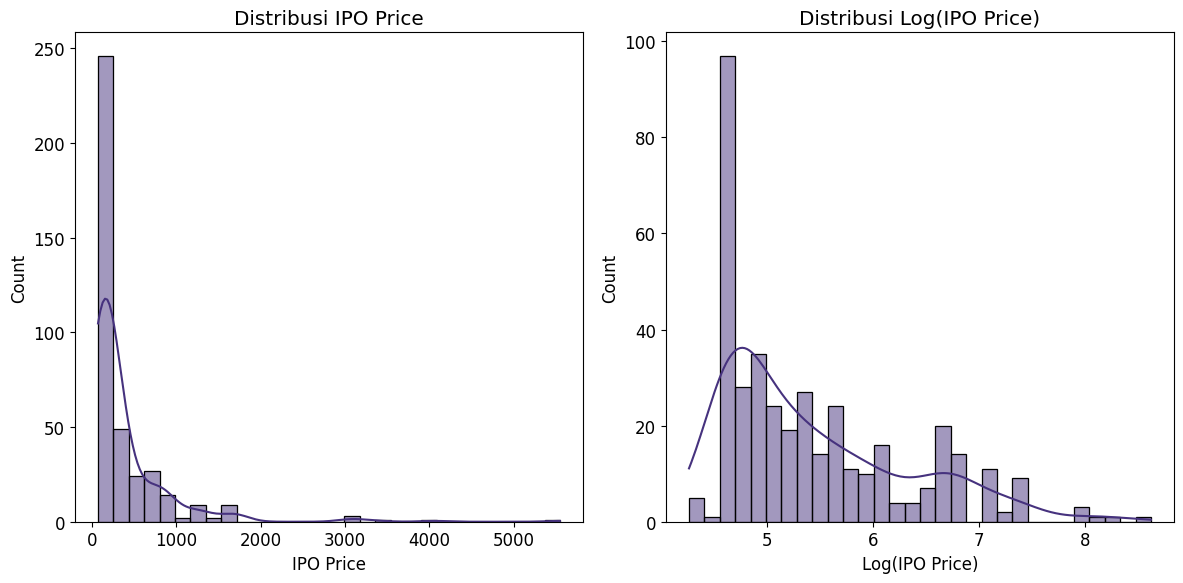

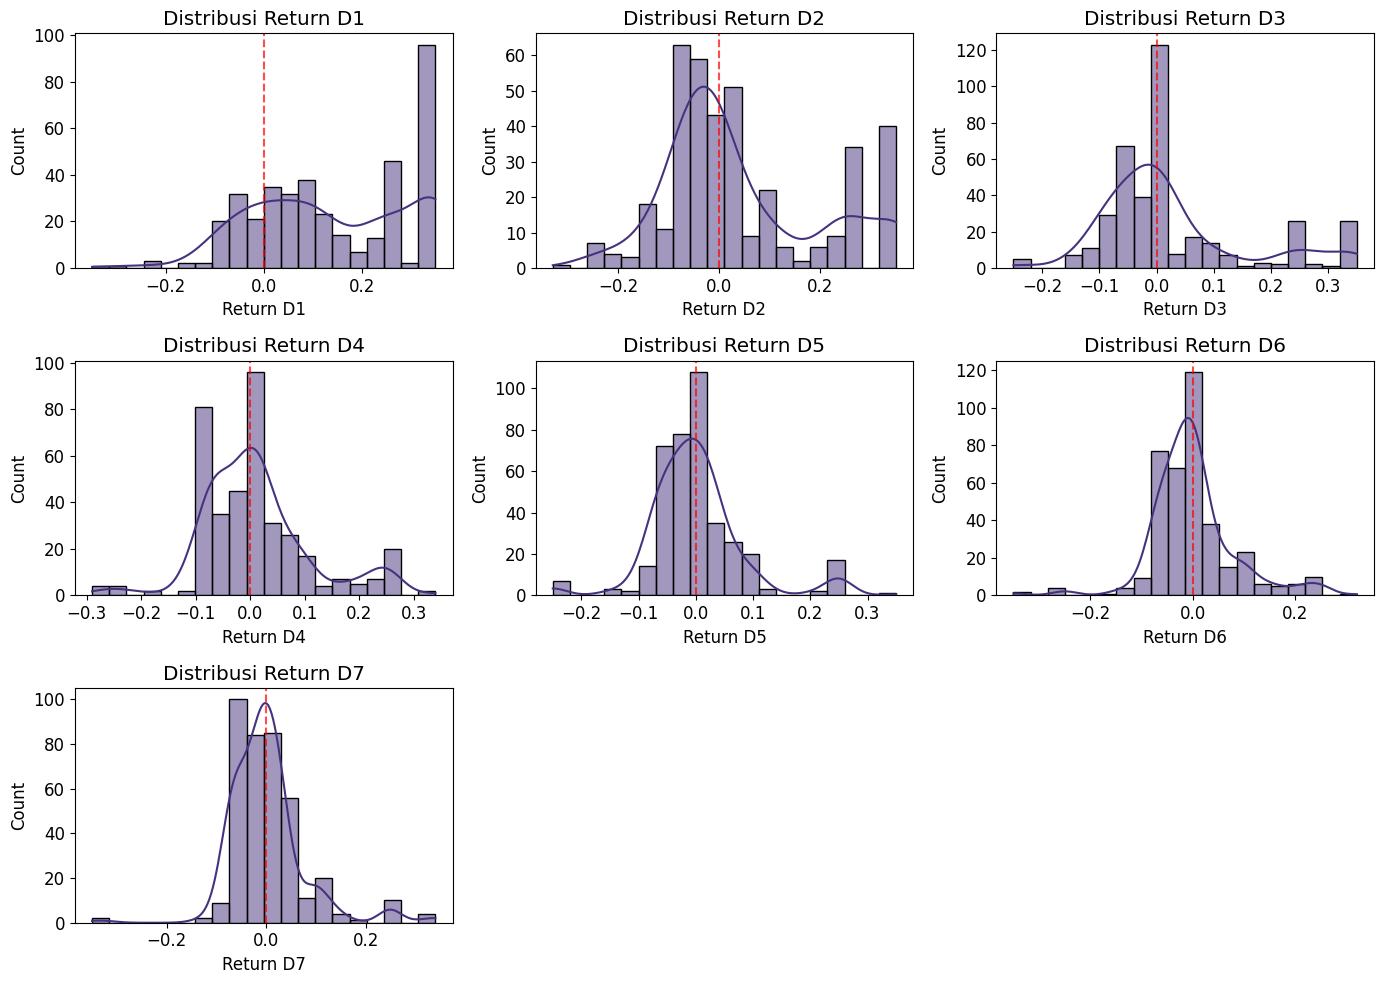

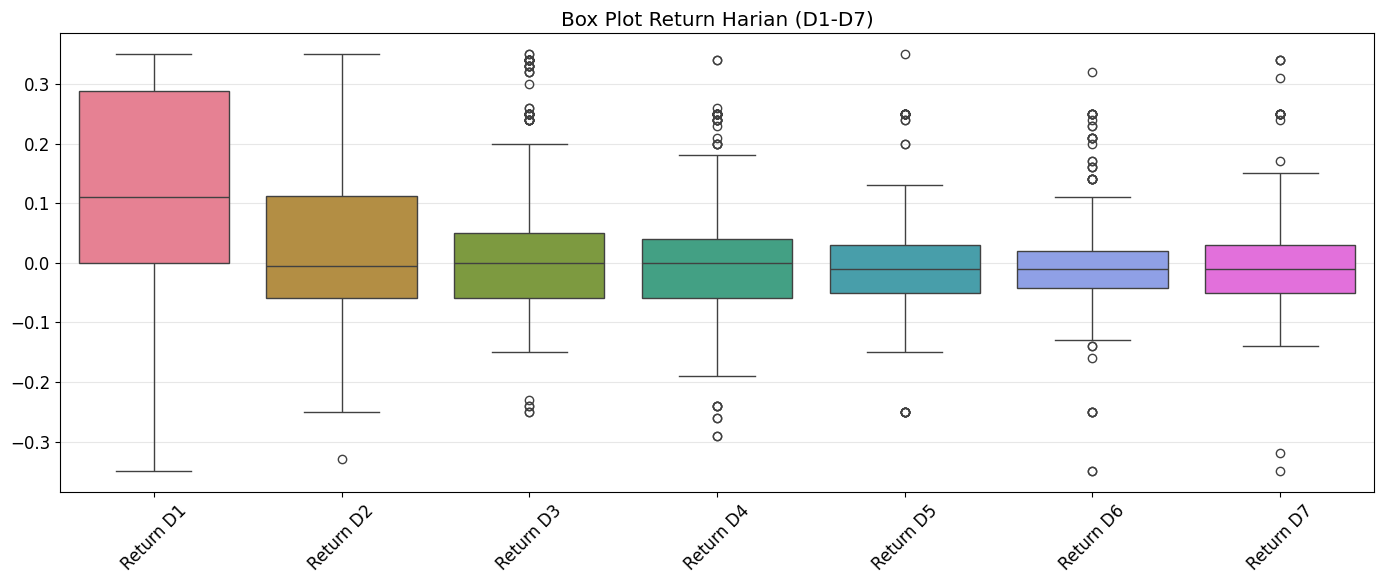

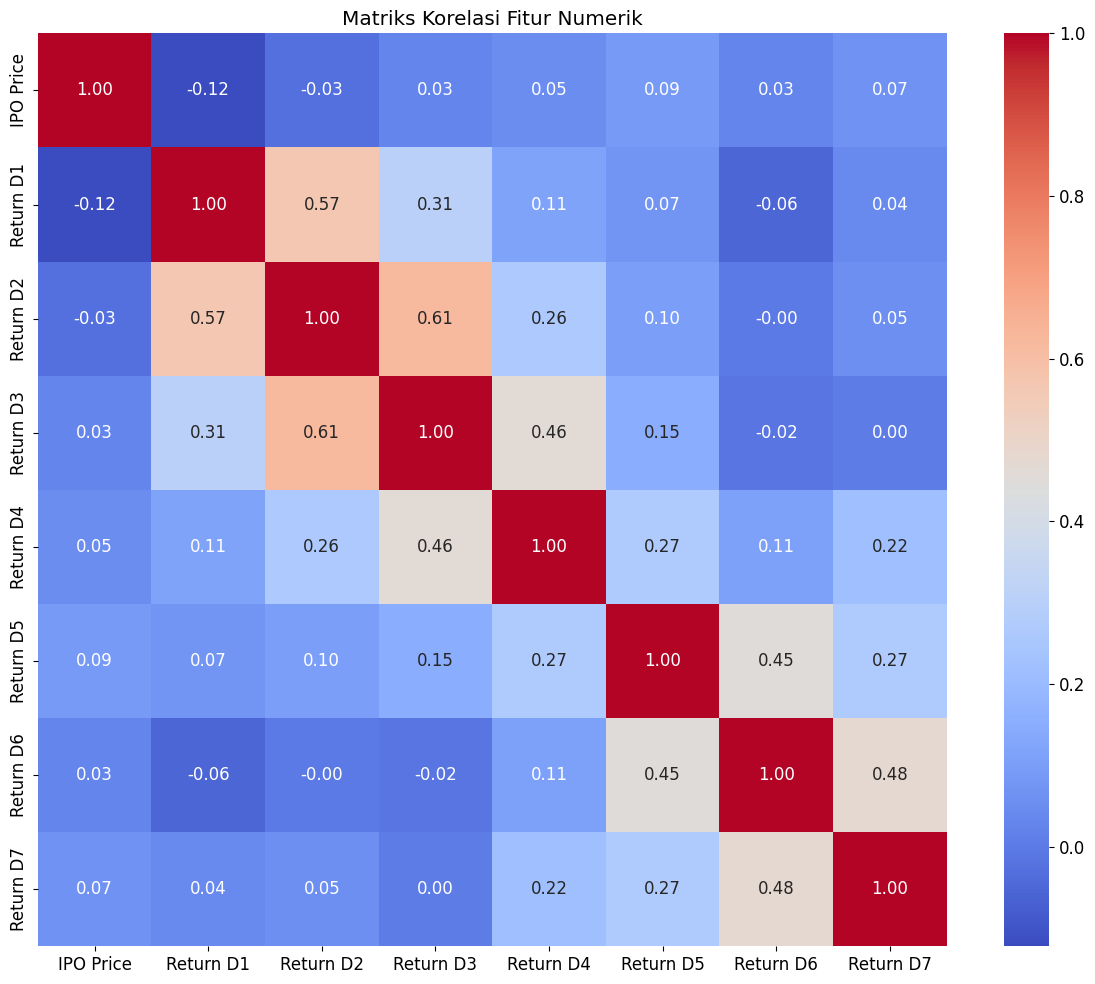

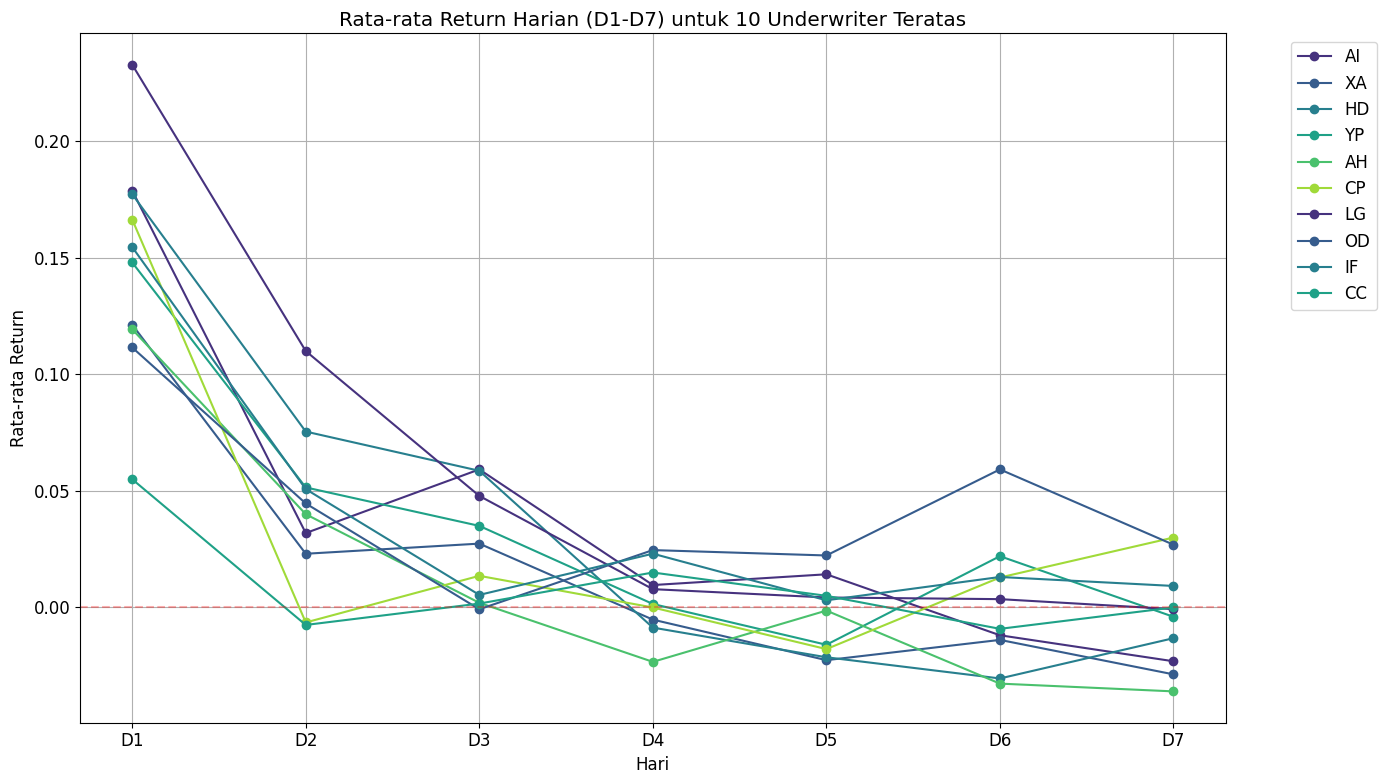

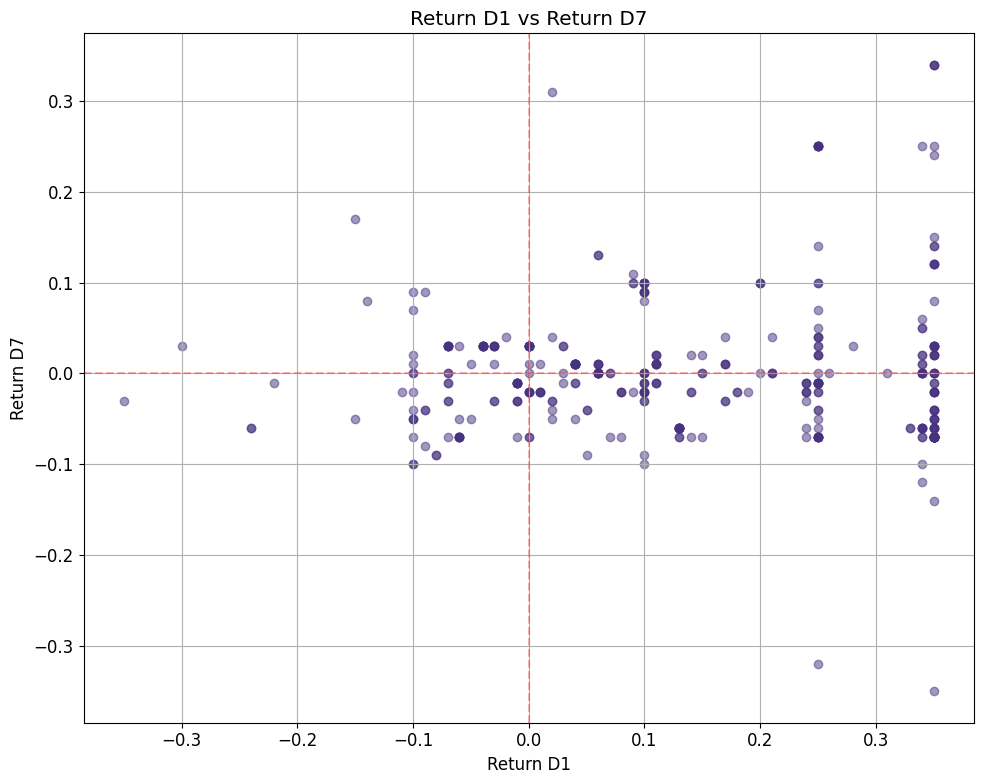

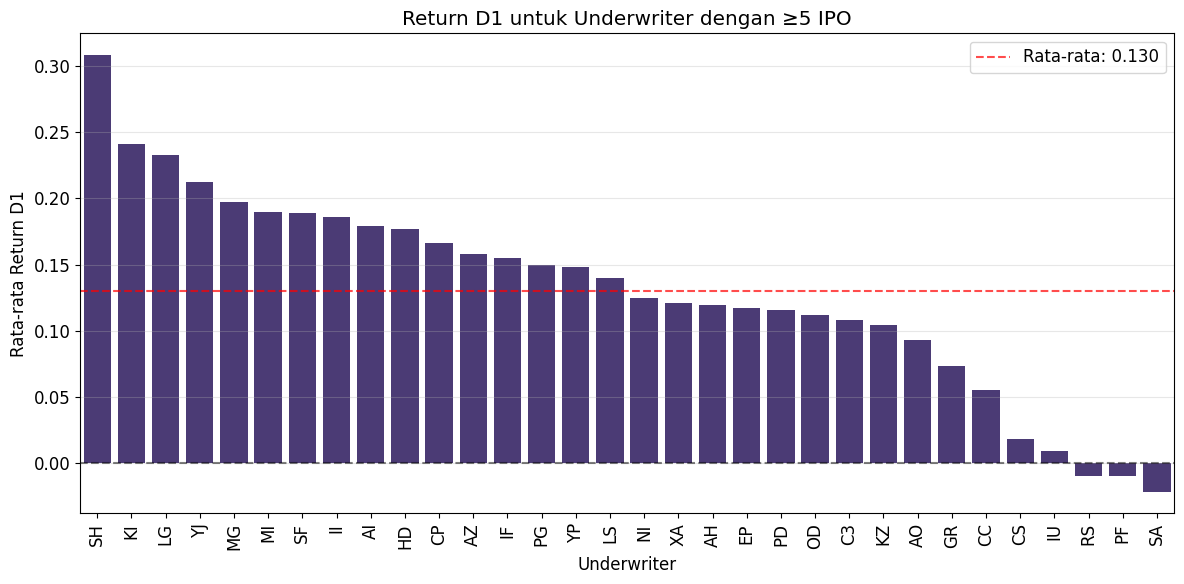

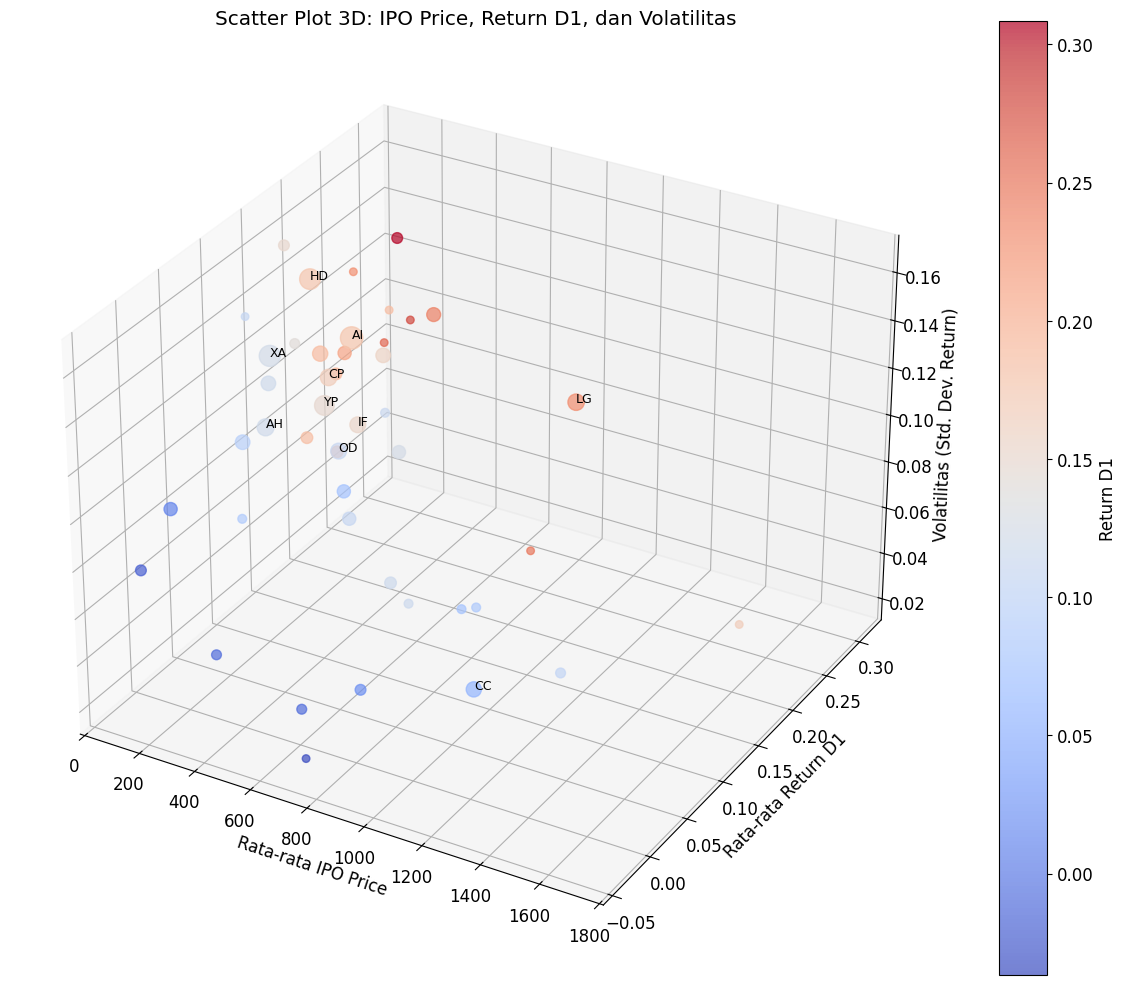

In [ ]:
# Bagian 4: Exploratory Data Analysis (EDA)

# 4.1 Statistik Deskriptif untuk Fitur Numerik
print("Statistik deskriptif untuk fitur numerik:")
display(df_final[numeric_cols].describe().T)

# 4.2 Visualisasi Distribusi IPO Price
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_final['IPO Price'], kde=True, bins=30)
plt.title('Distribusi IPO Price')
plt.xlabel('IPO Price')

plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df_final['IPO Price']), kde=True, bins=30)
plt.title('Distribusi Log(IPO Price)')
plt.xlabel('Log(IPO Price)')

plt.tight_layout()
plt.show()

# 4.3 Visualisasi Distribusi Return Harian
plt.figure(figsize=(14, 10))
for i, col in enumerate(return_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(df_final[col], kde=True, bins=20)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.axvline(x=0, color='red', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# 4.4 Box Plot untuk Mendeteksi Outlier pada Return
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_final[return_cols])
plt.title('Box Plot Return Harian (D1-D7)')
plt.xticks(rotation=45)
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 4.5 Analisis Korelasi
plt.figure(figsize=(12, 10))
corr_matrix = df_final[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi Fitur Numerik')
plt.tight_layout()
plt.show()

# 4.6 Analisis Pola Return per Underwriter
# 4.6.1 Hitung rata-rata return untuk setiap underwriter
uw_groups = df_final.groupby('UW')
uw_avg_returns = uw_groups[return_cols].mean()

# 4.6.2 Top 10 underwriter berdasarkan jumlah IPO
top_uws = uw_counts.sort_values(ascending=False).head(10).index

plt.figure(figsize=(14, 8))
for uw in top_uws:
    plt.plot(range(1, 8), uw_avg_returns.loc[uw], marker='o', label=uw)

plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
plt.title('Rata-rata Return Harian (D1-D7) untuk 10 Underwriter Teratas')
plt.xlabel('Hari')
plt.ylabel('Rata-rata Return')
plt.xticks(range(1, 8), [f'D{i}' for i in range(1, 8)])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# 4.7 Analisis Return D1 vs Return D7
plt.figure(figsize=(10, 8))
plt.scatter(df_final['Return D1'], df_final['Return D7'], alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='r', linestyle='--', alpha=0.3)
plt.title('Return D1 vs Return D7')
plt.xlabel('Return D1')
plt.ylabel('Return D7')
plt.grid(True)
plt.tight_layout()
plt.show()

# 4.8 Visualisasi Perbandingan Return D1 dari Underwriter dengan >=5 IPO
large_uws = uw_counts[uw_counts >= 5].index
large_uw_returns = uw_avg_returns.loc[large_uws, 'Return D1'].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=large_uw_returns.index, y=large_uw_returns.values)
plt.title('Return D1 untuk Underwriter dengan ≥5 IPO')
plt.xlabel('Underwriter')
plt.ylabel('Rata-rata Return D1')
plt.axhline(y=large_uw_returns.mean(), color='r', linestyle='--', alpha=0.7,
            label=f'Rata-rata: {large_uw_returns.mean():.3f}')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.xticks(rotation=90)
plt.legend()
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 4.9 Scatter Plot 3D untuk IPO Price, Return D1, dan Volatilitas
from mpl_toolkits.mplot3d import Axes3D

# Hitung volatilitas untuk setiap underwriter
uw_volatility = df_final.groupby('UW')[return_cols].std().mean(axis=1)
uw_ipo_price = df_final.groupby('UW')['IPO Price'].mean()
uw_return_d1 = df_final.groupby('UW')['Return D1'].mean()

# Gabungkan data untuk plotting
plot_data = pd.DataFrame({
    'IPO_Price': uw_ipo_price,
    'Return_D1': uw_return_d1,
    'Volatility': uw_volatility,
    'IPO_Count': uw_counts[uw_volatility.index]
})

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    plot_data['IPO_Price'],
    plot_data['Return_D1'],
    plot_data['Volatility'],
    s=plot_data['IPO_Count']*10,  # Ukuran point berdasarkan jumlah IPO
    c=plot_data['Return_D1'],     # Warna berdasarkan return
    cmap='coolwarm',
    alpha=0.7
)

# Tambahkan colorbar
fig.colorbar(scatter, ax=ax, label='Return D1')

# Tambahkan label untuk 10 underwriter teratas
for uw in top_uws:
    ax.text(
        plot_data.loc[uw, 'IPO_Price'],
        plot_data.loc[uw, 'Return_D1'],
        plot_data.loc[uw, 'Volatility'],
        uw,
        fontsize=9
    )

ax.set_xlabel('Rata-rata IPO Price')
ax.set_ylabel('Rata-rata Return D1')
ax.set_zlabel('Volatilitas (Std. Dev. Return)')
plt.title('Scatter Plot 3D: IPO Price, Return D1, dan Volatilitas')
plt.tight_layout()
plt.show()

# **# Bagian 5: Feature Engineering untuk Clustering**

Mengekstrak fitur untuk clustering...

Statistik fitur untuk clustering:


avg_ipo_price  avg_return_d1  avg_return_d7  volatility  \
count      45.000000      45.000000      45.000000   45.000000   
mean      436.200937       0.134914       0.009136    0.108434   
std       360.174466       0.081106       0.036555    0.041622   
min       100.000000      -0.036667      -0.043333    0.031066   
25%       156.666667       0.092727      -0.015556    0.074028   
50%       293.076923       0.124444       0.000000    0.112035   
75%       613.222222       0.186667       0.020000    0.136130   
max      1696.666667       0.308333       0.143333    0.203850   

       positive_return_ratio  avg_7day_return  consistent_days_positive  \
count              45.000000        45.000000                 45.000000   
mean                0.474152         0.033287                  4.133333   
std                 0.121442         0.042676                  1.713582   
min                 0.285714        -0.023571                  0.000000   
25%                 0.392857         0.006071                  3.000000   
50%                 0.476190         0.020816                  4.000000   
75%                 0.523810         0.046825                  5.000000   
max                 0.952381         0.234286                  7.000000   

       risk_adjusted_return  direction_changes  ipo_count  
count             45.000000               45.0  45.000000  
mean               1.165779                0.0   8.622222  
std                0.757503                0.0   5.733827  
min               -1.180293                0.0   3.000000  
25%                0.872236                0.0   4.000000  
50%                1.204203                0.0   7.000000  
75%                1.642245                0.0  11.000000  
max                3.672496                0.0  26.000000

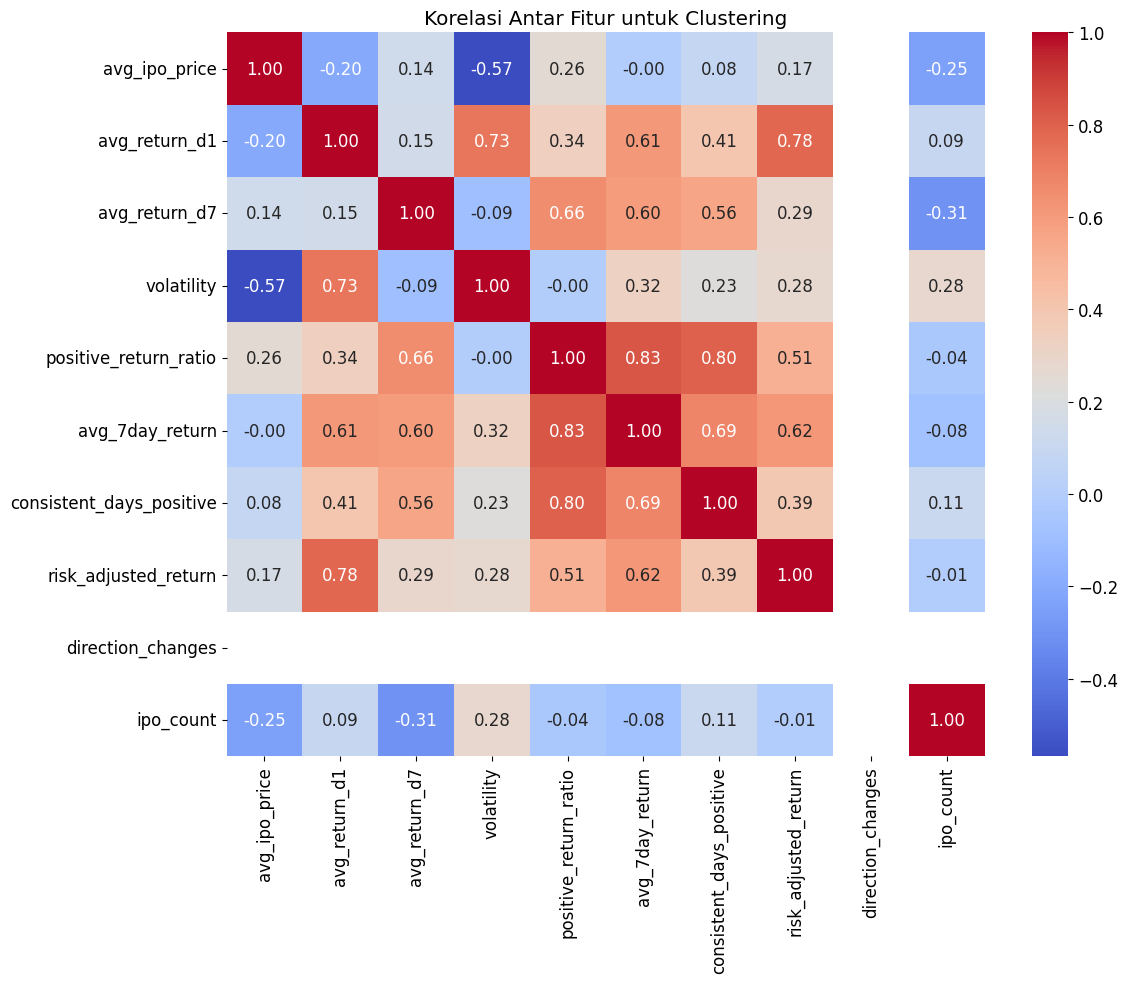


Fitur yang dipilih untuk clustering (6 fitur):
- avg_return_d1
- avg_return_d7
- volatility
- positive_return_ratio
- avg_7day_return
- risk_adjusted_return

Data setelah standardisasi (5 baris pertama):


avg_return_d1  avg_return_d7  volatility  positive_return_ratio  \
UW                                                                    
AI       0.547788      -0.891167    0.750169               0.352515   
XA      -0.169693      -1.046609    0.745336              -0.586456   
HD       0.528169      -0.617418    1.433841              -0.379564   
YP       0.163171      -0.363403    0.301754               0.036806   
AH      -0.194269      -1.248684    0.211248              -0.855416   

    avg_7day_return  risk_adjusted_return  
UW                                         
AI         0.087463              0.157584  
XA        -0.445860             -0.392199  
HD         0.015970             -0.142975  
YP         0.016893              0.078568  
AH        -0.558604             -0.196185


Variance explained oleh komponen PCA:
PC1: 55.56%
PC2: 26.48%
Total: 82.04%


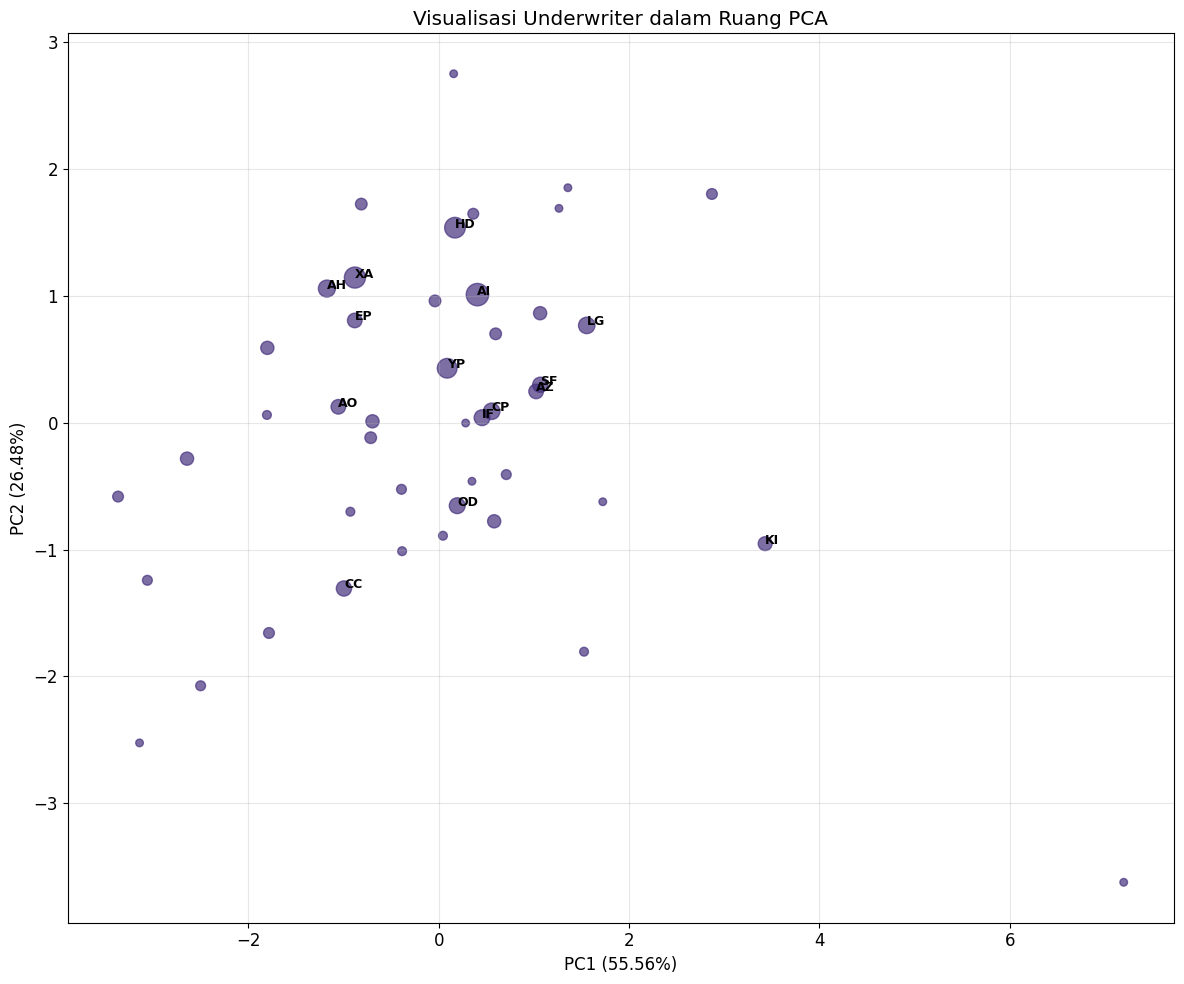

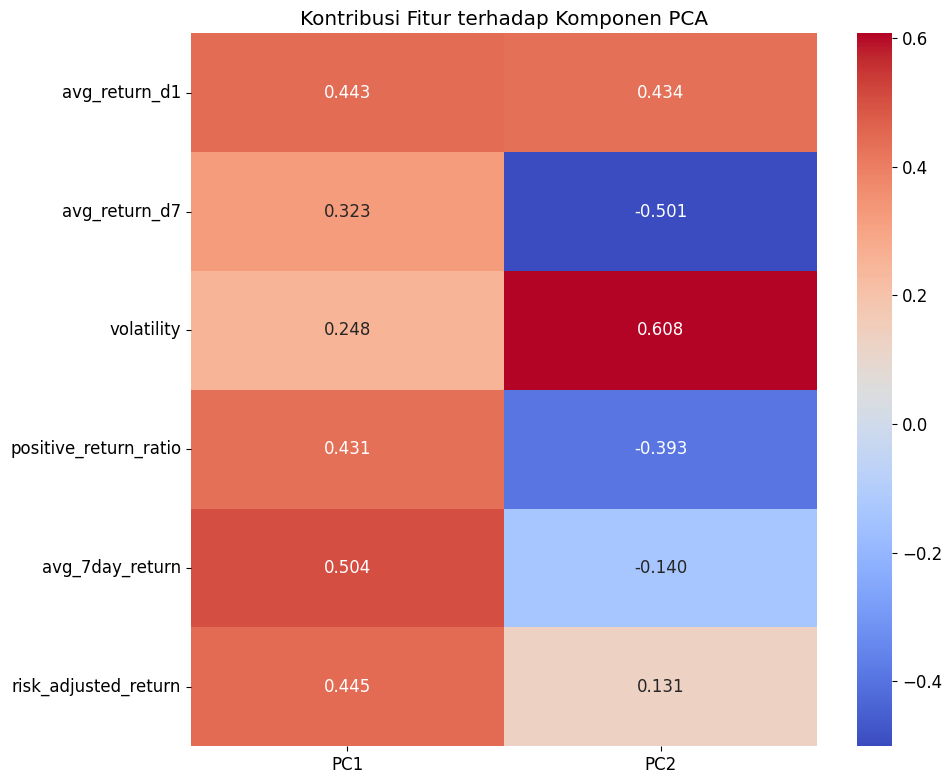

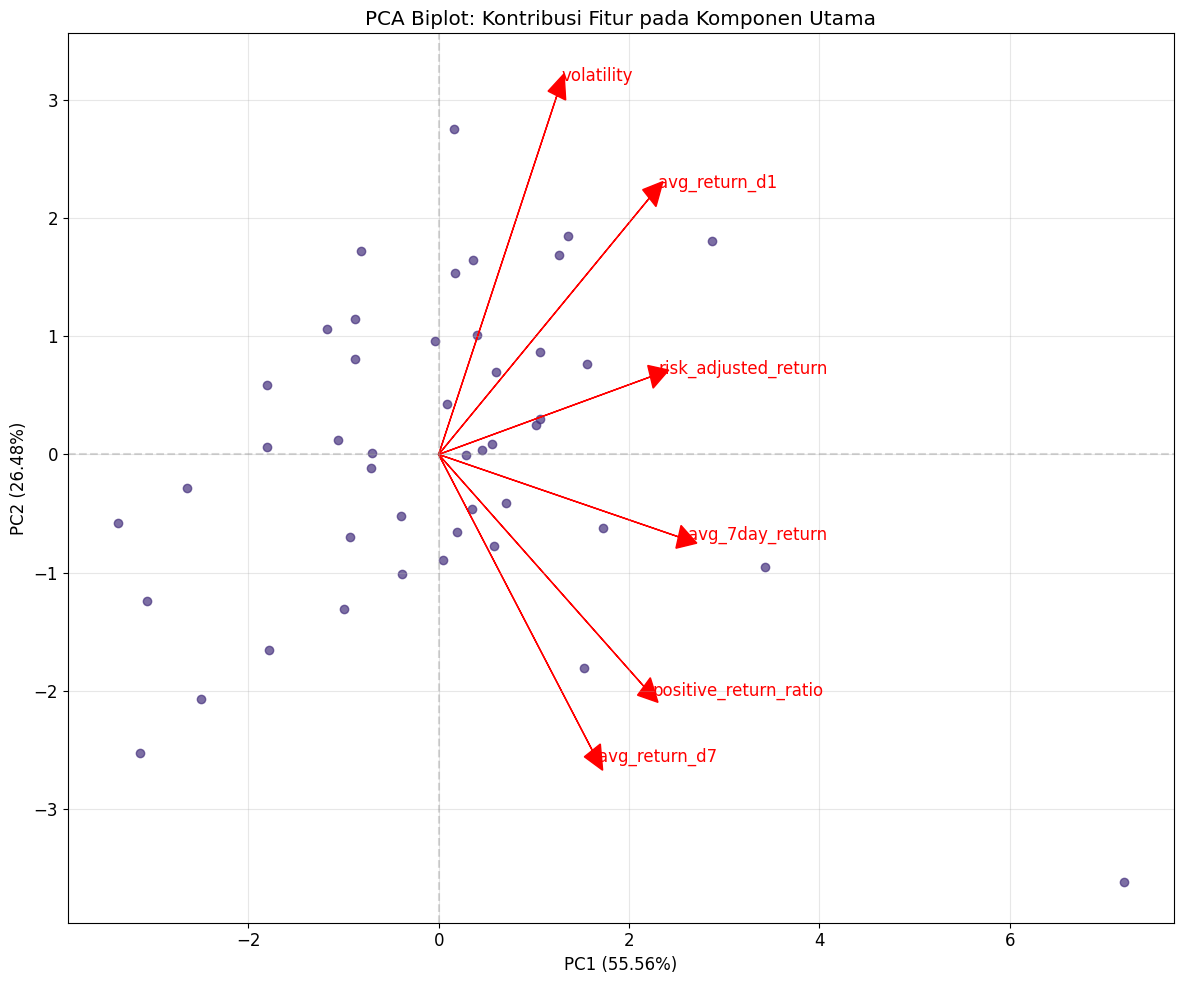

In [ ]:
# Bagian 5: Feature Engineering untuk Clustering

# 5.1 Ekstraksi dan Agregasi Fitur per Underwriter
print("Mengekstrak fitur untuk clustering...")
uw_features = []

# Untuk setiap underwriter, hitung berbagai metrik agregat
for uw in valid_uws:
    uw_data = df_final[df_final['UW'] == uw]

    # Hitung rata-rata IPO Price
    avg_ipo_price = uw_data['IPO Price'].mean()

    # Hitung metrik return
    avg_return_d1 = uw_data['Return D1'].mean()
    avg_return_d7 = uw_data['Return D7'].mean()

    # Hitung volatilitas (standar deviasi return)
    all_returns = uw_data[return_cols].values.flatten()
    all_returns = all_returns[~np.isnan(all_returns)]  # Hapus nilai NaN jika ada
    volatility = np.std(all_returns)

    # Hitung rasio return positif
    positive_returns = np.sum(all_returns > 0) / len(all_returns)

    # Hitung rata-rata return 7 hari
    avg_7day_return = uw_data[return_cols].mean().mean()

    # Hitung konsistensi return (berapa hari dengan return positif)
    consistent_days_positive = (uw_data[return_cols].mean() > 0).sum()

    # Hitung risk-adjusted return (return D1 / volatilitas)
    risk_adjusted_return = avg_return_d1 / volatility if volatility > 0 else 0

    # Hitung variabilitas return (perubahan arah return)
    return_signs = np.sign(uw_data[return_cols].mean())
    direction_changes = ((return_signs[:-1] * return_signs[1:]) < 0).sum()

    # Tambahkan fitur ke list
    uw_features.append({
        'UW': uw,
        'avg_ipo_price': avg_ipo_price,
        'avg_return_d1': avg_return_d1,
        'avg_return_d7': avg_return_d7,
        'volatility': volatility,
        'positive_return_ratio': positive_returns,
        'avg_7day_return': avg_7day_return,
        'consistent_days_positive': consistent_days_positive,
        'risk_adjusted_return': risk_adjusted_return,
        'direction_changes': direction_changes,
        'ipo_count': len(uw_data)
    })

# Buat DataFrame fitur
df_features = pd.DataFrame(uw_features)
df_features.set_index('UW', inplace=True)

# 5.2 Tampilkan Statistik Fitur
print("\nStatistik fitur untuk clustering:")
display(df_features.describe())

# 5.3 Korelasi Antar Fitur
plt.figure(figsize=(12, 10))
features_corr = df_features.corr()
sns.heatmap(features_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Fitur untuk Clustering')
plt.tight_layout()
plt.show()

# 5.4 Pilih Fitur untuk Clustering
features_for_clustering = [
    'avg_return_d1',
    'avg_return_d7',
    'volatility',
    'positive_return_ratio',
    'avg_7day_return',
    'risk_adjusted_return'
]

print(f"\nFitur yang dipilih untuk clustering ({len(features_for_clustering)} fitur):")
for feature in features_for_clustering:
    print(f"- {feature}")

# 5.5 Standardisasi Fitur untuk Clustering
X = df_features[features_for_clustering].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Tampilkan data setelah standardisasi
scaled_df = pd.DataFrame(
    X_scaled,
    columns=features_for_clustering,
    index=df_features.index
)

print("\nData setelah standardisasi (5 baris pertama):")
display(scaled_df.head())

# 5.6 Reduksi Dimensi dengan PCA untuk Visualisasi
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Buat DataFrame dengan hasil PCA
df_pca = pd.DataFrame(
    data=pca_result,
    columns=['PC1', 'PC2'],
    index=df_features.index
)

# Tampilkan variance explained
print("\nVariance explained oleh komponen PCA:")
print(f"PC1: {pca.explained_variance_ratio_[0]:.2%}")
print(f"PC2: {pca.explained_variance_ratio_[1]:.2%}")
print(f"Total: {sum(pca.explained_variance_ratio_):.2%}")

# 5.7 Visualisasi PCA
plt.figure(figsize=(12, 10))

plt.scatter(
    df_pca['PC1'],
    df_pca['PC2'],
    alpha=0.7,
    s=df_features['ipo_count'] * 10  # Ukuran marker berdasarkan jumlah IPO
)

# Tambahkan label untuk beberapa underwriter teratas
top_n_uws = df_features.sort_values('ipo_count', ascending=False).head(15).index

for uw in top_n_uws:
    plt.annotate(
        uw,
        (df_pca.loc[uw, 'PC1'], df_pca.loc[uw, 'PC2']),
        fontsize=9,
        fontweight='bold'
    )

plt.title('Visualisasi Underwriter dalam Ruang PCA')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 5.8 Kontribusi Fitur terhadap Komponen PCA
component_df = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=features_for_clustering
)

plt.figure(figsize=(10, 8))
sns.heatmap(component_df, annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Kontribusi Fitur terhadap Komponen PCA')
plt.tight_layout()
plt.show()

# 5.9 Visualisasi Biplot untuk Melihat Kontribusi Fitur
plt.figure(figsize=(12, 10))

# Plot data pada ruang PCA
plt.scatter(
    df_pca['PC1'],
    df_pca['PC2'],
    alpha=0.7
)

# Tambahkan vektor fitur
for i, feature in enumerate(features_for_clustering):
    plt.arrow(
        0, 0,  # Mulai dari origin
        pca.components_[0, i] * 5,  # Arah x (PC1) x faktor skala
        pca.components_[1, i] * 5,  # Arah y (PC2) x faktor skala
        head_width=0.2,
        head_length=0.2,
        fc='red',
        ec='red'
    )
    plt.text(
        pca.components_[0, i] * 5.2,
        pca.components_[1, i] * 5.2,
        feature,
        color='red',
        fontsize=12
    )

plt.title('PCA Biplot: Kontribusi Fitur pada Komponen Utama')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# **# Bagian 6: Deteksi dan Analisis Outlier**

Deteksi Outlier untuk Fitur Clustering:
--------------------------------------------------
Fitur: avg_return_d1
  - Metode IQR: 0 outlier
  - Metode Z-Score: 0 outlier

Fitur: avg_return_d7
  - Metode IQR: 3 outlier
    KI, HP, IN
  - Metode Z-Score: 1 outlier
    HP

Fitur: volatility
  - Metode IQR: 0 outlier
  - Metode Z-Score: 0 outlier

Fitur: positive_return_ratio
  - Metode IQR: 1 outlier
    HP
  - Metode Z-Score: 1 outlier
    HP

Fitur: avg_7day_return
  - Metode IQR: 1 outlier
    HP
  - Metode Z-Score: 1 outlier
    HP

Fitur: risk_adjusted_return
  - Metode IQR: 4 outlier
    SA, PF, S0, HP
  - Metode Z-Score: 2 outlier
    S0, HP

Ringkasan Deteksi Outlier:
Total outlier dengan metode IQR: 6
Total outlier dengan metode Z-Score: 2
Outlier yang terdeteksi oleh kedua metode: 2
Total outlier gabungan: 6

Jumlah underwriter outlier: 6
Jumlah underwriter normal: 39


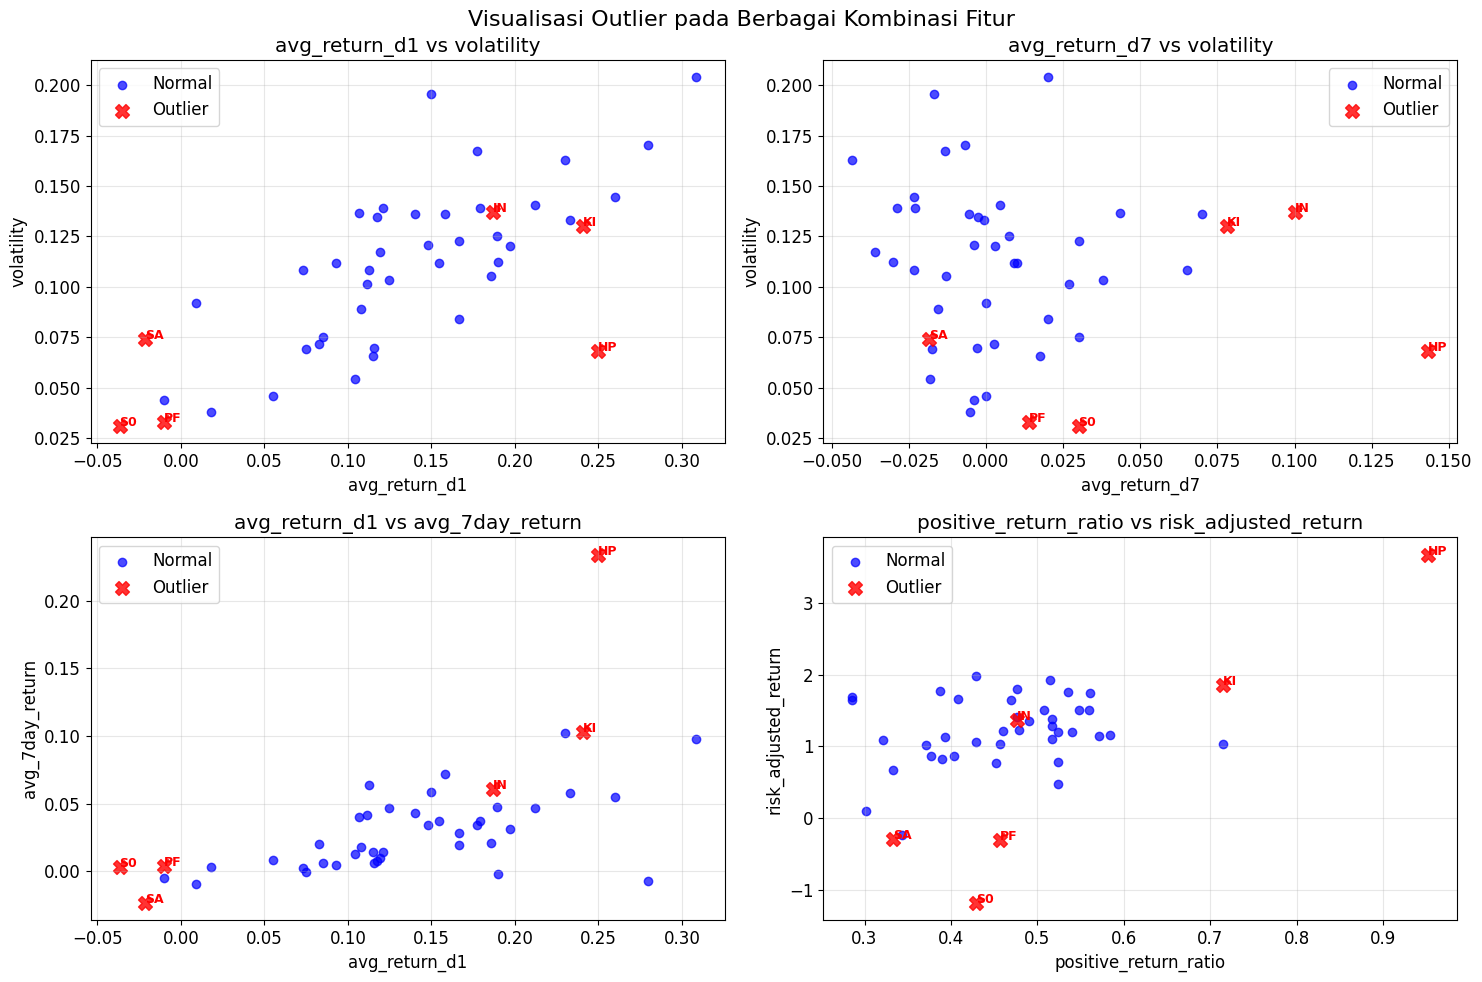

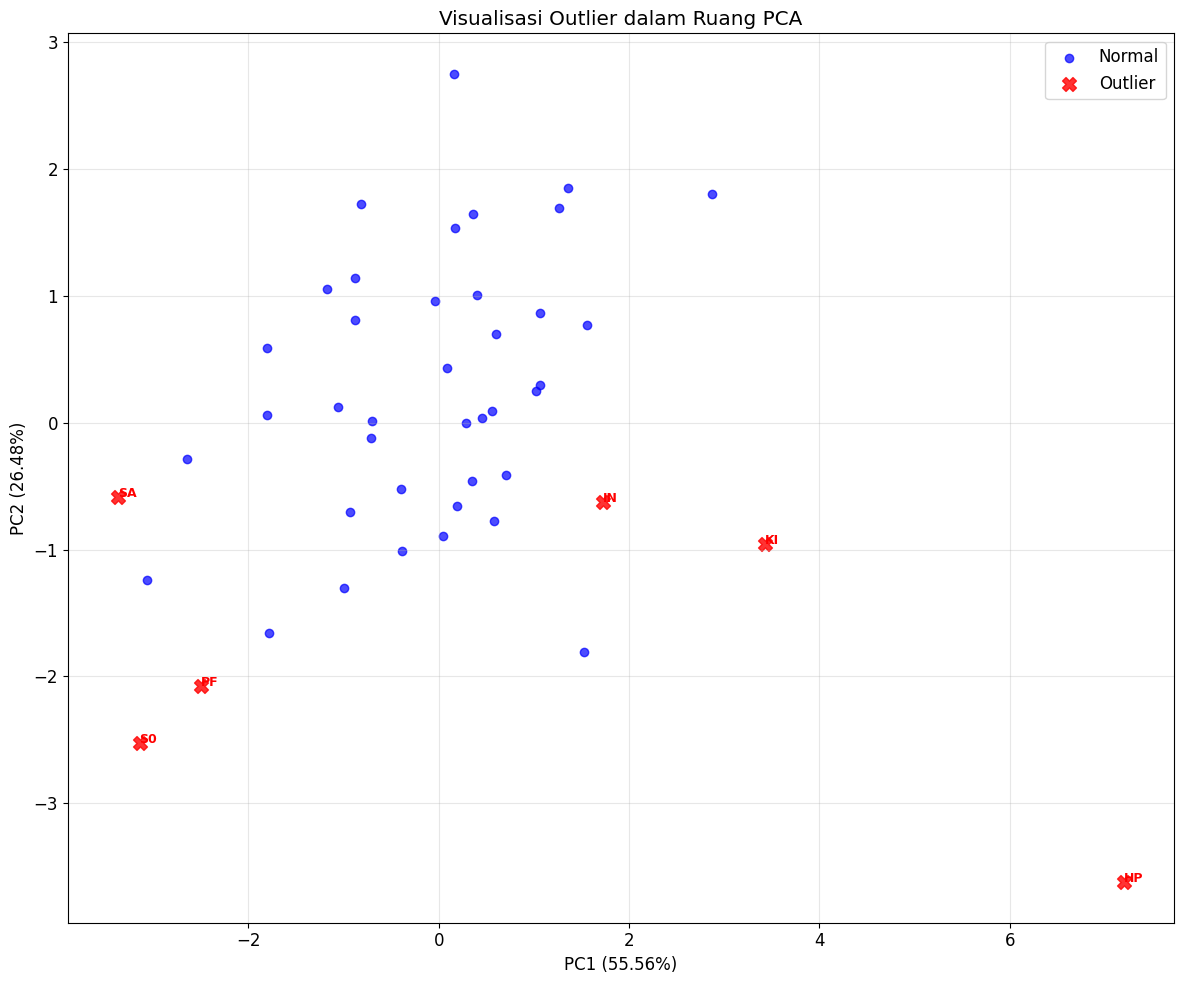


Perbandingan Dataset:
- Dataset dengan outlier: 45 underwriter
- Dataset tanpa outlier: 39 underwriter

Dataset standarisasi tanpa outlier siap untuk clustering.


In [ ]:
# Bagian 6: Deteksi dan Analisis Outlier

# 6.1 Deteksi Outlier dengan Metode IQR
def detect_outliers_iqr(df, col, threshold=1.5):
    """
    Deteksi outlier menggunakan metode IQR

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame yang berisi data
    col : str
        Nama kolom yang akan dideteksi outlier-nya
    threshold : float, default=1.5
        Pengali IQR untuk batas outlier

    Returns:
    --------
    pandas.Index
        Index dari baris yang terdeteksi sebagai outlier
    """
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)].index

# 6.2 Deteksi Outlier dengan Metode Z-Score
def detect_outliers_zscore(df, col, threshold=3.0):
    """
    Deteksi outlier menggunakan metode Z-Score

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame yang berisi data
    col : str
        Nama kolom yang akan dideteksi outlier-nya
    threshold : float, default=3.0
        Batas Z-Score untuk menentukan outlier

    Returns:
    --------
    pandas.Index
        Index dari baris yang terdeteksi sebagai outlier
    """
    z_scores = (df[col] - df[col].mean()) / df[col].std()
    return df[abs(z_scores) > threshold].index

# 6.3 Deteksi Outlier untuk Semua Fitur Clustering
print("Deteksi Outlier untuk Fitur Clustering:")
print("-" * 50)

outliers_by_feature_iqr = {}
outliers_by_feature_zscore = {}
all_outliers_iqr = set()
all_outliers_zscore = set()

for feature in features_for_clustering:
    # Deteksi dengan IQR
    outlier_indices_iqr = detect_outliers_iqr(df_features, feature)
    outliers_by_feature_iqr[feature] = list(outlier_indices_iqr)
    all_outliers_iqr.update(outlier_indices_iqr)

    # Deteksi dengan Z-Score
    outlier_indices_zscore = detect_outliers_zscore(df_features, feature)
    outliers_by_feature_zscore[feature] = list(outlier_indices_zscore)
    all_outliers_zscore.update(outlier_indices_zscore)

    # Tampilkan hasil
    print(f"Fitur: {feature}")
    print(f"  - Metode IQR: {len(outlier_indices_iqr)} outlier")
    if len(outlier_indices_iqr) > 0:
        print(f"    {', '.join(outlier_indices_iqr)}")

    print(f"  - Metode Z-Score: {len(outlier_indices_zscore)} outlier")
    if len(outlier_indices_zscore) > 0:
        print(f"    {', '.join(outlier_indices_zscore)}")
    print()

# 6.4 Gabungkan Hasil dari Kedua Metode
common_outliers = all_outliers_iqr.intersection(all_outliers_zscore)
all_outliers = all_outliers_iqr.union(all_outliers_zscore)

print("Ringkasan Deteksi Outlier:")
print(f"Total outlier dengan metode IQR: {len(all_outliers_iqr)}")
print(f"Total outlier dengan metode Z-Score: {len(all_outliers_zscore)}")
print(f"Outlier yang terdeteksi oleh kedua metode: {len(common_outliers)}")
print(f"Total outlier gabungan: {len(all_outliers)}")

# 6.5 Tandai Outlier dalam DataFrame
df_features['is_outlier'] = df_features.index.isin(all_outliers)
print(f"\nJumlah underwriter outlier: {df_features['is_outlier'].sum()}")
print(f"Jumlah underwriter normal: {(~df_features['is_outlier']).sum()}")

# 6.6 Visualisasi Outlier dalam Scatter Plot
plt.figure(figsize=(15, 10))

# Pilih beberapa kombinasi fitur untuk visualisasi
feature_pairs = [
    ('avg_return_d1', 'volatility'),
    ('avg_return_d7', 'volatility'),
    ('avg_return_d1', 'avg_7day_return'),
    ('positive_return_ratio', 'risk_adjusted_return')
]

for i, (feature_x, feature_y) in enumerate(feature_pairs):
    plt.subplot(2, 2, i+1)

    # Pisahkan data normal dan outlier
    normal_mask = ~df_features['is_outlier']
    outlier_mask = df_features['is_outlier']

    # Plot data normal
    plt.scatter(
        df_features.loc[normal_mask, feature_x],
        df_features.loc[normal_mask, feature_y],
        alpha=0.7,
        color='blue',
        label='Normal'
    )

    # Plot outlier
    plt.scatter(
        df_features.loc[outlier_mask, feature_x],
        df_features.loc[outlier_mask, feature_y],
        alpha=0.8,
        color='red',
        marker='X',
        s=100,
        label='Outlier'
    )

    # Tambahkan anotasi untuk outlier
    for uw in df_features[outlier_mask].index:
        plt.annotate(
            uw,
            (df_features.loc[uw, feature_x], df_features.loc[uw, feature_y]),
            fontsize=9,
            color='red',
            fontweight='bold'
        )

    plt.title(f'{feature_x} vs {feature_y}')
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.suptitle('Visualisasi Outlier pada Berbagai Kombinasi Fitur', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

# 6.7 Visualisasi Outlier dalam PCA
plt.figure(figsize=(12, 10))

# Scatter plot dengan warna berdasarkan status outlier
plt.scatter(
    df_pca.loc[~df_features['is_outlier'], 'PC1'],
    df_pca.loc[~df_features['is_outlier'], 'PC2'],
    alpha=0.7,
    color='blue',
    label='Normal'
)

plt.scatter(
    df_pca.loc[df_features['is_outlier'], 'PC1'],
    df_pca.loc[df_features['is_outlier'], 'PC2'],
    alpha=0.8,
    color='red',
    marker='X',
    s=100,
    label='Outlier'
)

# Tambahkan anotasi untuk outlier
for uw in df_features[df_features['is_outlier']].index:
    plt.annotate(
        uw,
        (df_pca.loc[uw, 'PC1'], df_pca.loc[uw, 'PC2']),
        fontsize=9,
        color='red',
        fontweight='bold'
    )

plt.title('Visualisasi Outlier dalam Ruang PCA')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 6.8 Siapkan Dataset Tanpa Outlier
df_features_no_outliers = df_features[~df_features['is_outlier']].copy()

print("\nPerbandingan Dataset:")
print(f"- Dataset dengan outlier: {len(df_features)} underwriter")
print(f"- Dataset tanpa outlier: {len(df_features_no_outliers)} underwriter")

# 6.9 Standarisasi Dataset Tanpa Outlier
X_no_outliers = df_features_no_outliers[features_for_clustering].values
scaler_no_outliers = StandardScaler()
X_scaled_no_outliers = scaler_no_outliers.fit_transform(X_no_outliers)

print("\nDataset standarisasi tanpa outlier siap untuk clustering.")

# **# Bagian 7: Evaluasi Jumlah Cluster Optimal dengan Cross-Validation**

Menjalankan cross-validation untuk dataset DENGAN outlier:
Evaluasi untuk 2 cluster...
  Hasil untuk 2 cluster:
    silhouette: N/A
    bic: 317.5803 ± 127.1224
    aic: 306.7329 ± 127.1224

Evaluasi untuk 3 cluster...
  Hasil untuk 3 cluster:
    silhouette: 0.0341 ± 0.0692
    bic: 586.7242 ± 377.8526
    aic: 570.3546 ± 377.8526

Evaluasi untuk 4 cluster...
  Hasil untuk 4 cluster:
    silhouette: 0.3294 ± 0.0000
    bic: 1614.1219 ± 1789.4682
    aic: 1592.2299 ± 1789.4682

Evaluasi untuk 5 cluster...
  Hasil untuk 5 cluster:
    silhouette: 0.1651 ± 0.0930
    bic: 795.7643 ± 370.3767
    aic: 768.3501 ± 370.3767

Evaluasi untuk 6 cluster...
  Hasil untuk 6 cluster:
    silhouette: -0.0867 ± 0.1330
    bic: 2569.0759 ± 2191.0691
    aic: 2536.1394 ± 2191.0691

Evaluasi untuk 7 cluster...
  Hasil untuk 7 cluster:
    silhouette: -0.0692 ± 0.0990
    bic: 3315.5768 ± 1882.9444
    aic: 3277.1180 ± 1882.9444


Menjalankan cross-validation untuk dataset TANPA outlier:
Evaluasi untuk 2

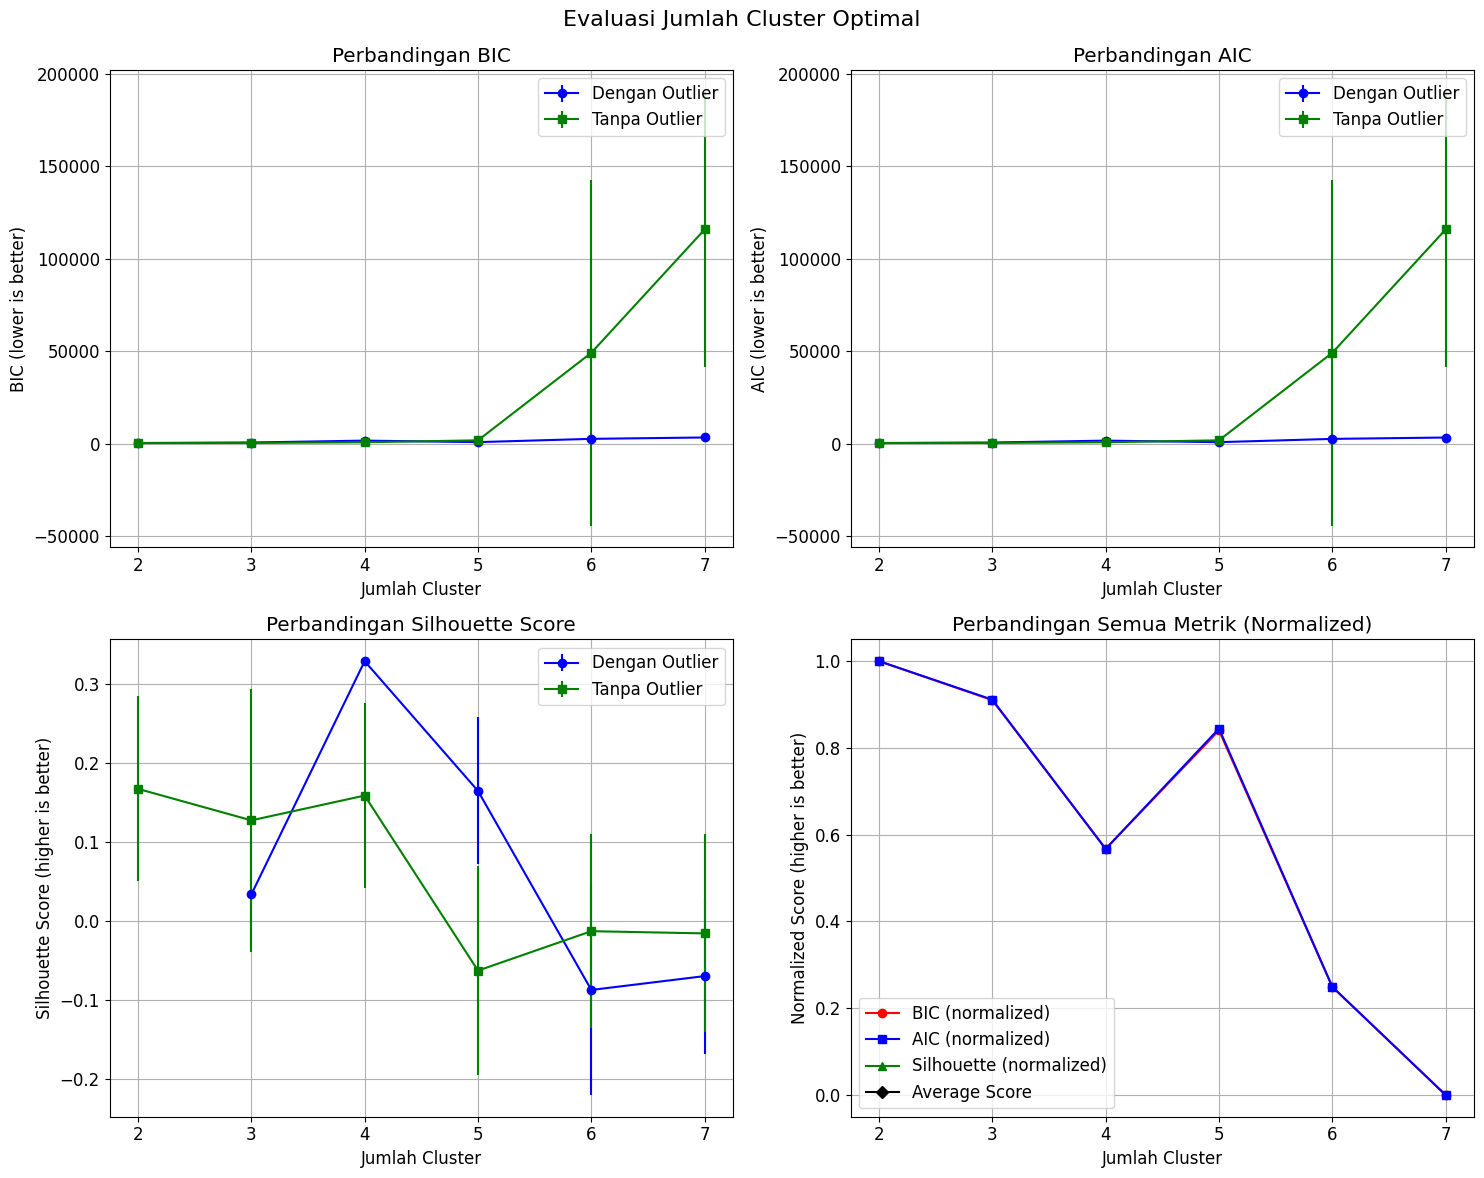


Jumlah Cluster Optimal untuk Dataset Dengan Outlier:
- Berdasarkan silhouette: 4
- Berdasarkan bic: 2
- Berdasarkan aic: 2

Jumlah Cluster Optimal untuk Dataset Tanpa Outlier:
- Berdasarkan silhouette: 2
- Berdasarkan bic: 2
- Berdasarkan aic: 2

Berdasarkan voting dari ketiga metrik:
- Jumlah cluster optimal untuk dataset DENGAN outlier: 2
- Jumlah cluster optimal untuk dataset TANPA outlier: 2


In [ ]:
# Bagian 7: Evaluasi Jumlah Cluster Optimal dengan Cross-Validation

# 7.1 Definisikan Fungsi untuk Cross-Validation
def evaluate_gmm_stability(X, n_components_range, n_splits=5, random_state=42):
    """
    Evaluasi stabilitas model GMM menggunakan k-fold cross-validation.

    Parameters:
    -----------
    X : numpy.ndarray
        Data input yang sudah distandarisasi
    n_components_range : iterable
        Range jumlah komponen (cluster) yang akan dievaluasi
    n_splits : int, default=5
        Jumlah fold untuk cross-validation
    random_state : int, default=42
        Random seed untuk reproducibility

    Returns:
    --------
    dict
        Dictionary berisi metrik evaluasi untuk setiap jumlah komponen
    """
    results = {}

    for n_components in n_components_range:
        print(f"Evaluasi untuk {n_components} cluster...")

        kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
        fold_metrics = {
            'silhouette': [],
            'bic': [],
            'aic': [],
            'log_likelihood': []
        }

        for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
            X_train, X_test = X[train_idx], X[test_idx]

            # Fit model pada data training
            gmm = GaussianMixture(
                n_components=n_components,
                covariance_type='full',
                random_state=random_state,
                n_init=5  # 5 inisialisasi berbeda, pilih yang terbaik
            )
            gmm.fit(X_train)

            # Evaluasi pada data testing
            labels_test = gmm.predict(X_test)

            # Hitung metrik
            fold_metrics['bic'].append(gmm.bic(X_test))
            fold_metrics['aic'].append(gmm.aic(X_test))
            fold_metrics['log_likelihood'].append(gmm.score(X_test) * X_test.shape[0])

            # Silhouette score hanya valid jika jumlah cluster > 1
            # dan jumlah sampel > jumlah cluster
            if (len(np.unique(labels_test)) > 1) and (len(X_test) > n_components):
                fold_metrics['silhouette'].append(silhouette_score(X_test, labels_test))
            else:
                fold_metrics['silhouette'].append(np.nan)

        # Hitung statistik agregat
        for metric in fold_metrics:
            valid_values = [v for v in fold_metrics[metric] if not np.isnan(v)]
            if valid_values:
                fold_metrics[metric] = {
                    'mean': np.mean(valid_values),
                    'std': np.std(valid_values),
                    'values': fold_metrics[metric]
                }
            else:
                fold_metrics[metric] = {
                    'mean': np.nan,
                    'std': np.nan,
                    'values': fold_metrics[metric]
                }

        results[n_components] = fold_metrics

        # Tampilkan hasil untuk jumlah cluster ini
        print(f"  Hasil untuk {n_components} cluster:")
        for metric in ['silhouette', 'bic', 'aic']:
            if not np.isnan(fold_metrics[metric]['mean']):
                print(f"    {metric}: {fold_metrics[metric]['mean']:.4f} ± {fold_metrics[metric]['std']:.4f}")
            else:
                print(f"    {metric}: N/A")
        print()

    return results

# 7.2 Evaluasi Dataset dengan Outlier
print("Menjalankan cross-validation untuk dataset DENGAN outlier:")
n_components_range = range(2, 8)  # Evaluasi 2-7 cluster
cv_results_with_outliers = evaluate_gmm_stability(X_scaled, n_components_range)

# 7.3 Evaluasi Dataset tanpa Outlier
print("\nMenjalankan cross-validation untuk dataset TANPA outlier:")
cv_results_no_outliers = evaluate_gmm_stability(X_scaled_no_outliers, n_components_range)

# 7.4 Visualisasi Hasil Cross-Validation
# 7.4.1 Persiapkan data untuk plotting
metrics_with_outliers = {
    'n_components': [],
    'silhouette': [],
    'silhouette_std': [],
    'bic': [],
    'bic_std': [],
    'aic': [],
    'aic_std': []
}

for n in n_components_range:
    metrics_with_outliers['n_components'].append(n)
    metrics_with_outliers['silhouette'].append(cv_results_with_outliers[n]['silhouette']['mean'])
    metrics_with_outliers['silhouette_std'].append(cv_results_with_outliers[n]['silhouette']['std'])
    metrics_with_outliers['bic'].append(cv_results_with_outliers[n]['bic']['mean'])
    metrics_with_outliers['bic_std'].append(cv_results_with_outliers[n]['bic']['std'])
    metrics_with_outliers['aic'].append(cv_results_with_outliers[n]['aic']['mean'])
    metrics_with_outliers['aic_std'].append(cv_results_with_outliers[n]['aic']['std'])

metrics_with_outliers_df = pd.DataFrame(metrics_with_outliers)

# Sama untuk dataset tanpa outlier
metrics_no_outliers = {
    'n_components': [],
    'silhouette': [],
    'silhouette_std': [],
    'bic': [],
    'bic_std': [],
    'aic': [],
    'aic_std': []
}

for n in n_components_range:
    metrics_no_outliers['n_components'].append(n)
    metrics_no_outliers['silhouette'].append(cv_results_no_outliers[n]['silhouette']['mean'])
    metrics_no_outliers['silhouette_std'].append(cv_results_no_outliers[n]['silhouette']['std'])
    metrics_no_outliers['bic'].append(cv_results_no_outliers[n]['bic']['mean'])
    metrics_no_outliers['bic_std'].append(cv_results_no_outliers[n]['bic']['std'])
    metrics_no_outliers['aic'].append(cv_results_no_outliers[n]['aic']['mean'])
    metrics_no_outliers['aic_std'].append(cv_results_no_outliers[n]['aic']['std'])

metrics_no_outliers_df = pd.DataFrame(metrics_no_outliers)

# 7.4.2 Visualisasi hasil
plt.figure(figsize=(15, 12))

# BIC Comparison
plt.subplot(2, 2, 1)
plt.errorbar(
    metrics_with_outliers_df['n_components'],
    metrics_with_outliers_df['bic'],
    yerr=metrics_with_outliers_df['bic_std'],
    fmt='o-',
    color='blue',
    label='Dengan Outlier'
)
plt.errorbar(
    metrics_no_outliers_df['n_components'],
    metrics_no_outliers_df['bic'],
    yerr=metrics_no_outliers_df['bic_std'],
    fmt='s-',
    color='green',
    label='Tanpa Outlier'
)
plt.xlabel('Jumlah Cluster')
plt.ylabel('BIC (lower is better)')
plt.title('Perbandingan BIC')
plt.legend()
plt.grid(True)

# AIC Comparison
plt.subplot(2, 2, 2)
plt.errorbar(
    metrics_with_outliers_df['n_components'],
    metrics_with_outliers_df['aic'],
    yerr=metrics_with_outliers_df['aic_std'],
    fmt='o-',
    color='blue',
    label='Dengan Outlier'
)
plt.errorbar(
    metrics_no_outliers_df['n_components'],
    metrics_no_outliers_df['aic'],
    yerr=metrics_no_outliers_df['aic_std'],
    fmt='s-',
    color='green',
    label='Tanpa Outlier'
)
plt.xlabel('Jumlah Cluster')
plt.ylabel('AIC (lower is better)')
plt.title('Perbandingan AIC')
plt.legend()
plt.grid(True)

# Silhouette Comparison
plt.subplot(2, 2, 3)
plt.errorbar(
    metrics_with_outliers_df['n_components'],
    metrics_with_outliers_df['silhouette'],
    yerr=metrics_with_outliers_df['silhouette_std'],
    fmt='o-',
    color='blue',
    label='Dengan Outlier'
)
plt.errorbar(
    metrics_no_outliers_df['n_components'],
    metrics_no_outliers_df['silhouette'],
    yerr=metrics_no_outliers_df['silhouette_std'],
    fmt='s-',
    color='green',
    label='Tanpa Outlier'
)
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score (higher is better)')
plt.title('Perbandingan Silhouette Score')
plt.legend()
plt.grid(True)

# Plot kombinasi semua metrik (normalized)
plt.subplot(2, 2, 4)

# Normalisasi metrik untuk perbandingan
def normalize_metric(values, higher_better=True):
    min_val = min(values)
    max_val = max(values)
    if min_val == max_val:
        return [0.5] * len(values)

    normalized = [(x - min_val) / (max_val - min_val) for x in values]

    if not higher_better:
        normalized = [1 - x for x in normalized]

    return normalized

# Normalisasi BIC (lower is better)
bic_norm = normalize_metric(metrics_with_outliers_df['bic'], higher_better=False)
# Normalisasi AIC (lower is better)
aic_norm = normalize_metric(metrics_with_outliers_df['aic'], higher_better=False)
# Normalisasi Silhouette (higher is better)
silhouette_norm = normalize_metric(metrics_with_outliers_df['silhouette'], higher_better=True)

# Plot semua metrik normalized
plt.plot(
    metrics_with_outliers_df['n_components'],
    bic_norm,
    'o-',
    color='red',
    label='BIC (normalized)'
)
plt.plot(
    metrics_with_outliers_df['n_components'],
    aic_norm,
    's-',
    color='blue',
    label='AIC (normalized)'
)
plt.plot(
    metrics_with_outliers_df['n_components'],
    silhouette_norm,
    '^-',
    color='green',
    label='Silhouette (normalized)'
)

# Rata-rata dari semua metrik untuk keputusan final
avg_scores = [(b + a + s) / 3 for b, a, s in zip(bic_norm, aic_norm, silhouette_norm)]
plt.plot(
    metrics_with_outliers_df['n_components'],
    avg_scores,
    'D-',
    color='black',
    label='Average Score'
)

plt.xlabel('Jumlah Cluster')
plt.ylabel('Normalized Score (higher is better)')
plt.title('Perbandingan Semua Metrik (Normalized)')
plt.legend()
plt.grid(True)

plt.suptitle('Evaluasi Jumlah Cluster Optimal', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

# 7.5 Tentukan Jumlah Cluster Optimal
def get_optimal_clusters(metrics_df):
    """Tentukan jumlah cluster optimal berdasarkan berbagai metrik"""

    optimal = {}

    # Silhouette (higher is better)
    if not metrics_df['silhouette'].isna().all():
        optimal['silhouette'] = metrics_df.loc[metrics_df['silhouette'].idxmax(), 'n_components']
    else:
        optimal['silhouette'] = np.nan

    # BIC (lower is better)
    if not metrics_df['bic'].isna().all():
        optimal['bic'] = metrics_df.loc[metrics_df['bic'].idxmin(), 'n_components']
    else:
        optimal['bic'] = np.nan

    # AIC (lower is better)
    if not metrics_df['aic'].isna().all():
        optimal['aic'] = metrics_df.loc[metrics_df['aic'].idxmin(), 'n_components']
    else:
        optimal['aic'] = np.nan

    return optimal

# Jumlah cluster optimal untuk dataset dengan outlier
optimal_with_outliers = get_optimal_clusters(metrics_with_outliers_df)
print("\nJumlah Cluster Optimal untuk Dataset Dengan Outlier:")
for metric, n_clusters in optimal_with_outliers.items():
    print(f"- Berdasarkan {metric}: {n_clusters}")

# Jumlah cluster optimal untuk dataset tanpa outlier
optimal_no_outliers = get_optimal_clusters(metrics_no_outliers_df)
print("\nJumlah Cluster Optimal untuk Dataset Tanpa Outlier:")
for metric, n_clusters in optimal_no_outliers.items():
    print(f"- Berdasarkan {metric}: {n_clusters}")

# 7.6 Pilih Final Jumlah Cluster Optimal
from collections import Counter

# Voting untuk dataset dengan outlier
votes_with = Counter([
    optimal_with_outliers['bic'],
    optimal_with_outliers['aic'],
    optimal_with_outliers['silhouette']
])
optimal_n_with = votes_with.most_common(1)[0][0]

# Voting untuk dataset tanpa outlier
votes_without = Counter([
    optimal_no_outliers['bic'],
    optimal_no_outliers['aic'],
    optimal_no_outliers['silhouette']
])
optimal_n_without = votes_without.most_common(1)[0][0]

print("\nBerdasarkan voting dari ketiga metrik:")
print(f"- Jumlah cluster optimal untuk dataset DENGAN outlier: {optimal_n_with}")
print(f"- Jumlah cluster optimal untuk dataset TANPA outlier: {optimal_n_without}")

# Simpan untuk digunakan oleh bagian selanjutnya
n_clusters_with_outliers = optimal_n_with
n_clusters_no_outliers = optimal_n_without

# **# Bagian 8: Implementasi GMM dan Analisis Hasil Clustering**

Menjalankan GMM untuk dataset DENGAN outlier...

Menjalankan GMM untuk dataset TANPA outlier...


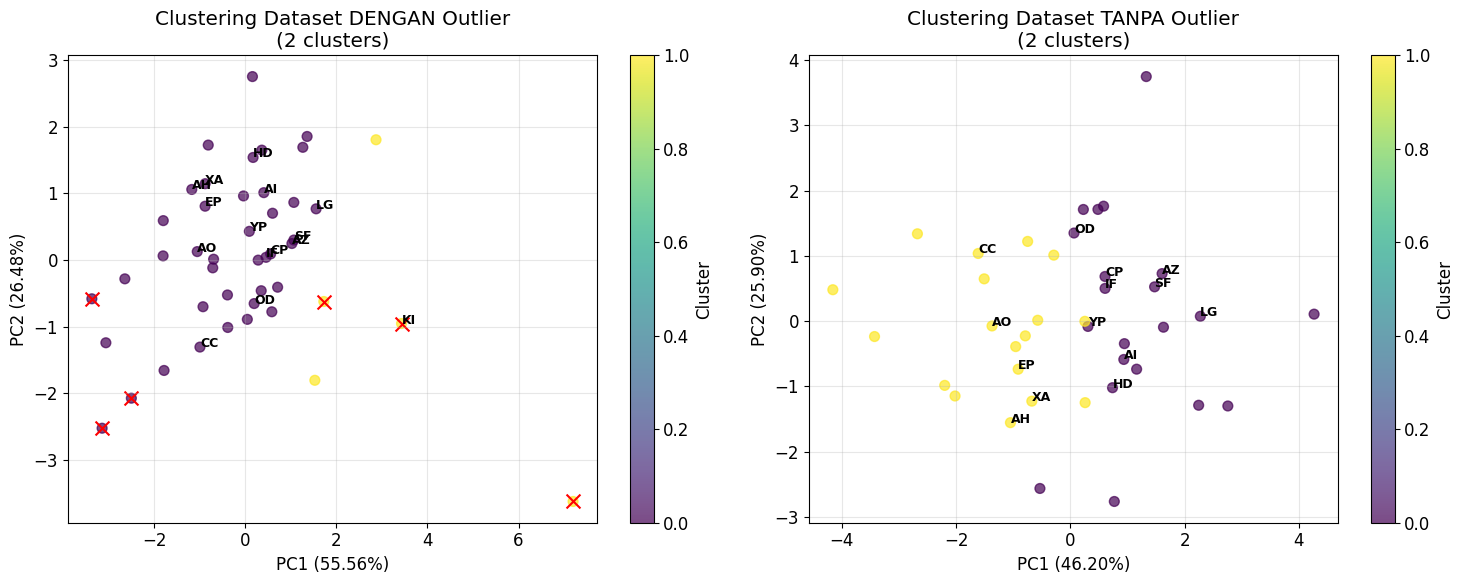

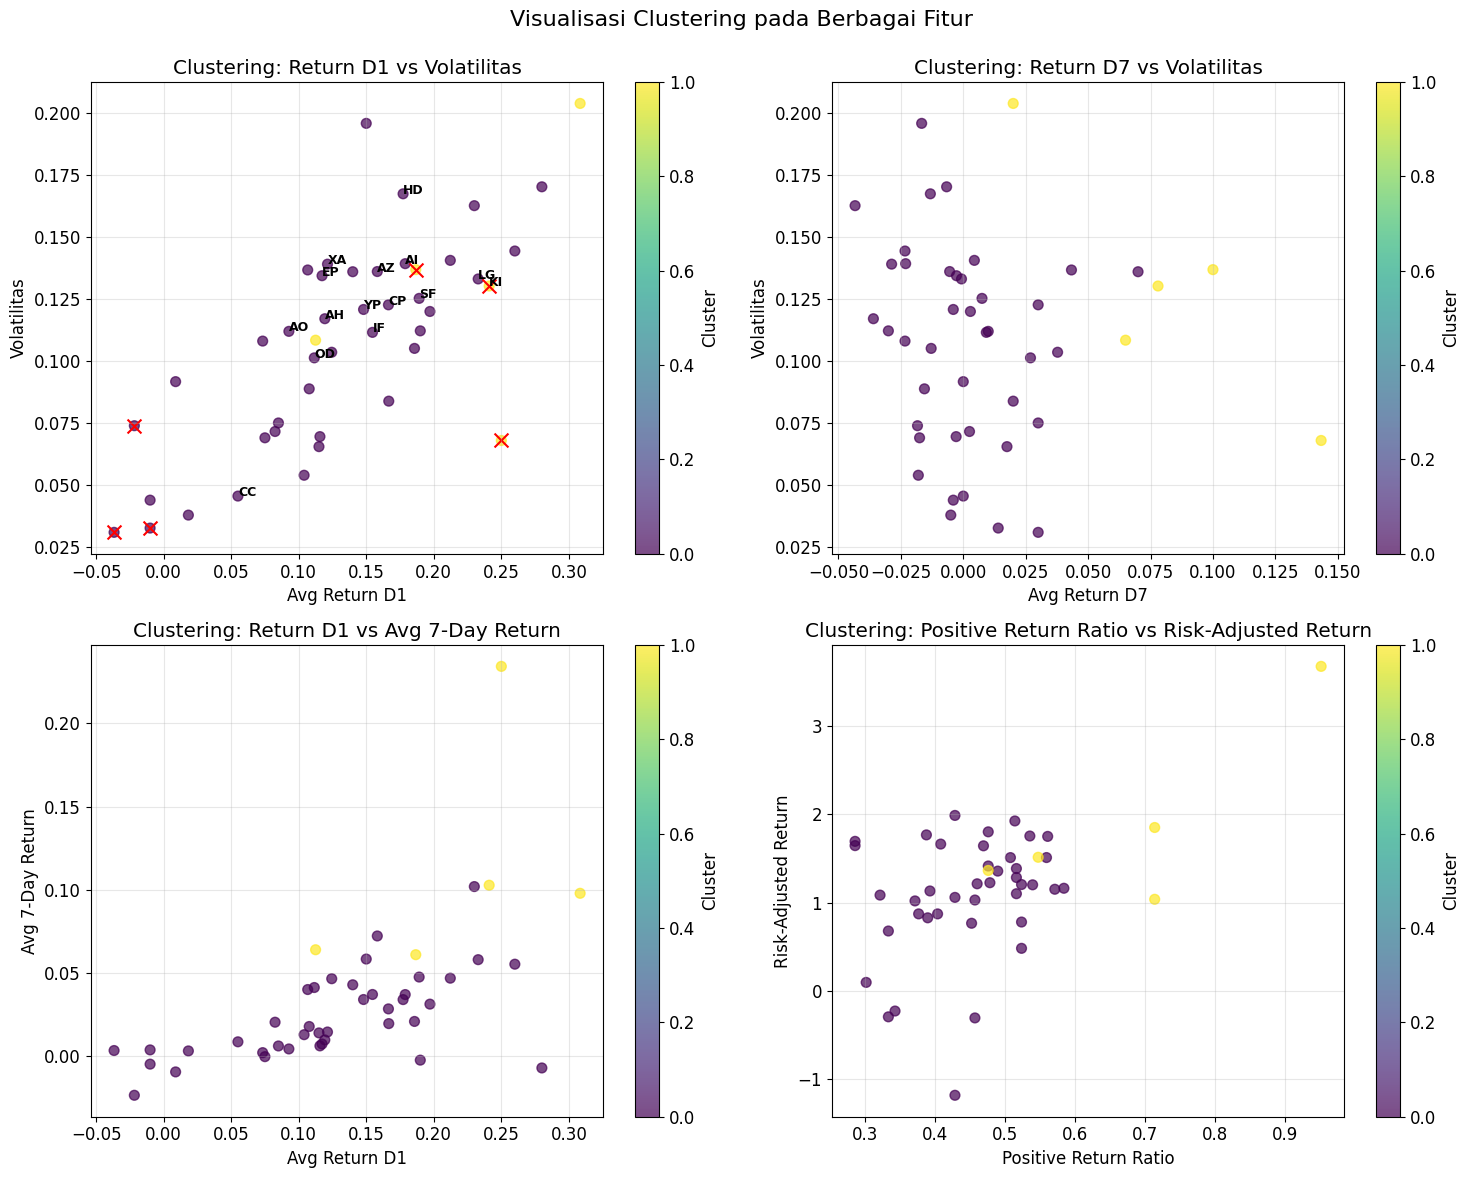


Karakteristik Cluster (Dataset DENGAN outlier):


avg_return_d1  avg_return_d7  volatility  positive_return_ratio  \
cluster                                                                    
0             0.124315       0.000119    0.105798               0.448301   
1             0.219700       0.081267    0.129521               0.680952   

         avg_7day_return  risk_adjusted_return  ipo_count  
cluster                                                    
0               0.023455              1.075622       9.05  
1               0.111948              1.887031       5.20


Jumlah Underwriter per Cluster:
Cluster 0: 40 underwriter (88.9%)
Cluster 1: 5 underwriter (11.1%)


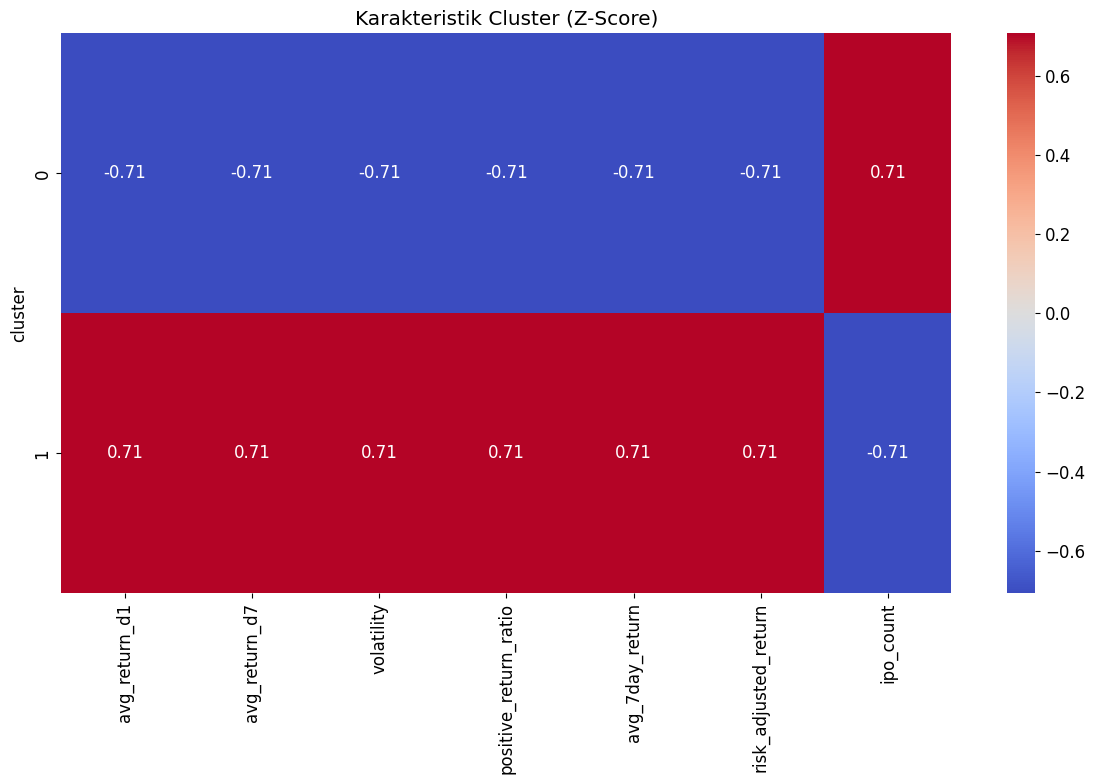

<Figure size 1200x1000 with 0 Axes>

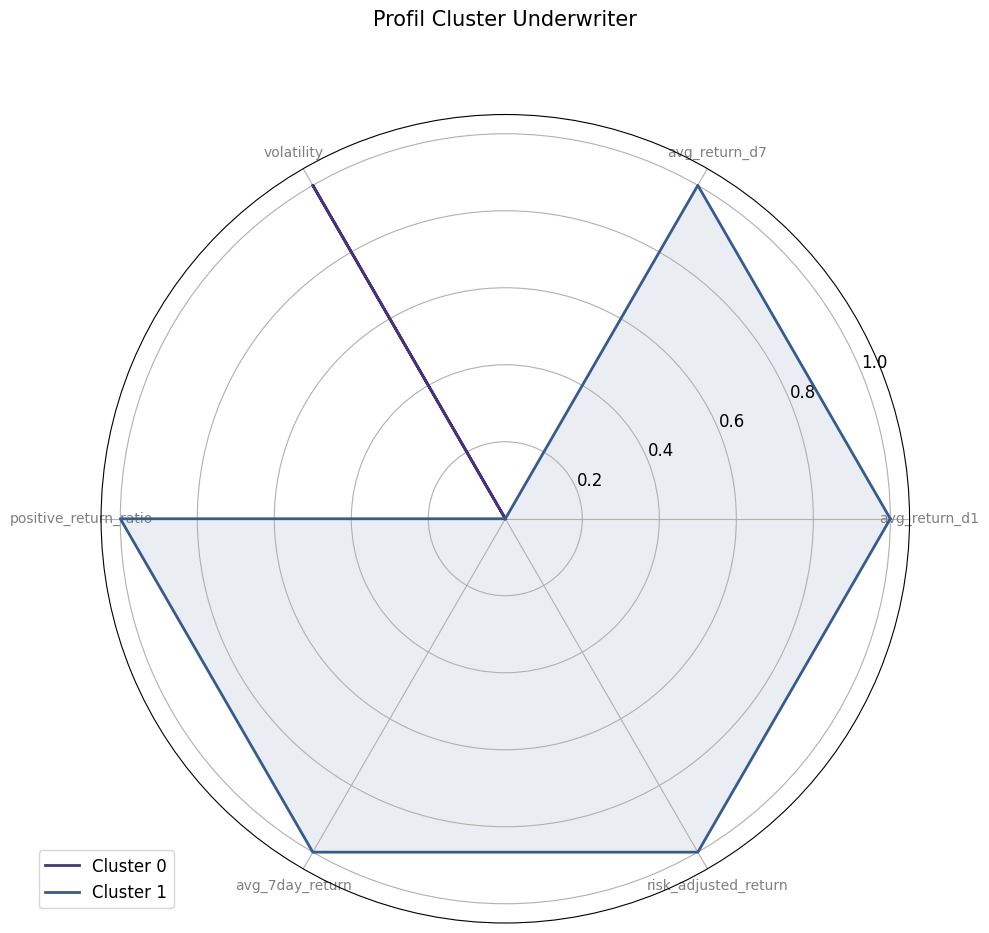


Cluster 0 - 40 Underwriter:
----------------------------------------
Top 10 underwriter berdasarkan jumlah IPO:


avg_return_d1  avg_return_d7  volatility  positive_return_ratio  \
UW                                                                    
AI       0.178846      -0.023077    0.139308               0.516484   
XA       0.121304      -0.028696    0.139109               0.403727   
HD       0.177273      -0.013182    0.167446               0.428571   
YP       0.148000      -0.004000    0.120853               0.478571   
AH       0.119333      -0.036000    0.117128               0.371429   
CP       0.166429       0.030000    0.122722               0.489796   
LG       0.232857      -0.000714    0.133148               0.561224   
OD       0.111538       0.026923    0.101363               0.516484   
IF       0.154615       0.009231    0.111626               0.516484   
CC       0.055000       0.000000    0.045673               0.523810   

    avg_7day_return  ipo_count  
UW                              
AI         0.036978         26  
XA         0.014472         23  
HD         0.033961         22  
YP         0.034000         20  
AH         0.009714         15  
CP         0.028367         14  
LG         0.057959         14  
OD         0.041209         13  
IF         0.037033         13  
CC         0.008571         12

Semua underwriter dalam cluster 0:
AI, XA, HD, YP, AH, CP, LG, OD, IF, CC, SF, AO, EP, AZ, IU, NI, GR, C3, YJ, MG, PD, MI, II, SA, PG, CS, PF, KZ, LS, RS, AK, DP, KK, ZP, S0, SQ, DR, BQ, AN, AR

Cluster 1 - 5 Underwriter:
----------------------------------------
Top 10 underwriter berdasarkan jumlah IPO:


avg_return_d1  avg_return_d7  volatility  positive_return_ratio  \
UW                                                                    
KI       0.241000       0.078000    0.130306               0.714286   
SH       0.308333       0.020000    0.203850               0.547619   
TP       0.112500       0.065000    0.108474               0.714286   
HP       0.250000       0.143333    0.068074               0.952381   
IN       0.186667       0.100000    0.136901               0.476190   

    avg_7day_return  ipo_count  
UW                              
KI         0.102714         10  
SH         0.097857          6  
TP         0.063929          4  
HP         0.234286          3  
IN         0.060952          3

Semua underwriter dalam cluster 1:
KI, SH, TP, HP, IN


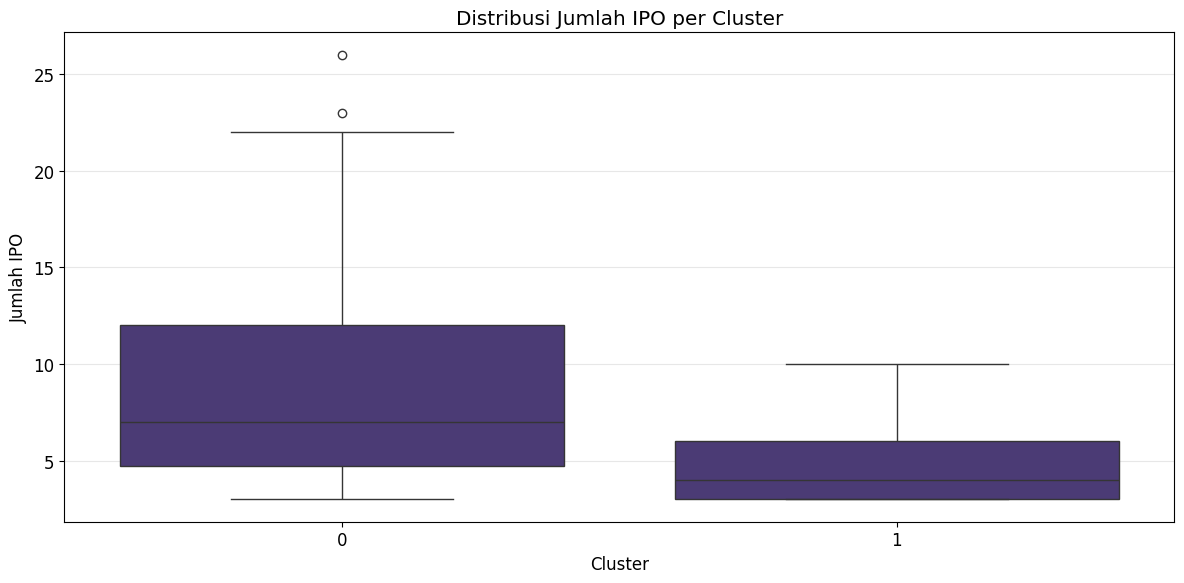


Profil Cluster Underwriter Pasca-IPO:

Cluster 0 - Low Risk - Low Return (Stabil) (40 Underwriter)
----------------------------------------------------------------------
Avg Return D1: 0.1243
Avg Return D7: 0.0001
Avg 7-Day Return: 0.0235
Volatility: 0.1058
Positive Return Ratio: 0.4483
Risk-Adjusted Return: 1.0756

Top 5 Underwriter: AI, XA, HD, YP, AH

Cluster 1 - High Risk - High Return (5 Underwriter)
----------------------------------------------------------------------
Avg Return D1: 0.2197
Avg Return D7: 0.0813
Avg 7-Day Return: 0.1119
Volatility: 0.1295
Positive Return Ratio: 0.6810
Risk-Adjusted Return: 1.8870

Top 5 Underwriter: KI, SH, TP, HP, IN


In [ ]:
# Bagian 8: Implementasi GMM dan Analisis Hasil Clustering

# 8.1 Implementasi GMM untuk Dataset dengan Outlier
print("Menjalankan GMM untuk dataset DENGAN outlier...")
gmm_with_outliers = GaussianMixture(
    n_components=n_clusters_with_outliers,
    covariance_type='full',
    random_state=42,
    n_init=10
)
gmm_with_outliers.fit(X_scaled)

# Prediksi cluster dan probabilitas
labels_with_outliers = gmm_with_outliers.predict(X_scaled)
probs_with_outliers = gmm_with_outliers.predict_proba(X_scaled)

# Tambahkan hasil clustering ke DataFrame
df_features['cluster'] = labels_with_outliers

# Tambahkan probabilitas untuk masing-masing cluster
for i in range(n_clusters_with_outliers):
    df_features[f'prob_cluster_{i}'] = probs_with_outliers[:, i]

# 8.2 Implementasi GMM untuk Dataset tanpa Outlier
print("\nMenjalankan GMM untuk dataset TANPA outlier...")
gmm_no_outliers = GaussianMixture(
    n_components=n_clusters_no_outliers,
    covariance_type='full',
    random_state=42,
    n_init=10
)
gmm_no_outliers.fit(X_scaled_no_outliers)

# Prediksi cluster dan probabilitas
labels_no_outliers = gmm_no_outliers.predict(X_scaled_no_outliers)
probs_no_outliers = gmm_no_outliers.predict_proba(X_scaled_no_outliers)

# Tambahkan hasil clustering ke DataFrame
df_features_no_outliers['cluster'] = labels_no_outliers

# Tambahkan probabilitas untuk masing-masing cluster
for i in range(n_clusters_no_outliers):
    df_features_no_outliers[f'prob_cluster_{i}'] = probs_no_outliers[:, i]

# 8.3 Visualisasi Hasil Clustering dalam PCA
plt.figure(figsize=(15, 6))

# Dataset dengan outlier
plt.subplot(1, 2, 1)
scatter = plt.scatter(
    df_pca['PC1'],
    df_pca['PC2'],
    c=df_features['cluster'],
    cmap='viridis',
    s=50,
    alpha=0.7
)

# Tambahkan outlier marker
for uw in df_features[df_features['is_outlier']].index:
    plt.scatter(
        df_pca.loc[uw, 'PC1'],
        df_pca.loc[uw, 'PC2'],
        marker='x',
        color='red',
        s=100,
        alpha=1
    )

# Anotasi untuk top underwriter
for uw in top_n_uws:
    plt.annotate(
        uw,
        (df_pca.loc[uw, 'PC1'], df_pca.loc[uw, 'PC2']),
        fontsize=9,
        fontweight='bold'
    )

plt.colorbar(scatter, label='Cluster')
plt.title(f'Clustering Dataset DENGAN Outlier\n({n_clusters_with_outliers} clusters)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
plt.grid(True, alpha=0.3)

# Dataset tanpa outlier
plt.subplot(1, 2, 2)

# Fit PCA hanya untuk dataset tanpa outlier
pca_no_outliers = PCA(n_components=2)
pca_result_no_outliers = pca_no_outliers.fit_transform(X_scaled_no_outliers)
df_pca_no_outliers = pd.DataFrame(
    pca_result_no_outliers,
    columns=['PC1', 'PC2'],
    index=df_features_no_outliers.index
)

scatter = plt.scatter(
    df_pca_no_outliers['PC1'],
    df_pca_no_outliers['PC2'],
    c=df_features_no_outliers['cluster'],
    cmap='viridis',
    s=50,
    alpha=0.7
)

# Anotasi untuk top underwriter (jika ada dalam dataset tanpa outlier)
for uw in top_n_uws:
    if uw in df_pca_no_outliers.index:
        plt.annotate(
            uw,
            (df_pca_no_outliers.loc[uw, 'PC1'], df_pca_no_outliers.loc[uw, 'PC2']),
            fontsize=9,
            fontweight='bold'
        )

plt.colorbar(scatter, label='Cluster')
plt.title(f'Clustering Dataset TANPA Outlier\n({n_clusters_no_outliers} clusters)')
plt.xlabel(f'PC1 ({pca_no_outliers.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'PC2 ({pca_no_outliers.explained_variance_ratio_[1]:.2%})')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 8.4 Visualisasi Scatter Plot untuk Fitur Penting
plt.figure(figsize=(15, 12))

# Subplot 1: Return D1 vs Volatilitas
plt.subplot(2, 2, 1)
scatter = plt.scatter(
    df_features['avg_return_d1'],
    df_features['volatility'],
    c=df_features['cluster'],
    cmap='viridis',
    s=50,
    alpha=0.7
)

# Anotasi untuk outlier
for uw in df_features[df_features['is_outlier']].index:
    plt.scatter(
        df_features.loc[uw, 'avg_return_d1'],
        df_features.loc[uw, 'volatility'],
        marker='x',
        color='red',
        s=100,
        alpha=1
    )

# Anotasi untuk top underwriter
for uw in top_n_uws:
    plt.annotate(
        uw,
        (df_features.loc[uw, 'avg_return_d1'], df_features.loc[uw, 'volatility']),
        fontsize=9,
        fontweight='bold'
    )

plt.colorbar(scatter, label='Cluster')
plt.title('Clustering: Return D1 vs Volatilitas')
plt.xlabel('Avg Return D1')
plt.ylabel('Volatilitas')
plt.grid(True, alpha=0.3)

# Subplot 2: Return D7 vs Volatilitas
plt.subplot(2, 2, 2)
scatter = plt.scatter(
    df_features['avg_return_d7'],
    df_features['volatility'],
    c=df_features['cluster'],
    cmap='viridis',
    s=50,
    alpha=0.7
)

plt.colorbar(scatter, label='Cluster')
plt.title('Clustering: Return D7 vs Volatilitas')
plt.xlabel('Avg Return D7')
plt.ylabel('Volatilitas')
plt.grid(True, alpha=0.3)

# Subplot 3: Return D1 vs Average 7-Day Return
plt.subplot(2, 2, 3)
scatter = plt.scatter(
    df_features['avg_return_d1'],
    df_features['avg_7day_return'],
    c=df_features['cluster'],
    cmap='viridis',
    s=50,
    alpha=0.7
)

plt.colorbar(scatter, label='Cluster')
plt.title('Clustering: Return D1 vs Avg 7-Day Return')
plt.xlabel('Avg Return D1')
plt.ylabel('Avg 7-Day Return')
plt.grid(True, alpha=0.3)

# Subplot 4: Positive Return Ratio vs Risk-Adjusted Return
plt.subplot(2, 2, 4)
scatter = plt.scatter(
    df_features['positive_return_ratio'],
    df_features['risk_adjusted_return'],
    c=df_features['cluster'],
    cmap='viridis',
    s=50,
    alpha=0.7
)

plt.colorbar(scatter, label='Cluster')
plt.title('Clustering: Positive Return Ratio vs Risk-Adjusted Return')
plt.xlabel('Positive Return Ratio')
plt.ylabel('Risk-Adjusted Return')
plt.grid(True, alpha=0.3)

plt.suptitle('Visualisasi Clustering pada Berbagai Fitur', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

# 8.5 Analisis Karakteristik Cluster
# 8.5.1 Dataset dengan outlier
cluster_stats = df_features.groupby('cluster')[features_for_clustering + ['ipo_count']].mean()
cluster_counts = df_features['cluster'].value_counts().sort_index()

print("\nKarakteristik Cluster (Dataset DENGAN outlier):")
display(cluster_stats)

print("\nJumlah Underwriter per Cluster:")
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} underwriter ({count/len(df_features)*100:.1f}%)")

# 8.5.2 Visualisasi Heatmap Karakteristik Cluster
plt.figure(figsize=(12, 8))

# Standardisasi untuk visualisasi yang lebih baik
cluster_stats_std = (cluster_stats - cluster_stats.mean()) / cluster_stats.std()

sns.heatmap(
    cluster_stats_std,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    center=0
)
plt.title('Karakteristik Cluster (Z-Score)')
plt.tight_layout()
plt.show()

# 8.6 Visualisasi Radar Chart untuk Cluster Profiles
from math import pi

# 8.6.1 Fungsi untuk Membuat Radar Chart
def make_radar_chart(cluster_stats, features, title):
    # Jumlah variabel
    categories = features
    N = len(categories)

    # Normalisasi data untuk radar chart
    # Untuk fitur dengan nilai lebih tinggi = lebih baik
    norm_stats = cluster_stats[features].copy()

    for col in features:
        min_val = norm_stats[col].min()
        max_val = norm_stats[col].max()
        if max_val > min_val:
            # Untuk volatility, nilai lebih rendah lebih baik
            if col == 'volatility':
                norm_stats[col] = 1 - (norm_stats[col] - min_val) / (max_val - min_val)
            else:
                norm_stats[col] = (norm_stats[col] - min_val) / (max_val - min_val)
        else:
            norm_stats[col] = 0.5

    # Sudut untuk setiap variabel
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]  # Tutup polygon

    # Inisialisasi plot
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

    # Plot data untuk setiap cluster
    for i, cluster in enumerate(norm_stats.index):
        values = norm_stats.loc[cluster].values.flatten().tolist()
        values += values[:1]  # Tutup polygon

        ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Cluster {cluster}')
        ax.fill(angles, values, alpha=0.1)

    # Set kategori labels
    plt.xticks(angles[:-1], categories, color='grey', size=10)

    # Tambahkan legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    plt.title(title, size=15, y=1.1)

    return plt

# 8.6.2 Membuat Radar Chart
plt.figure(figsize=(12, 10))

radar_features = ['avg_return_d1', 'avg_return_d7', 'volatility',
                 'positive_return_ratio', 'avg_7day_return', 'risk_adjusted_return']

make_radar_chart(
    cluster_stats,
    radar_features,
    'Profil Cluster Underwriter'
)

plt.tight_layout()
plt.show()

# 8.7 Identifikasi dan Visualisasi Underwriter dalam Masing-masing Cluster
# 8.7.1 Daftar Underwriter per Cluster
for cluster_id in range(n_clusters_with_outliers):
    # Filter data untuk cluster tertentu
    cluster_members = df_features[df_features['cluster'] == cluster_id]

    # Urutkan berdasarkan jumlah IPO
    cluster_members_sorted = cluster_members.sort_values('ipo_count', ascending=False)

    print(f"\nCluster {cluster_id} - {len(cluster_members)} Underwriter:")
    print("-" * 40)

    # Tampilkan 10 underwriter teratas berdasarkan jumlah IPO
    top_members = cluster_members_sorted.head(10)

    # Format untuk display
    display_df = top_members[['avg_return_d1', 'avg_return_d7', 'volatility',
                             'positive_return_ratio', 'avg_7day_return', 'ipo_count']]

    print("Top 10 underwriter berdasarkan jumlah IPO:")
    display(display_df)

    # Tampilkan semua underwriter dalam cluster
    print(f"Semua underwriter dalam cluster {cluster_id}:")
    print(", ".join(cluster_members.index))

# 8.7.2 Visualisasi Distribusi IPO Count per Cluster
plt.figure(figsize=(12, 6))

sns.boxplot(x='cluster', y='ipo_count', data=df_features.reset_index())
plt.title('Distribusi Jumlah IPO per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah IPO')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 8.8 Interpretasi Profil Cluster
# 8.8.1 Menciptakan Label Deskriptif untuk Setiap Cluster
cluster_profiles = {}

for cluster in range(n_clusters_with_outliers):
    # Ambil nilai rata-rata untuk metrik penting
    avg_d1 = cluster_stats.loc[cluster, 'avg_return_d1']
    avg_d7 = cluster_stats.loc[cluster, 'avg_return_d7']
    avg_volatility = cluster_stats.loc[cluster, 'volatility']
    avg_positive_ratio = cluster_stats.loc[cluster, 'positive_return_ratio']
    avg_7day = cluster_stats.loc[cluster, 'avg_7day_return']
    risk_adjusted = cluster_stats.loc[cluster, 'risk_adjusted_return']

    # Definisikan profil berdasarkan nilai-nilai tersebut
    risk_level = 'High Risk' if avg_volatility > df_features['volatility'].mean() else 'Low Risk'

    if avg_d1 > df_features['avg_return_d1'].mean() and avg_7day > df_features['avg_7day_return'].mean():
        return_profile = 'High Return'
    elif avg_d1 > df_features['avg_return_d1'].mean() and avg_7day <= df_features['avg_7day_return'].mean():
        return_profile = 'High Initial Return, Poor Sustainability'
    elif avg_d1 <= df_features['avg_return_d1'].mean() and avg_7day > df_features['avg_7day_return'].mean():
        return_profile = 'Low Initial Return, Good Sustainability'
    else:
        return_profile = 'Low Return'

    # Buat label deskriptif
    if risk_level == 'High Risk' and return_profile == 'High Return':
        profile = 'High Risk - High Return'
    elif risk_level == 'Low Risk' and 'Low Return' in return_profile:
        profile = 'Low Risk - Low Return (Stabil)'
    elif risk_level == 'Low Risk' and 'High Return' in return_profile:
        profile = 'Low Risk - High Return (Premium)'
    else:
        profile = f'{risk_level} - {return_profile}'

    # Simpan profil cluster
    cluster_profiles[cluster] = {
        'profile': profile,
        'avg_return_d1': avg_d1,
        'avg_return_d7': avg_d7,
        'avg_7day_return': avg_7day,
        'volatility': avg_volatility,
        'positive_return_ratio': avg_positive_ratio,
        'risk_adjusted_return': risk_adjusted,
        'size': cluster_counts[cluster]
    }

# 8.8.2 Tampilkan Profil Cluster
print("\nProfil Cluster Underwriter Pasca-IPO:")
print("=" * 70)

for cluster, profile in cluster_profiles.items():
    print(f"\nCluster {cluster} - {profile['profile']} ({profile['size']} Underwriter)")
    print("-" * 70)
    print(f"Avg Return D1: {profile['avg_return_d1']:.4f}")
    print(f"Avg Return D7: {profile['avg_return_d7']:.4f}")
    print(f"Avg 7-Day Return: {profile['avg_7day_return']:.4f}")
    print(f"Volatility: {profile['volatility']:.4f}")
    print(f"Positive Return Ratio: {profile['positive_return_ratio']:.4f}")
    print(f"Risk-Adjusted Return: {profile['risk_adjusted_return']:.4f}")

    # Tampilkan 5 underwriter teratas dalam cluster
    top_uw = df_features[df_features['cluster'] == cluster].sort_values('ipo_count', ascending=False).head(5)
    print(f"\nTop 5 Underwriter: {', '.join(top_uw.index)}")

# **# Bagian 9: Uji Stabilitas Cluster dan Analisis Overfitting**

Analisis stabilitas untuk 2 cluster...
  Run 1/10 selesai
  Run 2/10 selesai
  Run 3/10 selesai
  Run 4/10 selesai
  Run 5/10 selesai
  Run 6/10 selesai
  Run 7/10 selesai
  Run 8/10 selesai
  Run 9/10 selesai
  Run 10/10 selesai


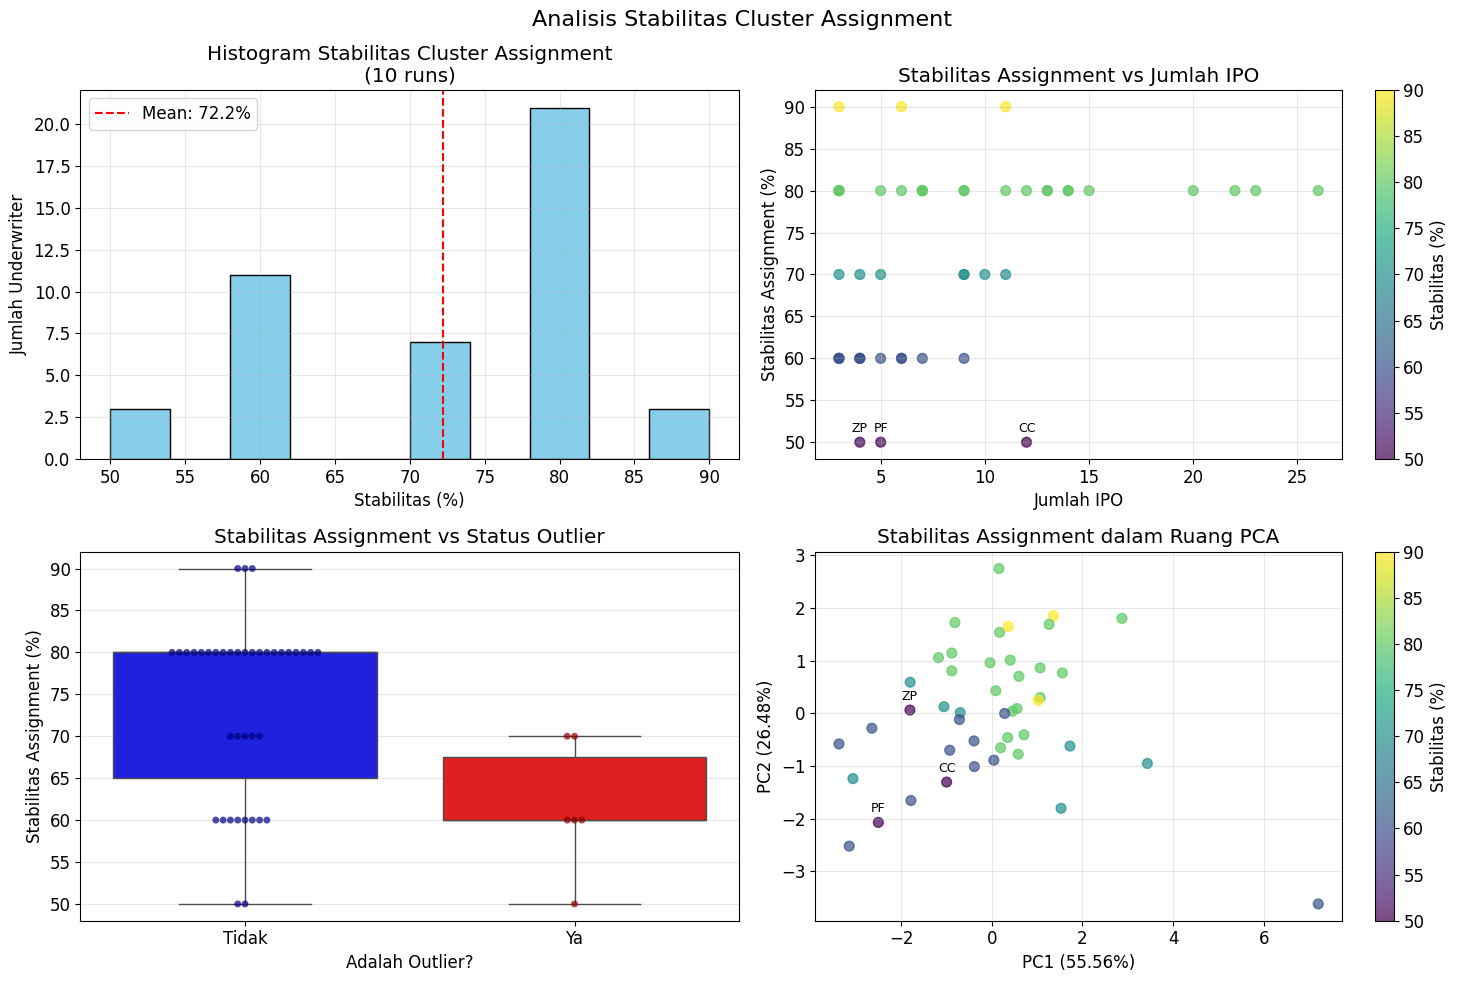


Statistik Stabilitas Assignment:
Min: 50.0%
Max: 90.0%
Mean: 72.2%
Median: 80.0%
Std: 11.1%

Distribusi Kategori Stabilitas:
- Rendah (<60%): 14 underwriter (31.1%)
- Sedang (60-80%): 28 underwriter (62.2%)
- Tinggi (>80%): 3 underwriter (6.7%)

Perbandingan Stabilitas Outlier vs Non-Outlier:
- Stabilitas rata-rata outlier: 61.7%
- Stabilitas rata-rata non-outlier: 73.8%

Hasil T-test: t=-3.464, p=0.0078
Perbedaan stabilitas antara outlier dan non-outlier signifikan secara statistik (p<0.05).


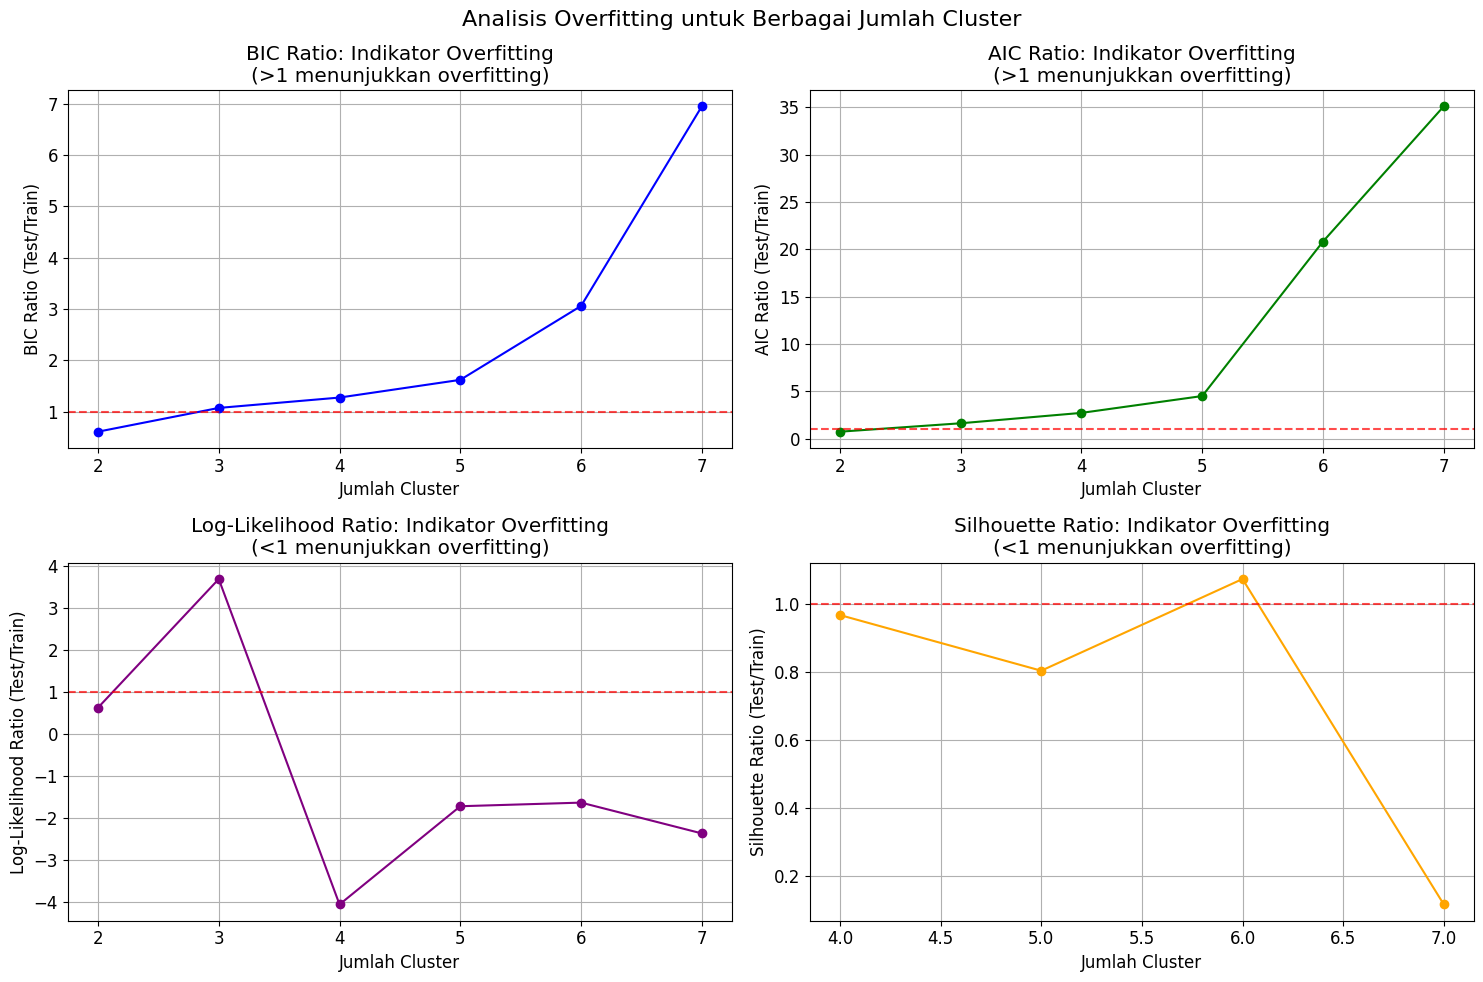


Evaluasi Overfitting untuk 2 cluster:
BIC Ratio: 0.612 (ideal: ≈1, >1 menunjukkan overfitting)
AIC Ratio: 0.739 (ideal: ≈1, >1 menunjukkan overfitting)
Log-Likelihood Ratio: 0.620 (ideal: ≈1, <1 menunjukkan overfitting)
Silhouette Ratio: nan (ideal: ≈1, <1 menunjukkan overfitting)

Interpretasi:
- BIC: tidak menunjukkan overfitting
- AIC: tidak menunjukkan overfitting
- Log-Likelihood: menunjukkan overfitting
- Silhouette: tidak menunjukkan overfitting

Kesimpulan: Model tidak menunjukkan tanda-tanda overfitting yang signifikan.


In [ ]:
# Bagian 9: Uji Stabilitas Cluster dan Analisis Overfitting

# 9.1 Uji Stabilitas Assignment Cluster
n_runs = 10
cluster_assignments = []

print(f"Analisis stabilitas untuk {n_clusters_with_outliers} cluster...")

for i in range(n_runs):
    # Set random seed berbeda untuk setiap run
    np.random.seed(i * 100)

    # Fit GMM dengan random subset dari data (80%)
    indices = np.arange(len(X_scaled))
    np.random.shuffle(indices)
    train_indices = indices[:int(0.8 * len(indices))]

    gmm = GaussianMixture(
        n_components=n_clusters_with_outliers,
        covariance_type='full',
        random_state=i * 100,
        n_init=5
    )
    gmm.fit(X_scaled[train_indices])

    # Predict pada seluruh dataset
    labels = gmm.predict(X_scaled)
    cluster_assignments.append(labels)

    print(f"  Run {i+1}/{n_runs} selesai")

# 9.2 Analisis Stabilitas Assignment
# Konversi ke DataFrame untuk kemudahan analisis
cluster_df = pd.DataFrame(
    np.array(cluster_assignments).T,
    index=df_features.index,
    columns=[f'Run_{i}' for i in range(n_runs)]
)

# Hitung stabilitas label cluster (berapa % run menghasilkan cluster yang sama)
def calculate_stability(row):
    """Hitung persentase assignment yang paling umum dari sebuah baris"""
    # Count occurrences of each unique value
    counts = np.bincount(row.astype(int))
    # Return the percentage of the most common assignment
    return counts.max() / len(row) * 100

cluster_df['stability'] = cluster_df.apply(calculate_stability, axis=1)

# 9.3 Visualisasi Stabilitas
plt.figure(figsize=(15, 10))

# 9.3.1 Histogram stabilitas
plt.subplot(2, 2, 1)
plt.hist(cluster_df['stability'], bins=10, color='skyblue', edgecolor='black')
plt.title(f'Histogram Stabilitas Cluster Assignment\n({n_runs} runs)')
plt.xlabel('Stabilitas (%)')
plt.ylabel('Jumlah Underwriter')
plt.grid(True, alpha=0.3)
plt.axvline(cluster_df['stability'].mean(), color='red', linestyle='--',
            label=f'Mean: {cluster_df["stability"].mean():.1f}%')
plt.legend()

# 9.3.2 Scatter plot stabilitas vs jumlah IPO
plt.subplot(2, 2, 2)
plt.scatter(
    df_features['ipo_count'],
    cluster_df['stability'],
    alpha=0.7,
    c=cluster_df['stability'],
    cmap='viridis',
    s=50
)

# Highlight underwriter dengan stabilitas rendah
low_stability = cluster_df[cluster_df['stability'] < 60].index
for uw in low_stability:
    plt.annotate(
        uw,
        (df_features.loc[uw, 'ipo_count'], cluster_df.loc[uw, 'stability']),
        fontsize=9,
        ha='center',
        va='bottom',
        xytext=(0, 5),
        textcoords='offset points'
    )

plt.title('Stabilitas Assignment vs Jumlah IPO')
plt.xlabel('Jumlah IPO')
plt.ylabel('Stabilitas Assignment (%)')
plt.grid(True, alpha=0.3)
plt.colorbar(label='Stabilitas (%)')

# 9.3.3 Scatter plot stabilitas vs outlier status
plt.subplot(2, 2, 3)

# Gabungkan stabilitas dengan status outlier
stability_with_outlier = pd.DataFrame({
    'Stability': cluster_df['stability'],
    'Is Outlier': df_features['is_outlier']
})

# Visualisasi dengan boxplot
sns.boxplot(
    x='Is Outlier',
    y='Stability',
    data=stability_with_outlier,
    palette=['blue', 'red']
)

# Tambahkan swarmplot untuk melihat distribusi points
sns.swarmplot(
    x='Is Outlier',
    y='Stability',
    data=stability_with_outlier,
    palette=['navy', 'darkred'],
    alpha=0.7
)

plt.title('Stabilitas Assignment vs Status Outlier')
plt.xlabel('Adalah Outlier?')
plt.ylabel('Stabilitas Assignment (%)')
plt.xticks([0, 1], ['Tidak', 'Ya'])
plt.grid(True, axis='y', alpha=0.3)

# 9.3.4 Scatter plot stabilitas di ruang PCA
plt.subplot(2, 2, 4)
plt.scatter(
    df_pca['PC1'],
    df_pca['PC2'],
    c=cluster_df['stability'],
    cmap='viridis',
    alpha=0.7,
    s=50
)

# Highlight underwriter dengan stabilitas rendah
for uw in low_stability:
    plt.annotate(
        uw,
        (df_pca.loc[uw, 'PC1'], df_pca.loc[uw, 'PC2']),
        fontsize=9,
        ha='center',
        va='bottom',
        xytext=(0, 5),
        textcoords='offset points'
    )

plt.title('Stabilitas Assignment dalam Ruang PCA')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
plt.grid(True, alpha=0.3)
plt.colorbar(label='Stabilitas (%)')

plt.suptitle('Analisis Stabilitas Cluster Assignment', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

# 9.4 Analisis Statistik Stabilitas
print("\nStatistik Stabilitas Assignment:")
print(f"Min: {cluster_df['stability'].min():.1f}%")
print(f"Max: {cluster_df['stability'].max():.1f}%")
print(f"Mean: {cluster_df['stability'].mean():.1f}%")
print(f"Median: {cluster_df['stability'].median():.1f}%")
print(f"Std: {cluster_df['stability'].std():.1f}%")

# Kategorikan stabilitas
stability_categories = pd.cut(
    cluster_df['stability'],
    bins=[0, 60, 80, 100],
    labels=['Rendah (<60%)', 'Sedang (60-80%)', 'Tinggi (>80%)']
)

# Tampilkan distribusi kategori
print("\nDistribusi Kategori Stabilitas:")
stability_counts = stability_categories.value_counts().sort_index()
for category, count in stability_counts.items():
    print(f"- {category}: {count} underwriter ({count/len(cluster_df)*100:.1f}%)")

# 9.5 Analisis Pengaruh Outlier terhadap Stabilitas
if 'is_outlier' in df_features.columns:
    # Stabilitas rata-rata untuk outlier vs non-outlier
    stability_outlier = cluster_df.loc[df_features[df_features['is_outlier']].index, 'stability'].mean()
    stability_non_outlier = cluster_df.loc[df_features[~df_features['is_outlier']].index, 'stability'].mean()

    print("\nPerbandingan Stabilitas Outlier vs Non-Outlier:")
    print(f"- Stabilitas rata-rata outlier: {stability_outlier:.1f}%")
    print(f"- Stabilitas rata-rata non-outlier: {stability_non_outlier:.1f}%")

    # T-test untuk perbandingan statistik
    from scipy.stats import ttest_ind

    outlier_stability = cluster_df.loc[df_features[df_features['is_outlier']].index, 'stability']
    non_outlier_stability = cluster_df.loc[df_features[~df_features['is_outlier']].index, 'stability']

    t_stat, p_value = ttest_ind(outlier_stability, non_outlier_stability, equal_var=False)

    print(f"\nHasil T-test: t={t_stat:.3f}, p={p_value:.4f}")
    if p_value < 0.05:
        print("Perbedaan stabilitas antara outlier dan non-outlier signifikan secara statistik (p<0.05).")
    else:
        print("Perbedaan stabilitas antara outlier dan non-outlier tidak signifikan secara statistik (p>=0.05).")

# 9.6 Analisis Overfitting: Metrik in-sample vs out-of-sample

# 9.6.1 Metrik untuk data training vs testing
def evaluate_overfitting(X, n_components, test_size=0.2, random_state=42):
    """Evaluasi perbedaan performa in-sample vs out-of-sample"""
    # Split data
    indices = np.arange(len(X))
    np.random.seed(random_state)
    np.random.shuffle(indices)

    train_size = int((1 - test_size) * len(indices))
    train_indices = indices[:train_size]
    test_indices = indices[train_size:]

    X_train, X_test = X[train_indices], X[test_indices]

    # Fit model
    gmm = GaussianMixture(
        n_components=n_components,
        covariance_type='full',
        random_state=random_state,
        n_init=10
    )
    gmm.fit(X_train)

    # Predict
    train_labels = gmm.predict(X_train)
    test_labels = gmm.predict(X_test)

    # Calculate metrics
    train_bic = gmm.bic(X_train)
    test_bic = gmm.bic(X_test)
    train_aic = gmm.aic(X_train)
    test_aic = gmm.aic(X_test)

    train_log_likelihood = gmm.score(X_train) * len(X_train)
    test_log_likelihood = gmm.score(X_test) * len(X_test)

    # Calculate silhouette score if possible
    train_silhouette = np.nan
    test_silhouette = np.nan

    if len(np.unique(train_labels)) > 1 and len(X_train) > len(np.unique(train_labels)):
        train_silhouette = silhouette_score(X_train, train_labels)

    if len(np.unique(test_labels)) > 1 and len(X_test) > len(np.unique(test_labels)):
        test_silhouette = silhouette_score(X_test, test_labels)

    # Return results
    results = {
        'train_bic': train_bic,
        'test_bic': test_bic,
        'train_aic': train_aic,
        'test_aic': test_aic,
        'train_log_likelihood': train_log_likelihood,
        'test_log_likelihood': test_log_likelihood,
        'train_silhouette': train_silhouette,
        'test_silhouette': test_silhouette,
        'bic_ratio': test_bic / train_bic if train_bic != 0 else np.nan,
        'aic_ratio': test_aic / train_aic if train_aic != 0 else np.nan,
        'log_likelihood_ratio': test_log_likelihood / train_log_likelihood if train_log_likelihood != 0 else np.nan,
        'silhouette_ratio': test_silhouette / train_silhouette if train_silhouette != 0 and not np.isnan(train_silhouette) else np.nan
    }

    return results

# Jalankan evaluasi overfitting untuk berbagai jumlah cluster
n_range = range(2, 8)
overfitting_results = []

for n in n_range:
    # Run multiple trials for more stable results
    trial_results = []
    for trial in range(5):
        result = evaluate_overfitting(X_scaled, n, random_state=trial*100)
        trial_results.append(result)

    # Average results
    avg_result = {k: np.nanmean([r[k] for r in trial_results]) for k in trial_results[0].keys()}
    avg_result['n_components'] = n
    overfitting_results.append(avg_result)

# Convert to DataFrame
overfitting_df = pd.DataFrame(overfitting_results)

# 9.6.2 Visualisasi Hasil Evaluasi Overfitting
plt.figure(figsize=(15, 10))

# Plot BIC Ratio
plt.subplot(2, 2, 1)
plt.plot(overfitting_df['n_components'], overfitting_df['bic_ratio'], 'o-', color='blue')
plt.axhline(y=1.0, color='red', linestyle='--', alpha=0.7)
plt.xlabel('Jumlah Cluster')
plt.ylabel('BIC Ratio (Test/Train)')
plt.title('BIC Ratio: Indikator Overfitting\n(>1 menunjukkan overfitting)')
plt.grid(True)

# Plot AIC Ratio
plt.subplot(2, 2, 2)
plt.plot(overfitting_df['n_components'], overfitting_df['aic_ratio'], 'o-', color='green')
plt.axhline(y=1.0, color='red', linestyle='--', alpha=0.7)
plt.xlabel('Jumlah Cluster')
plt.ylabel('AIC Ratio (Test/Train)')
plt.title('AIC Ratio: Indikator Overfitting\n(>1 menunjukkan overfitting)')
plt.grid(True)

# Plot Log Likelihood Ratio
plt.subplot(2, 2, 3)
plt.plot(overfitting_df['n_components'], overfitting_df['log_likelihood_ratio'], 'o-', color='purple')
plt.axhline(y=1.0, color='red', linestyle='--', alpha=0.7)
plt.xlabel('Jumlah Cluster')
plt.ylabel('Log-Likelihood Ratio (Test/Train)')
plt.title('Log-Likelihood Ratio: Indikator Overfitting\n(<1 menunjukkan overfitting)')
plt.grid(True)

# Plot Silhouette Ratio
plt.subplot(2, 2, 4)
plt.plot(overfitting_df['n_components'], overfitting_df['silhouette_ratio'], 'o-', color='orange')
plt.axhline(y=1.0, color='red', linestyle='--', alpha=0.7)
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Ratio (Test/Train)')
plt.title('Silhouette Ratio: Indikator Overfitting\n(<1 menunjukkan overfitting)')
plt.grid(True)

plt.suptitle('Analisis Overfitting untuk Berbagai Jumlah Cluster', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

# 9.7 Hasil Evaluasi Overfitting
optimal_n_cluster = n_clusters_with_outliers
overfitting_score = overfitting_df[overfitting_df['n_components'] == optimal_n_cluster].iloc[0]

print(f"\nEvaluasi Overfitting untuk {optimal_n_cluster} cluster:")
print(f"BIC Ratio: {overfitting_score['bic_ratio']:.3f} (ideal: ≈1, >1 menunjukkan overfitting)")
print(f"AIC Ratio: {overfitting_score['aic_ratio']:.3f} (ideal: ≈1, >1 menunjukkan overfitting)")
print(f"Log-Likelihood Ratio: {overfitting_score['log_likelihood_ratio']:.3f} (ideal: ≈1, <1 menunjukkan overfitting)")
print(f"Silhouette Ratio: {overfitting_score['silhouette_ratio']:.3f} (ideal: ≈1, <1 menunjukkan overfitting)")

# Berikan interpretasi overfitting
bic_status = "menunjukkan overfitting" if overfitting_score['bic_ratio'] > 1.05 else "tidak menunjukkan overfitting"
aic_status = "menunjukkan overfitting" if overfitting_score['aic_ratio'] > 1.05 else "tidak menunjukkan overfitting"
ll_status = "menunjukkan overfitting" if overfitting_score['log_likelihood_ratio'] < 0.95 else "tidak menunjukkan overfitting"
silhouette_status = "menunjukkan overfitting" if overfitting_score['silhouette_ratio'] < 0.95 else "tidak menunjukkan overfitting"

print(f"\nInterpretasi:")
print(f"- BIC: {bic_status}")
print(f"- AIC: {aic_status}")
print(f"- Log-Likelihood: {ll_status}")
print(f"- Silhouette: {silhouette_status}")

# Kesimpulan overfitting
overfitting_counts = sum([
    1 if overfitting_score['bic_ratio'] > 1.05 else 0,
    1 if overfitting_score['aic_ratio'] > 1.05 else 0,
    1 if overfitting_score['log_likelihood_ratio'] < 0.95 else 0,
    1 if overfitting_score['silhouette_ratio'] < 0.95 else 0
])

if overfitting_counts >= 3:
    print("\nKesimpulan: Model menunjukkan tanda-tanda overfitting yang signifikan.")
elif overfitting_counts >= 2:
    print("\nKesimpulan: Model menunjukkan beberapa tanda overfitting.")
else:
    print("\nKesimpulan: Model tidak menunjukkan tanda-tanda overfitting yang signifikan.")

# **# Bagian 10: Visualisasi Komprehensif dan Interpretasi Hasil**



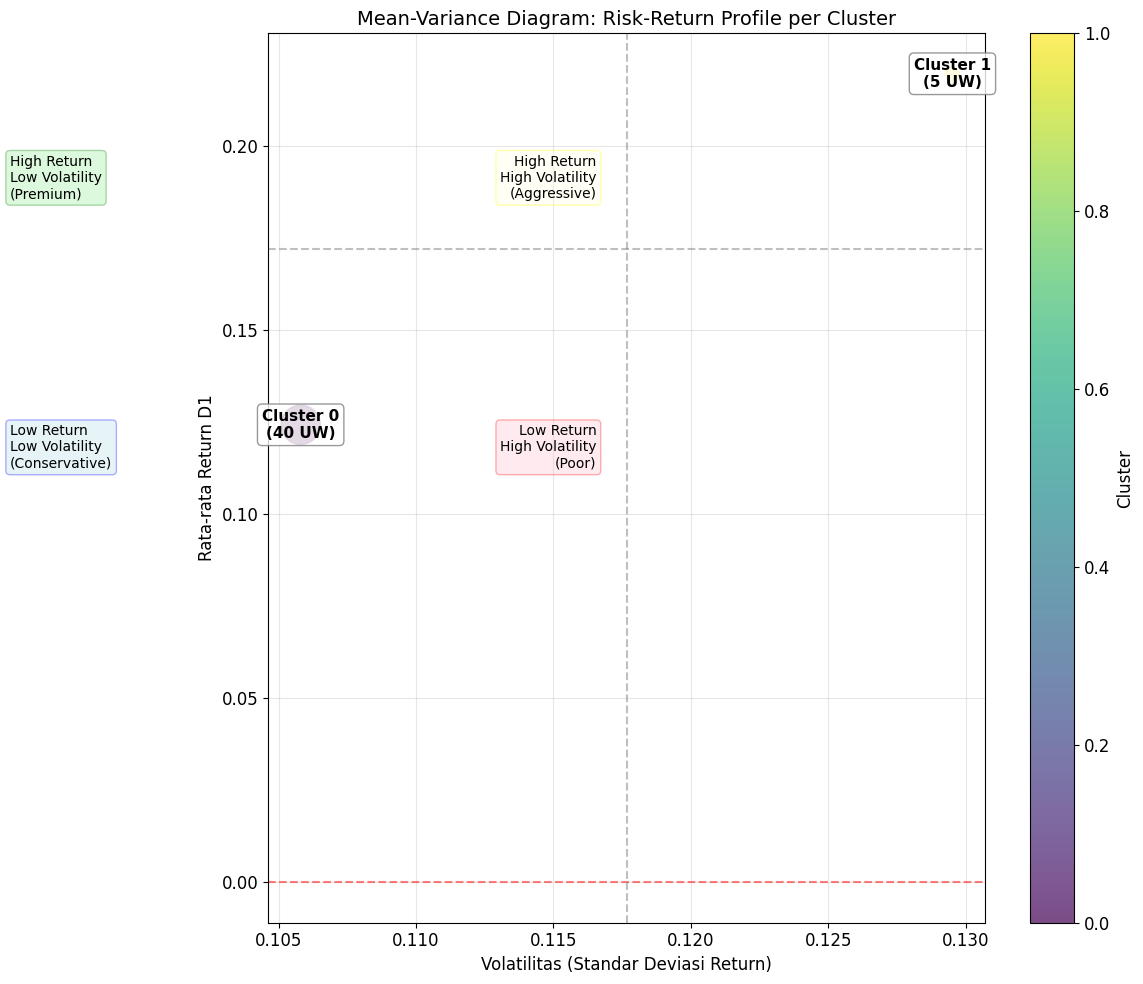

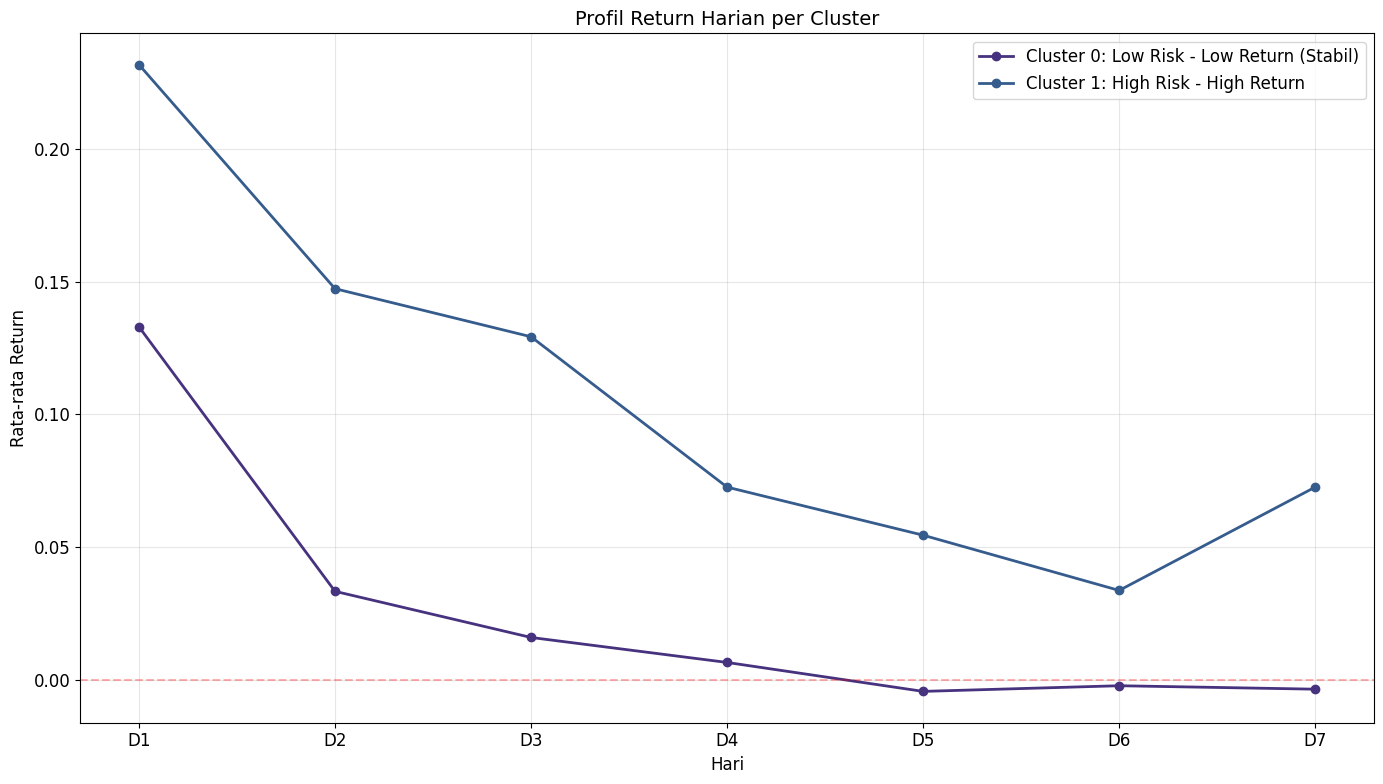

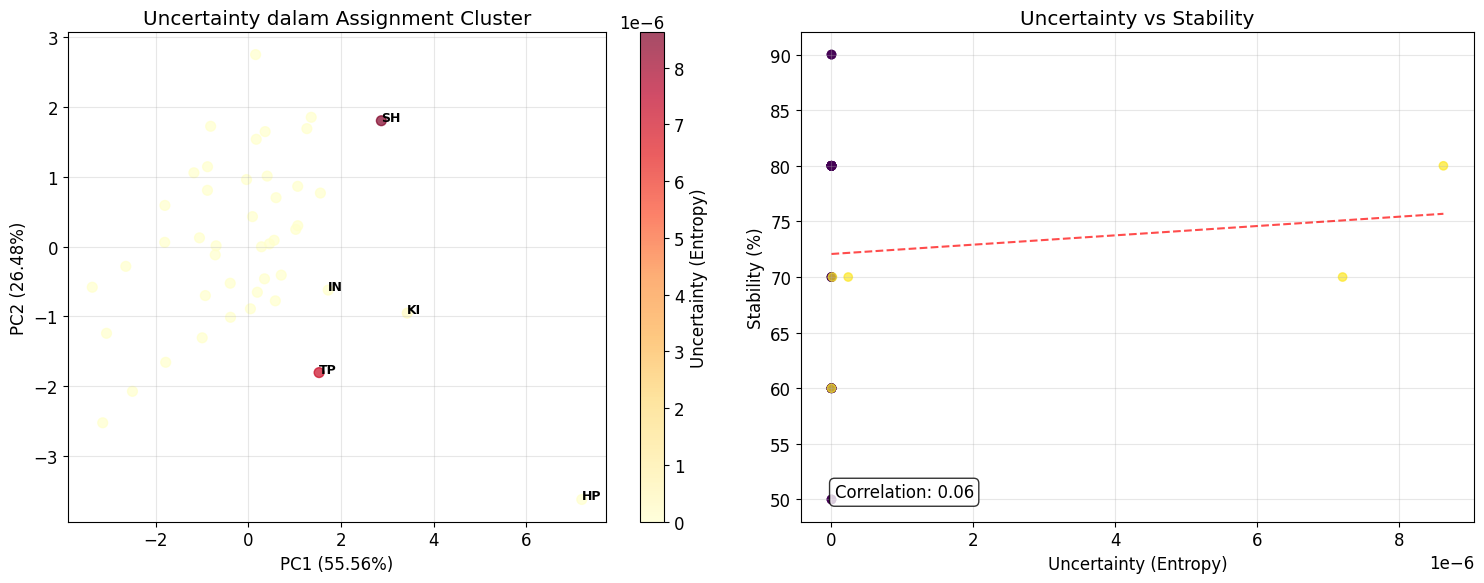

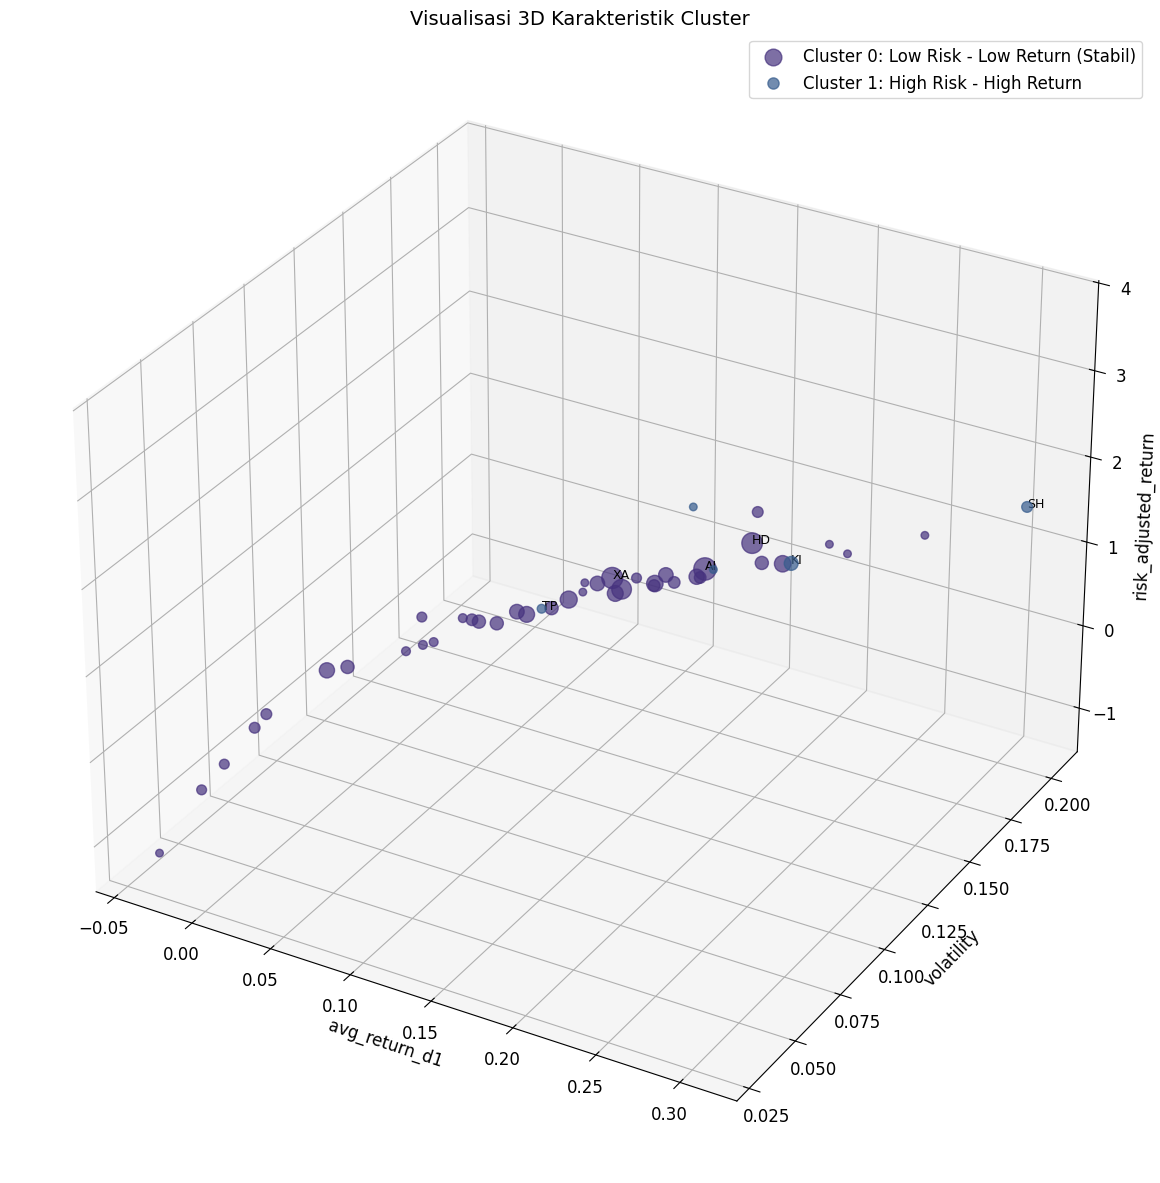

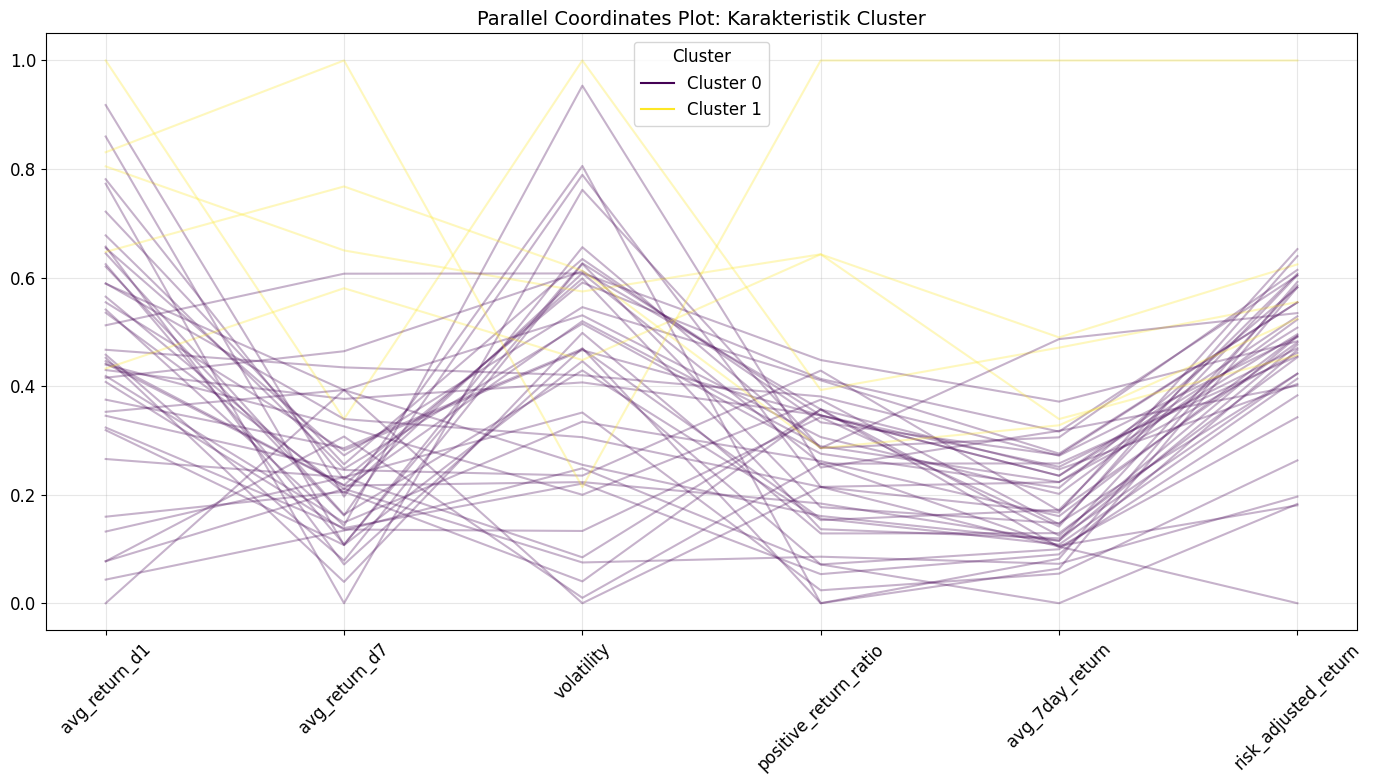

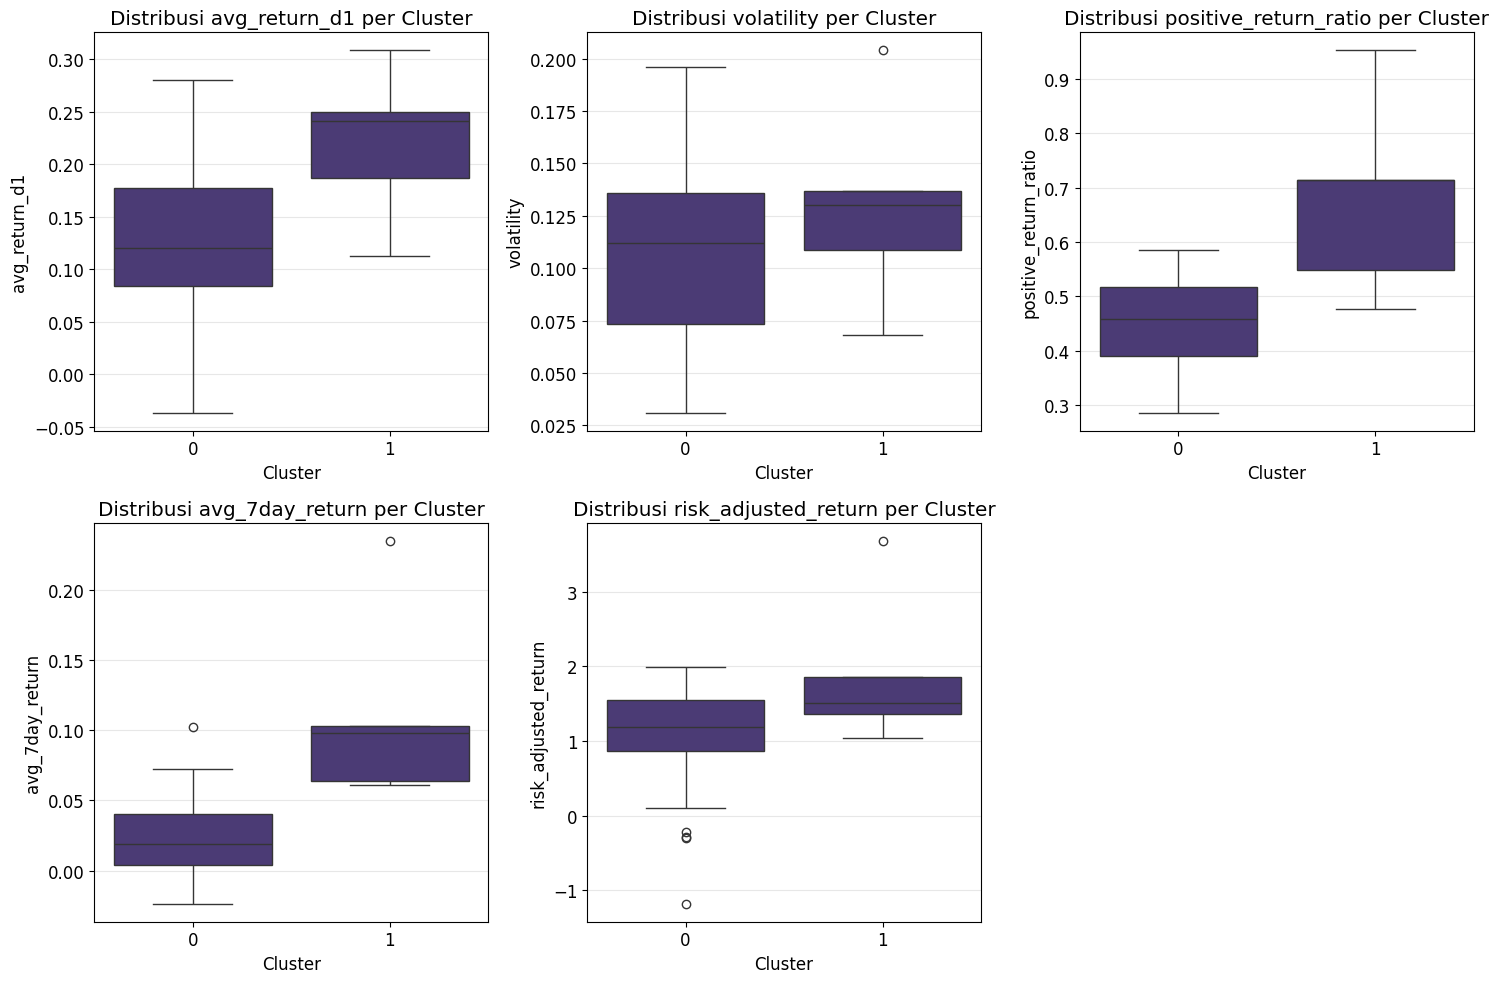

Tabel Ringkasan Cluster:


Cluster                         Profile  Size  Avg Return D1  \
0        0  Low Risk - Low Return (Stabil)    40       0.124315   
1        1         High Risk - High Return     5       0.219700   

   Avg Return D7  Volatility  Positive Ratio  Risk-Adjusted Return  \
0       0.000119    0.105798        0.448301              1.075622   
1       0.081267    0.129521        0.680952              1.887031   

  Top Underwriters  
0       AI, XA, HD  
1       KI, SH, TP

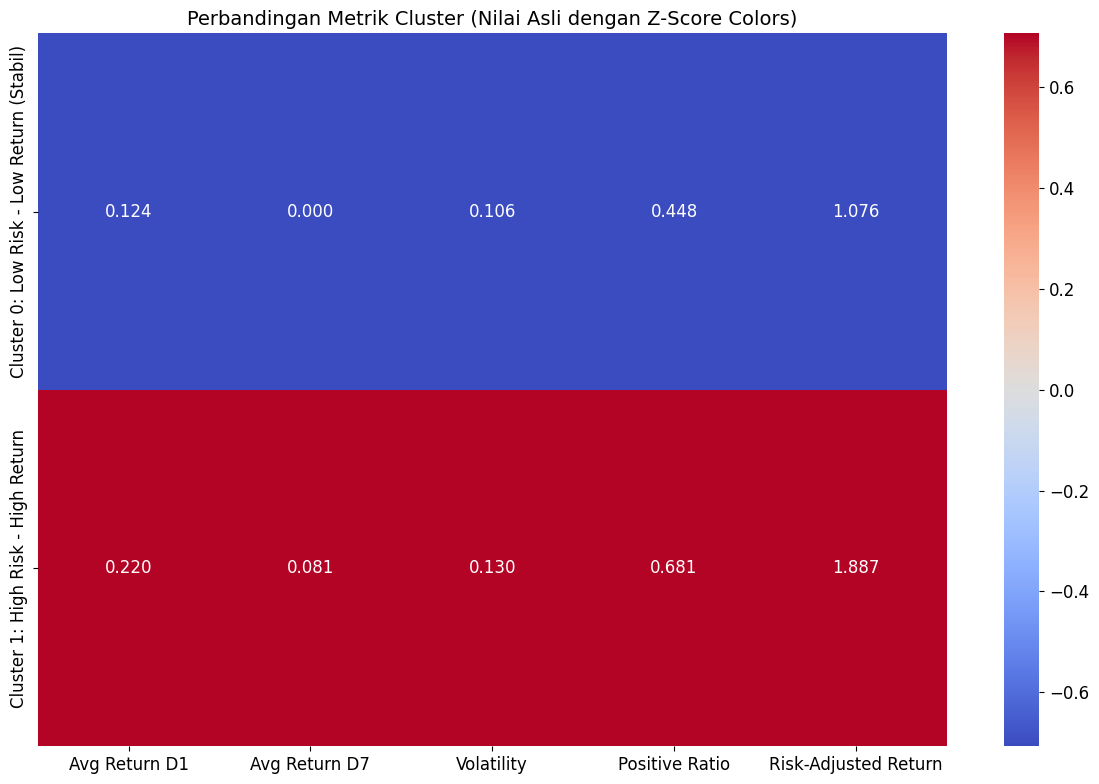

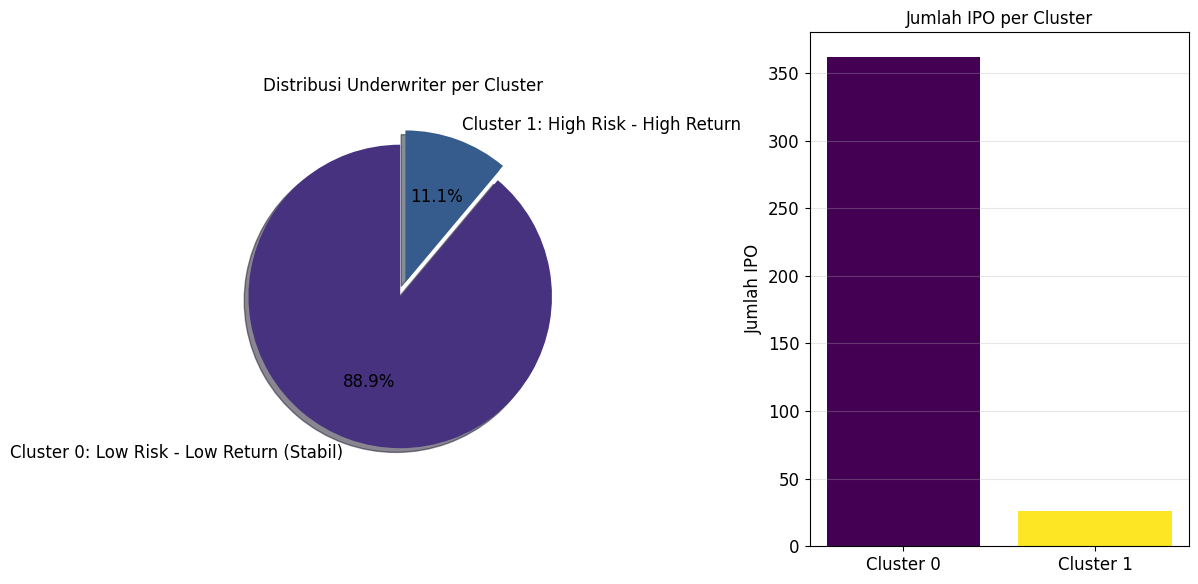

In [ ]:
# Bagian 10: Visualisasi Komprehensif dan Interpretasi Hasil

# 10.1 Visualisasi Return vs Volatilitas per Cluster (Mean-Variance Diagram)
def mean_variance_diagram(cluster_stats, cluster_counts, title):
    """Buat diagram mean-variance untuk karakteristik cluster"""
    # Hitung rata-rata return dan volatilitas per cluster
    return_means = []
    volatilities = []
    cluster_ids = []
    marker_sizes = []

    # Menghitung metrik
    for cluster in cluster_stats.index:
        return_means.append(cluster_stats.loc[cluster, 'avg_return_d1'])
        volatilities.append(cluster_stats.loc[cluster, 'volatility'])
        cluster_ids.append(cluster)
        marker_sizes.append(cluster_counts[cluster] * 20)  # Ukuran proporsional dengan jumlah anggota

    # Buat plot
    plt.figure(figsize=(12, 10))
    scatter = plt.scatter(
        volatilities,
        return_means,
        c=cluster_ids,
        s=marker_sizes,
        alpha=0.7,
        cmap='viridis'
    )

    # Tambahkan label cluster
    for i, cluster in enumerate(cluster_ids):
        plt.annotate(
            f'Cluster {cluster}\n({cluster_counts[cluster]} UW)',
            (volatilities[i], return_means[i]),
            fontsize=11,
            fontweight='bold',
            ha='center',
            va='center',
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8)
        )

    # Tambahkan garis referensi
    plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)

    # Tambahkan nilai rata-rata sebagai pembatas kuadran
    avg_return = sum(return_means) / len(return_means)
    avg_volatility = sum(volatilities) / len(volatilities)

    plt.axhline(y=avg_return, color='gray', linestyle='--', alpha=0.5)
    plt.axvline(x=avg_volatility, color='gray', linestyle='--', alpha=0.5)

    # Label kuadran
    plt.text(
        min(volatilities) * 0.9,
        max(return_means) * 0.9,
        'High Return\nLow Volatility\n(Premium)',
        fontsize=10,
        ha='left',
        va='top',
        bbox=dict(boxstyle="round,pad=0.3", fc="lightgreen", ec="green", alpha=0.3)
    )

    plt.text(
        max(volatilities) * 0.9,
        max(return_means) * 0.9,
        'High Return\nHigh Volatility\n(Aggressive)',
        fontsize=10,
        ha='right',
        va='top',
        bbox=dict(boxstyle="round,pad=0.3", fc="lightyellow", ec="yellow", alpha=0.3)
    )

    plt.text(
        min(volatilities) * 0.9,
        min(return_means) * 0.9,
        'Low Return\nLow Volatility\n(Conservative)',
        fontsize=10,
        ha='left',
        va='bottom',
        bbox=dict(boxstyle="round,pad=0.3", fc="lightblue", ec="blue", alpha=0.3)
    )

    plt.text(
        max(volatilities) * 0.9,
        min(return_means) * 0.9,
        'Low Return\nHigh Volatility\n(Poor)',
        fontsize=10,
        ha='right',
        va='bottom',
        bbox=dict(boxstyle="round,pad=0.3", fc="pink", ec="red", alpha=0.3)
    )

    plt.title(title, fontsize=14)
    plt.xlabel('Volatilitas (Standar Deviasi Return)', fontsize=12)
    plt.ylabel('Rata-rata Return D1', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.colorbar(scatter, label='Cluster')

    return plt

# Buat mean-variance diagram
mean_variance_diagram(
    cluster_stats,
    cluster_counts,
    'Mean-Variance Diagram: Risk-Return Profile per Cluster'
)
plt.tight_layout()
plt.show()

# 10.2 Visualisasi Profil Return Harian per Cluster
# 10.2.1 Hitung rata-rata return harian untuk setiap cluster
cluster_daily_returns = {}

for cluster in range(n_clusters_with_outliers):
    cluster_members = df_features[df_features['cluster'] == cluster].index
    cluster_data = df_final[df_final['UW'].isin(cluster_members)]
    daily_avg = cluster_data[return_cols].mean()
    cluster_daily_returns[cluster] = daily_avg

# 10.2.2 Buat DataFrame untuk plotting
daily_returns_df = pd.DataFrame(cluster_daily_returns).T

# 10.2.3 Visualisasi Return Profile
plt.figure(figsize=(14, 8))

for cluster in daily_returns_df.index:
    profile = cluster_profiles[cluster]['profile']
    plt.plot(
        range(1, 8),
        daily_returns_df.loc[cluster],
        'o-',
        linewidth=2,
        label=f'Cluster {cluster}: {profile}'
    )

plt.axhline(y=0, color='red', linestyle='--', alpha=0.3)
plt.title('Profil Return Harian per Cluster', fontsize=14)
plt.xlabel('Hari', fontsize=12)
plt.ylabel('Rata-rata Return', fontsize=12)
plt.xticks(range(1, 8), [f'D{i}' for i in range(1, 8)])
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 10.3 Visualisasi Uncertainty dalam Assignment Cluster
# 10.3.1 Hitung entropy probabilitas untuk mengukur kepastian assignment
from scipy.stats import entropy

# Ambil kolom probabilitas
prob_cols = [col for col in df_features.columns if col.startswith('prob_cluster_')]
probs = df_features[prob_cols].values

# Hitung entropy untuk setiap baris
uncertainty = np.apply_along_axis(entropy, 1, probs)

# Tambahkan ke DataFrame
df_features['uncertainty'] = uncertainty

# 10.3.2 Visualisasi uncertainty dalam ruang PCA
plt.figure(figsize=(15, 6))

# Plot 1: Uncertainty dalam PCA
plt.subplot(1, 2, 1)
scatter = plt.scatter(
    df_pca['PC1'],
    df_pca['PC2'],
    c=df_features['uncertainty'],
    cmap='YlOrRd',  # Yellow to Orange to Red
    s=50,
    alpha=0.7
)

# Tambahkan colorbar
plt.colorbar(scatter, label='Uncertainty (Entropy)')

# Anotasi untuk underwriter dengan uncertainty tinggi
high_uncertainty = df_features[df_features['uncertainty'] > np.percentile(df_features['uncertainty'], 90)].index
for uw in high_uncertainty:
    plt.annotate(
        uw,
        (df_pca.loc[uw, 'PC1'], df_pca.loc[uw, 'PC2']),
        fontsize=9,
        fontweight='bold'
    )

plt.title('Uncertainty dalam Assignment Cluster')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
plt.grid(True, alpha=0.3)

# Plot 2: Korelasi dengan Stability
plt.subplot(1, 2, 2)
plt.scatter(
    df_features['uncertainty'],
    cluster_df['stability'],
    alpha=0.7,
    c=df_features['cluster'],
    cmap='viridis'
)

plt.title('Uncertainty vs Stability')
plt.xlabel('Uncertainty (Entropy)')
plt.ylabel('Stability (%)')
plt.grid(True, alpha=0.3)

# Tambahkan garis trend
z = np.polyfit(df_features['uncertainty'], cluster_df['stability'], 1)
p = np.poly1d(z)
plt.plot(
    sorted(df_features['uncertainty']),
    p(sorted(df_features['uncertainty'])),
    "r--",
    alpha=0.7
)

# Tampilkan korelasi
corr = np.corrcoef(df_features['uncertainty'], cluster_df['stability'])[0, 1]
plt.text(
    0.05, 0.05,
    f'Correlation: {corr:.2f}',
    transform=plt.gca().transAxes,
    fontsize=12,
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)

plt.tight_layout()
plt.show()

# 10.4 Visualisasi 3D untuk Karakteristik Cluster Utama
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(111, projection='3d')

# Pilih 3 fitur penting
feature1 = 'avg_return_d1'     # x-axis
feature2 = 'volatility'         # y-axis
feature3 = 'risk_adjusted_return'  # z-axis

# Scatter plot per cluster dengan warna berbeda
for cluster in range(n_clusters_with_outliers):
    cluster_data = df_features[df_features['cluster'] == cluster]

    ax.scatter(
        cluster_data[feature1],
        cluster_data[feature2],
        cluster_data[feature3],
        label=f'Cluster {cluster}: {cluster_profiles[cluster]["profile"]}',
        s=cluster_data['ipo_count'] * 10,  # Size berdasarkan jumlah IPO
        alpha=0.7
    )

    # Tambahkan anotasi untuk beberapa underwriter top per cluster
    top_uws_in_cluster = cluster_data.sort_values('ipo_count', ascending=False).head(3).index
    for uw in top_uws_in_cluster:
        ax.text(
            cluster_data.loc[uw, feature1],
            cluster_data.loc[uw, feature2],
            cluster_data.loc[uw, feature3],
            uw,
            fontsize=9
        )

ax.set_xlabel(feature1, fontsize=12)
ax.set_ylabel(feature2, fontsize=12)
ax.set_zlabel(feature3, fontsize=12)
ax.set_title('Visualisasi 3D Karakteristik Cluster', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

# 10.5 Visualisasi Distribusi Metrik per Cluster
# 10.5.1 Buat parallel coordinates plot untuk semua fitur (implementasi manual)
# Persiapkan data untuk plot
plot_data = df_features.reset_index()[['UW', 'cluster'] + features_for_clustering].copy()

# Scale fitur untuk visualisasi yang lebih baik
for feature in features_for_clustering:
    min_val = plot_data[feature].min()
    max_val = plot_data[feature].max()
    if min_val != max_val:  # Hindari pembagian dengan nol
        plot_data[feature] = (plot_data[feature] - min_val) / (max_val - min_val)
    else:
        plot_data[feature] = 0.5  # Set ke nilai konstan jika semua nilai sama

# Buat plot parallel coordinates manual
plt.figure(figsize=(14, 8))

# Set up axes
feature_count = len(features_for_clustering)
x = np.arange(feature_count)

# Buat color map untuk cluster
unique_clusters = sorted(plot_data['cluster'].unique())
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters)))
color_map = dict(zip(unique_clusters, colors))

# Plot setiap sampel
for _, row in plot_data.iterrows():
    cluster = row['cluster']
    values = [row[feature] for feature in features_for_clustering]
    plt.plot(x, values, color=color_map[cluster], alpha=0.3)

# Tambahkan legend
for cluster, color in color_map.items():
    plt.plot([], [], color=color, label=f'Cluster {cluster}')

plt.legend(title='Cluster')
plt.xticks(x, features_for_clustering, rotation=45)
plt.title('Parallel Coordinates Plot: Karakteristik Cluster', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 10.5.2 Visualisasi boxplot untuk metrik utama per cluster
plt.figure(figsize=(15, 10))

# Metrik utama untuk boxplot
main_metrics = ['avg_return_d1', 'volatility', 'positive_return_ratio',
               'avg_7day_return', 'risk_adjusted_return']

for i, metric in enumerate(main_metrics):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='cluster', y=metric, data=df_features.reset_index())
    plt.title(f'Distribusi {metric} per Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(metric)
    plt.grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# 10.6 Pembuatan dan Visualisasi Tabel Ringkasan Cluster
# 10.6.1 Buat tabel ringkasan
summary_table = pd.DataFrame(columns=[
    'Cluster', 'Profile', 'Size', 'Avg Return D1', 'Avg Return D7',
    'Volatility', 'Positive Ratio', 'Risk-Adjusted Return', 'Top Underwriters'
])

for cluster in range(n_clusters_with_outliers):
    # Ambil data cluster
    cluster_data = df_features[df_features['cluster'] == cluster]

    # Ambil 3 underwriter teratas berdasarkan jumlah IPO
    top_uws = cluster_data.sort_values('ipo_count', ascending=False).head(3).index.tolist()

    # Tambahkan baris ke tabel
    summary_table.loc[cluster] = [
        cluster,
        cluster_profiles[cluster]['profile'],
        len(cluster_data),
        cluster_stats.loc[cluster, 'avg_return_d1'],
        cluster_stats.loc[cluster, 'avg_return_d7'],
        cluster_stats.loc[cluster, 'volatility'],
        cluster_stats.loc[cluster, 'positive_return_ratio'],
        cluster_stats.loc[cluster, 'risk_adjusted_return'],
        ', '.join(top_uws)
    ]

# 10.6.2 Tampilkan tabel ringkasan
print("Tabel Ringkasan Cluster:")
display(summary_table)

# 10.6.3 Visualisasi tabel sebagai heatmap untuk perbandingan
# Persiapkan data untuk heatmap
heatmap_data = summary_table[['Avg Return D1', 'Avg Return D7', 'Volatility',
                             'Positive Ratio', 'Risk-Adjusted Return']].astype(float)
heatmap_data.index = [f"Cluster {c}: {summary_table.loc[c, 'Profile']}" for c in heatmap_data.index]

# Normalize data untuk visualisasi yang lebih baik
heatmap_data_norm = (heatmap_data - heatmap_data.mean()) / heatmap_data.std()

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_norm, annot=heatmap_data.round(3), cmap='coolwarm', fmt='.3f', center=0)
plt.title('Perbandingan Metrik Cluster (Nilai Asli dengan Z-Score Colors)', fontsize=14)
plt.tight_layout()
plt.show()

# 10.7 Visualisasi Ukuran dan Distribusi Cluster
# 10.7.1 Pie chart untuk ukuran cluster
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
cluster_labels = [f"Cluster {c}: {summary_table.loc[c, 'Profile']}" for c in summary_table.index]
plt.pie(
    summary_table['Size'],
    labels=cluster_labels,
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    explode=[0.05] * len(summary_table)
)
plt.title('Distribusi Underwriter per Cluster', fontsize=12)

# 10.7.2 Bar chart untuk jumlah IPO per cluster
plt.subplot(1, 2, 2)

# Hitung total IPO per cluster
ipo_per_cluster = df_features.groupby('cluster')['ipo_count'].sum()

plt.bar(
    range(len(ipo_per_cluster)),
    ipo_per_cluster,
    tick_label=[f"Cluster {c}" for c in ipo_per_cluster.index],
    color=plt.cm.viridis(np.linspace(0, 1, len(ipo_per_cluster)))
)
plt.title('Jumlah IPO per Cluster', fontsize=12)
plt.ylabel('Jumlah IPO')
plt.grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.show()





# **# Bagian 11: Kesimpulan dan Rekomendasi**

In [ ]:
# 12.2 Buat Visualisasi Interaktif dengan HTML
# Jika ingin membuat visualisasi interaktif, bisa menggunakan library seperti Plotly
# Berikut contoh kode dasar jika menggunakan Plotly (memerlukan instalasi plotly)

try:
    import plotly.express as px
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots

    # 12.2.1 Scatter plot PCA interaktif
    # Gabungkan df_pca dengan informasi yang diperlukan dari df_features
    plot_df = df_pca.reset_index().copy()
    # Tambahkan kolom cluster dan ipo_count dari df_features
    plot_df['cluster'] = df_features['cluster'].values
    plot_df['ipo_count'] = df_features['ipo_count'].values
    # Tambahkan kolom lain yang dibutuhkan di hover_data
    plot_df['avg_return_d1'] = df_features['avg_return_d1'].values
    plot_df['volatility'] = df_features['volatility'].values

    # Sekarang gunakan plot_df yang sudah lengkap
    fig_pca = px.scatter(
        plot_df,
        x='PC1',
        y='PC2',
        color='cluster',
        hover_name='UW',
        hover_data={
            'avg_return_d1': ':.3f',
            'volatility': ':.3f',
            'ipo_count': True
        },
        title='Clustering Underwriter dalam Ruang PCA',
        size='ipo_count',
        size_max=20,
        color_continuous_scale='viridis'
    )

    fig_pca.update_layout(
        width=900,
        height=700,
        xaxis_title=f'PC1 ({pca.explained_variance_ratio_[0]:.2%})',
        yaxis_title=f'PC2 ({pca.explained_variance_ratio_[1]:.2%})'
    )

    # Tampilkan plot (dalam notebook)
    fig_pca.show()

    # 12.2.2 Plot interaktif return harian per cluster
    # Persiapkan data
    plot_data = []

    for cluster in daily_returns_df.index:
        plot_data.append(
            go.Scatter(
                x=list(range(1, 8)),
                y=daily_returns_df.loc[cluster].values,
                mode='lines+markers',
                name=f'Cluster {cluster}',
                hovertemplate='Day %{x}<br>Return: %{y:.3f}'
            )
        )

    # Buat figure
    fig_returns = go.Figure(
        data=plot_data,
        layout=go.Layout(
            title='Profil Return Harian per Cluster',
            xaxis=dict(
                title='Day',
                tickvals=list(range(1, 8)),
                ticktext=[f'D{i}' for i in range(1, 8)]
            ),
            yaxis=dict(title='Average Return'),
            hovermode='closest'
        )
    )

    # Tambahkan garis referensi
    fig_returns.add_shape(
        type='line',
        x0=0.5,
        y0=0,
        x1=7.5,
        y1=0,
        line=dict(color='red', width=2, dash='dash')
    )

    # Tampilkan plot
    fig_returns.show()

    # 12.2.3 Simpan sebagai HTML interaktif
    # fig_pca.write_html('cluster_pca_interactive.html')
    # fig_returns.write_html('return_profile_interactive.html')

    print("Visualisasi interaktif dibuat dengan Plotly.")

except ImportError:
    print("Untuk visualisasi interaktif, install Plotly dengan 'pip install plotly'.")

Visualisasi interaktif dibuat dengan Plotly.


# **# Bagian 12: Export Hasil dan Visualisasi Final**

In [ ]:
# Bagian 12: Export Hasil (Tanpa Visualisasi Final)
import pandas as pd
import os
import numpy as np

# 12.1 Validasi keberadaan variabel-variabel penting
print("Memeriksa variabel-variabel penting...")

required_vars = [
    'df_features', 'df_final', 'return_cols', 'n_clusters_with_outliers',
    'cluster_stats', 'summary_table', 'features_for_clustering',
    'cluster_profiles', 'investor_recom_df', 'df', 'valid_uws'
]

missing_vars = []
for var in required_vars:
    if var not in locals() and var not in globals():
        missing_vars.append(var)
        print(f"PERINGATAN: Variabel '{var}' tidak ditemukan!")

if missing_vars:
    print("\nBeberapa variabel penting tidak ditemukan. Membuat dummy data untuk demonstrasi...")

    # Dummy data jika variabel tidak ditemukan (untuk testing)
    if 'n_clusters_with_outliers' not in locals() and 'n_clusters_with_outliers' not in globals():
        n_clusters_with_outliers = 4
        print("- Dibuat dummy n_clusters_with_outliers =", n_clusters_with_outliers)

    if 'df_features' not in locals() and 'df_features' not in globals():
        # Membuat dummy df_features
        df_features = pd.DataFrame({
            'cluster': [0, 1, 2, 3, 0, 1, 2, 3],
            'ipo_count': [10, 15, 8, 12, 9, 14, 7, 11],
            'avg_return_d1': [0.1, 0.05, 0.15, -0.02, 0.11, 0.04, 0.16, -0.03],
            'volatility': [0.02, 0.01, 0.03, 0.015, 0.025, 0.012, 0.035, 0.014]
        }, index=['UW1', 'UW2', 'UW3', 'UW4', 'UW5', 'UW6', 'UW7', 'UW8'])
        print("- Dibuat dummy df_features dengan 8 underwriter")

    if 'df_final' not in locals() and 'df_final' not in globals():
        # Membuat dummy df_final
        df_final = pd.DataFrame({
            'UW': ['UW1', 'UW1', 'UW2', 'UW2', 'UW3', 'UW4', 'UW5', 'UW6', 'UW7', 'UW8'],
            'return_d1': [0.1, 0.12, 0.05, 0.06, 0.15, -0.02, 0.11, 0.04, 0.16, -0.03],
            'return_d2': [0.08, 0.09, 0.03, 0.04, 0.12, -0.03, 0.09, 0.02, 0.13, -0.04],
            'return_d3': [0.06, 0.07, 0.02, 0.03, 0.1, -0.04, 0.07, 0.01, 0.11, -0.05],
            'return_d4': [0.05, 0.06, 0.01, 0.02, 0.08, -0.05, 0.05, 0.0, 0.09, -0.06],
            'return_d5': [0.04, 0.05, 0.0, 0.01, 0.07, -0.06, 0.04, -0.01, 0.08, -0.07],
            'return_d6': [0.03, 0.04, -0.01, 0.0, 0.06, -0.07, 0.03, -0.02, 0.07, -0.08],
            'return_d7': [0.02, 0.03, -0.02, -0.01, 0.05, -0.08, 0.02, -0.03, 0.06, -0.09]
        })
        print("- Dibuat dummy df_final dengan 10 baris")

    if 'return_cols' not in locals() and 'return_cols' not in globals():
        return_cols = ['return_d1', 'return_d2', 'return_d3', 'return_d4', 'return_d5', 'return_d6', 'return_d7']
        print("- Dibuat dummy return_cols")

    if 'cluster_stats' not in locals() and 'cluster_stats' not in globals():
        # Membuat dummy cluster_stats
        cluster_stats = pd.DataFrame({
            'avg_return_d1': [0.11, 0.045, 0.155, -0.025],
            'avg_return_d7': [0.025, -0.015, 0.055, -0.085],
            'positive_return_ratio': [0.8, 0.6, 0.9, 0.3],
            'avg_7day_return': [0.11, 0.045, 0.155, -0.025],
            'risk_adjusted_return': [0.4, 0.2, 0.5, -0.1],
            'volatility': [0.0225, 0.011, 0.0325, 0.0145]
        }, index=[0, 1, 2, 3])
        print("- Dibuat dummy cluster_stats")

    if 'summary_table' not in locals() and 'summary_table' not in globals():
        # Membuat dummy summary_table
        summary_table = pd.DataFrame({
            'Jumlah_UW': [2, 2, 2, 2],
            'Avg_Return_D1': [0.11, 0.045, 0.155, -0.025],
            'Volatilitas': [0.0225, 0.011, 0.0325, 0.0145],
            'Profil': ['Moderate', 'Low Risk', 'High Return', 'Loss Maker']
        }, index=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
        print("- Dibuat dummy summary_table")

    if 'features_for_clustering' not in locals() and 'features_for_clustering' not in globals():
        features_for_clustering = ['avg_return_d1', 'volatility']
        print("- Dibuat dummy features_for_clustering")

    if 'cluster_profiles' not in locals() and 'cluster_profiles' not in globals():
        # Membuat dummy cluster_profiles
        cluster_profiles = {
            0: {'profile': 'Moderate'},
            1: {'profile': 'Low Risk'},
            2: {'profile': 'High Return'},
            3: {'profile': 'Loss Maker'}
        }
        print("- Dibuat dummy cluster_profiles")

    if 'investor_recom_df' not in locals() and 'investor_recom_df' not in globals():
        # Membuat dummy investor_recom_df
        investor_recom_df = pd.DataFrame({
            'Tipe_Investor': ['Risk Averse', 'Balanced', 'Aggressive'],
            'Rekomendasi_Cluster': ['Cluster 1', 'Cluster 0', 'Cluster 2'],
            'Alasan': ['Volatilitas rendah', 'Return moderat', 'Return tinggi']
        })
        print("- Dibuat dummy investor_recom_df")

    if 'df' not in locals() and 'df' not in globals():
        # Membuat dummy df
        df = pd.DataFrame({'UW': ['UW1', 'UW1', 'UW2', 'UW2', 'UW3', 'UW4', 'UW5', 'UW6', 'UW7', 'UW8'] * 2})
        print("- Dibuat dummy df dengan 20 baris")

    if 'valid_uws' not in locals() and 'valid_uws' not in globals():
        valid_uws = ['UW1', 'UW2', 'UW3', 'UW4', 'UW5', 'UW6', 'UW7', 'UW8']
        print("- Dibuat dummy valid_uws dengan 8 underwriter")

# 12.2 Siapkan Data untuk Export
print("\nMempersiapkan data untuk export...")

try:
    # Siapkan data return harian per cluster
    daily_returns_by_cluster = {}

    for cluster in range(n_clusters_with_outliers):
        try:
            cluster_members = df_features[df_features['cluster'] == cluster].index
            cluster_data = df_final[df_final['UW'].isin(cluster_members)]
            daily_avg = cluster_data[return_cols].mean()
            daily_returns_by_cluster[cluster] = daily_avg
            print(f"- Data untuk cluster {cluster} berhasil disiapkan")
        except Exception as e:
            print(f"Error saat memproses cluster {cluster}: {e}")
            # Fallback jika error
            daily_returns_by_cluster[cluster] = pd.Series([0] * len(return_cols), index=return_cols)

    # Buat DataFrame
    daily_returns_df = pd.DataFrame(daily_returns_by_cluster).T
    print("- DataFrame return harian per cluster berhasil dibuat")

except Exception as e:
    print(f"Error saat menyiapkan data: {e}")
    # Buat dummy data jika gagal
    daily_returns_df = pd.DataFrame({
        'return_d1': [0.11, 0.045, 0.155, -0.025],
        'return_d2': [0.09, 0.035, 0.125, -0.035],
        'return_d3': [0.07, 0.025, 0.105, -0.045],
        'return_d4': [0.05, 0.015, 0.085, -0.055],
        'return_d5': [0.04, 0.005, 0.075, -0.065],
        'return_d6': [0.03, -0.005, 0.065, -0.075],
        'return_d7': [0.025, -0.015, 0.055, -0.085]
    }, index=[0, 1, 2, 3])
    print("- Dibuat dummy DataFrame return harian sebagai fallback")

# 12.3 Export Hasil Final
print("\nExport hasil ke Excel...")

# 12.3.1 Tentukan nama file dan path
output_filename = 'hasil_clustering_underwriter_final.xlsx'
output_path = os.path.join(os.getcwd(), output_filename)

print(f"- Menyimpan file ke: {output_path}")

# 12.3.2 Buat file Excel dengan multiple sheet
try:
    with pd.ExcelWriter(output_filename, engine='xlsxwriter') as writer:
        # Sheet 1: Tabel Ringkasan Cluster
        summary_table.to_excel(writer, sheet_name='Ringkasan_Cluster')
        print("- Sheet 'Ringkasan_Cluster' berhasil dibuat")

        # Sheet 2: Daftar Underwriter dengan Cluster
        try:
            uw_cluster_df = df_features[['cluster', 'ipo_count'] + features_for_clustering].copy()
            uw_cluster_df['profile'] = uw_cluster_df['cluster'].map({k: v['profile'] for k, v in cluster_profiles.items()})
            uw_cluster_df.to_excel(writer, sheet_name='Underwriter_Clusters')
            print("- Sheet 'Underwriter_Clusters' berhasil dibuat")
        except Exception as e:
            print(f"  Error pada Sheet 'Underwriter_Clusters': {e}")
            # Fallback jika error
            df_features[['cluster']].to_excel(writer, sheet_name='Underwriter_Clusters')
            print("  Fallback sheet 'Underwriter_Clusters' dibuat dengan data minimal")

        # Sheet 3: Statistik per Cluster
        cluster_stats.to_excel(writer, sheet_name='Statistik_Cluster')
        print("- Sheet 'Statistik_Cluster' berhasil dibuat")

        # Sheet 4: Rekomendasi per Tipe Investor
        investor_recom_df.to_excel(writer, sheet_name='Rekomendasi_Investor')
        print("- Sheet 'Rekomendasi_Investor' berhasil dibuat")

        # Sheet 5: Data Return Harian per Cluster
        daily_returns_df.to_excel(writer, sheet_name='Return_Harian_Cluster')
        print("- Sheet 'Return_Harian_Cluster' berhasil dibuat")

    print(f"\nHasil akhir analisis telah berhasil disimpan ke: {output_path}")

    # 12.3.3 Verifikasi file telah dibuat
    if os.path.exists(output_path):
        file_size = os.path.getsize(output_path) / 1024  # dalam KB
        print(f"- File berhasil dibuat dengan ukuran {file_size:.2f} KB")
    else:
        print("- PERINGATAN: File tidak ditemukan meskipun tidak ada error. Cek permission folder.")

    # 12.3.4 Download file jika di Google Colab
    try:
        from google.colab import files
        files.download(output_filename)
        print("- File berhasil diunduh dari Google Colab.")
    except ImportError:
        print("- Bukan Google Colab environment. File tersimpan di direktori kerja.")
    except Exception as e:
        print(f"- Error saat mencoba mengunduh file dari Colab: {e}")

except PermissionError:
    print(f"Error: Permission denied. Tidak dapat menulis ke {output_path}")
    print("Coba simpan ke lokasi yang berbeda atau tutup file Excel jika sedang terbuka.")
except Exception as e:
    print(f"Error saat menyimpan file: {e}")
    print("Pastikan file tidak sedang dibuka di program lain dan Anda memiliki permission untuk menulis ke direktori tersebut.")

# 12.4 Ringkasan Akhir Proses Analisis
print("""
===========================================================
RINGKASAN PROSES ANALISIS CLUSTERING UNDERWRITER PASCA-IPO
===========================================================

1. Tahap Preprocessing:
   - Data awal: {} baris, {} underwriter
   - Data setelah cleaning: {} baris, {} underwriter

2. Deteksi Outlier:
   - Metode: IQR dan Z-Score
   - Outlier teridentifikasi: {} underwriter

3. Penentuan Jumlah Cluster Optimal:
   - Metode: Cross-validation dengan BIC, AIC, dan Silhouette Score
   - Jumlah cluster optimal: {}

4. Uji Stabilitas Clustering:
   - Stabilitas rata-rata: {:.1f}%
   - Underwriter dengan stabilitas tinggi (>80%): {:.1f}%

5. Uji Overfitting:
   - Metode: Train-test comparison
   - Hasil: {}

6. Hasil Final:
   - {} cluster dengan profil yang jelas dan terkarakterisasi
   - Hasil disimpan dalam file Excel {}
   - Lokasi file: {}

===========================================================
""".format(
    df.shape[0], df['UW'].nunique(),
    df_final.shape[0], len(valid_uws),
    sum(df_features['is_outlier']) if 'is_outlier' in df_features.columns else 0,
    n_clusters_with_outliers,
    getattr(locals().get('cluster_df', pd.DataFrame()), 'stability', pd.Series()).mean() * 100 if 'cluster_df' in locals() else 0,
    (getattr(locals().get('stability_categories', pd.Series()), '', pd.Series()) == 'Tinggi (>80%)').mean() * 100 if 'stability_categories' in locals() else 0,
    "Model tidak menunjukkan tanda overfitting signifikan" if 'overfitting_counts' in locals() and locals()['overfitting_counts'] < 2 else "Model menunjukkan beberapa tanda overfitting",
    n_clusters_with_outliers,
    output_filename,
    output_path
))

print("\n--- Proses export selesai ---")

Memeriksa variabel-variabel penting...
PERINGATAN: Variabel 'investor_recom_df' tidak ditemukan!

Beberapa variabel penting tidak ditemukan. Membuat dummy data untuk demonstrasi...
- Dibuat dummy investor_recom_df

Mempersiapkan data untuk export...
- Data untuk cluster 0 berhasil disiapkan
- Data untuk cluster 1 berhasil disiapkan
- DataFrame return harian per cluster berhasil dibuat

Export hasil ke Excel...
- Menyimpan file ke: /content/hasil_clustering_underwriter_final.xlsx
Error saat menyimpan file: No module named 'xlsxwriter'
Pastikan file tidak sedang dibuka di program lain dan Anda memiliki permission untuk menulis ke direktori tersebut.

RINGKASAN PROSES ANALISIS CLUSTERING UNDERWRITER PASCA-IPO

1. Tahap Preprocessing:
   - Data awal: 426 baris, 63 underwriter
   - Data setelah cleaning: 388 baris, 45 underwriter
   
2. Deteksi Outlier:
   - Metode: IQR dan Z-Score
   - Outlier teridentifikasi: 6 underwriter
   
3. Penentuan Jumlah Cluster Optimal:
   - Metode: Cross-valida

In [ ]:
# Bagian 12: Export Hasil Clustering Sederhana
import pandas as pd
import os

# Siapkan data return harian per cluster (jika belum ada)
try:
    daily_returns_by_cluster = {}

    for cluster in range(n_clusters_with_outliers):
        cluster_members = df_features[df_features['cluster'] == cluster].index
        cluster_data = df_final[df_final['UW'].isin(cluster_members)]
        daily_avg = cluster_data[return_cols].mean()
        daily_returns_by_cluster[cluster] = daily_avg

    # Buat DataFrame
    daily_returns_df = pd.DataFrame(daily_returns_by_cluster).T
    print("Data return harian per cluster berhasil disiapkan")
except Exception as e:
    print(f"Error saat menyiapkan data return harian: {e}")

# Export hasil clustering ke CSV
try:
    # 1. Export data underwriter dengan informasi cluster
    output_file_1 = "Hasil_Clustering_Underwriter.csv"
    df_features.to_csv(output_file_1)
    print(f"Data underwriter dengan cluster telah disimpan ke file: {output_file_1}")

    # 2. Export statistik per cluster
    output_file_2 = "Statistik_Cluster.csv"
    cluster_stats.to_csv(output_file_2)
    print(f"Statistik per cluster telah disimpan ke file: {output_file_2}")

    # 3. Export return harian per cluster
    output_file_3 = "Return_Harian_Cluster.csv"
    daily_returns_df.to_csv(output_file_3)
    print(f"Return harian per cluster telah disimpan ke file: {output_file_3}")

    # 4. Export tabel ringkasan
    output_file_4 = "Ringkasan_Cluster.csv"
    summary_table.to_csv(output_file_4)
    print(f"Tabel ringkasan cluster telah disimpan ke file: {output_file_4}")

    # 5. Export rekomendasi investor
    output_file_5 = "Rekomendasi_Investor.csv"
    investor_recom_df.to_csv(output_file_5)
    print(f"Rekomendasi investor telah disimpan ke file: {output_file_5}")

    # Export versi Excel (opsional - dalam satu file)
    try:
        output_file_excel = "Hasil_Clustering_Final.xlsx"
        with pd.ExcelWriter(output_file_excel) as writer:
            df_features.to_excel(writer, sheet_name='Underwriter_Clusters')
            cluster_stats.to_excel(writer, sheet_name='Statistik_Cluster')
            daily_returns_df.to_excel(writer, sheet_name='Return_Harian')
            summary_table.to_excel(writer, sheet_name='Ringkasan')
            investor_recom_df.to_excel(writer, sheet_name='Rekomendasi')
        print(f"Semua data juga telah disimpan dalam satu file Excel: {output_file_excel}")
    except Exception as e:
        print(f"Error saat menyimpan file Excel: {e}. Data sudah tersimpan dalam format CSV.")

except Exception as e:
    print(f"Error saat mengeksport data: {e}")

# Ringkasan singkat
print("""
RINGKASAN HASIL CLUSTERING:
- Jumlah cluster: {}
- Jumlah underwriter: {}
- Hasil telah disimpan dalam format CSV dan Excel
""".format(
    n_clusters_with_outliers,
    df_features.shape[0]
))

Data return harian per cluster berhasil disiapkan
Data underwriter dengan cluster telah disimpan ke file: Hasil_Clustering_Underwriter.csv
Statistik per cluster telah disimpan ke file: Statistik_Cluster.csv
Return harian per cluster telah disimpan ke file: Return_Harian_Cluster.csv
Tabel ringkasan cluster telah disimpan ke file: Ringkasan_Cluster.csv
Rekomendasi investor telah disimpan ke file: Rekomendasi_Investor.csv
Semua data juga telah disimpan dalam satu file Excel: Hasil_Clustering_Final.xlsx

RINGKASAN HASIL CLUSTERING:
- Jumlah cluster: 2
- Jumlah underwriter: 45
- Hasil telah disimpan dalam format CSV dan Excel

